# Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Load data and data cleaning

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UF Gainesville/Spring 24/MAS4115/sec_pitcher_stats.csv')
df2 = pd.read_csv('/content/drive/MyDrive/UF Gainesville/Spring 24/MAS4115/sec_pitches_2023.csv')

In [ ]:
df = df.dropna()

In [ ]:
stats = df.loc[df['innings_pitched'] >= 24.0,
                       ['pitcher', 'walk_rate', 'strikeout_rate', 'k_minus_bb',
                        'era', 'fip', 'whip', 'groundball_rate', 'flyball_rate',
                        'linedrive_rate', 'siera']
                      ].groupby(['pitcher'], as_index=False).mean().rename(columns={'pitcher':'Pitcher'})

In [ ]:
# Standardize the 'Pitcher' column in df1 to 'Last Name, First Name' format
stats['Pitcher'] = stats['Pitcher'].apply(lambda x: ', '.join(reversed(x.split())))
stats

Pitcher  walk_rate  strikeout_rate  k_minus_bb   era   fip  \
0           Russell, AJ        6.7            44.8        38.1  0.89  2.15   
1      II, Davis, Alton        8.3            22.1        13.8  5.35  5.58   
2       Lindsey, Andrew        6.4            24.6        18.2  2.90  4.85   
3     Ledbetter, Austin        7.9            14.0         6.1  7.09  6.12   
4    Strickland, Austin        8.4            24.3        15.9  5.04  5.33   
..                  ...        ...             ...         ...   ...   ...   
126    Crotchfelt, Zach       13.2            23.8        10.6  5.62  5.49   
127      Franklin, Zach       10.4            32.4        22.0  7.45  5.83   
128           Lee, Zack        8.7            25.5        16.8  4.42  6.04   
129        Morris, Zack       11.0            23.8        12.8  7.64  5.31   
130    Sechrist, Zander        4.1            26.4        22.3  2.05  3.96   

     whip  groundball_rate  flyball_rate  linedrive_rate  siera  
0    0.53             46.9          42.9            10.2   0.76  
1    1.37             43.8          40.6            15.6   3.73  
2    1.11             56.0          27.5            16.6   3.05  
3    1.91             31.4          33.9            34.7   4.93  
4    1.21             52.0          32.7            15.3   3.39  
..    ...              ...           ...             ...    ...  
126  1.58             37.8          44.1            18.0   4.13  
127  1.40             46.5          39.5            14.0   2.64  
128  1.33             38.7          43.0            18.3   3.32  
129  1.73             39.8          32.7            27.6   3.78  
130  1.04             30.9          61.7             7.4   2.97  

[131 rows x 11 columns]

In [ ]:
# Define the pitch types
pitch_types = ['Fastball', 'FourSeamFastball', 'TwoSeamFastball', 'Cutter',
               'Sinker', 'Splitter', 'Changeup', 'Slider', 'Curveball']

# Create an empty dictionary to store grouped DataFrames
pitch_groupedRHP = {}

# Iterate over each pitch type
for pitch in pitch_types:
    # Filter data for the current pitch type and right-handed pitchers
    pitch_rhp = df2.loc[(df2['TaggedPitchType'] == pitch) & (df2['PitcherThrows'] == 'Right'),
                       ['Pitcher', 'TaggedPitchType', 'RelSpeed', 'InducedVertBreak',
                        'HorzBreak', 'SpinRate', 'RelHeight', 'RelSide', 'Extension',
                        'VertRelAngle', 'HorzRelAngle', 'VertApprAngle', 'HorzApprAngle']
                      ].groupby(['Pitcher', 'TaggedPitchType'], as_index=False).mean()

    # Generate the DataFrame name
    df_name = pitch + "_RHP"

    # Store the grouped DataFrame in the dictionary with the generated name
    pitch_groupedRHP[df_name] = pitch_rhp

# Access a specific grouped DataFrame (e.g., for 'Fastball_RHP')
pitch_groupedRHP['Fastball_RHP']

Pitcher TaggedPitchType   RelSpeed  InducedVertBreak  \
0          Adcock, Cody        Fastball  93.800796         17.390170   
1        Alderman, Kemp        Fastball  92.803524         18.050159   
2         Allsup, Chase        Fastball  95.815506         19.974339   
3        Anderson, Jack        Fastball  92.931845         19.349554   
4       Armstrong, John        Fastball  88.060941          0.912104   
..                  ...             ...        ...               ...   
173  Williamson, Austin        Fastball  90.996162         16.426212   
174      Wilmsmeyer, Ty        Fastball  88.752316         13.920050   
175          Wood, Gage        Fastball  93.361956         16.020373   
176         Woods, Kade        Fastball  94.101499         19.342927   
177       Zedalis, Zach        Fastball  90.970566         21.050231   

     HorzBreak     SpinRate  RelHeight   RelSide  Extension  VertRelAngle  \
0    13.614129  2396.540020   6.127887  2.035691   5.968884     -2.697043   
1    11.756807  2296.501765   5.360154  1.059582   5.983928     -0.993085   
2     8.921259  2284.959626   6.224747  2.118456   5.577499     -2.863562   
3    11.279669  2284.745455   6.078722  2.296393   6.687746     -2.553477   
4    18.029108  1880.277915   4.483569  3.221592   5.359332      1.078233   
..         ...          ...        ...       ...        ...           ...   
173   8.056755  2150.986020   5.769406  1.269431   5.961344     -1.720619   
174  13.147778  2291.557632   5.843420  1.827981   6.183654     -1.288575   
175   6.112181  2275.505957   5.634060  1.328097   6.558906     -1.795967   
176   8.461269  2268.025644   6.236723  0.954390   5.936581     -2.545856   
177   9.930410  2208.480000   5.624307  1.244780   5.641478     -1.511142   

     HorzRelAngle  VertApprAngle  HorzApprAngle  
0       -3.279291      -5.486943      -0.837658  
1       -1.952643      -3.775722       0.159016  
2       -3.052918      -5.026089      -1.464461  
3       -3.465562      -5.023156      -1.416719  
4       -4.880009      -5.540123      -1.692539  
..            ...            ...            ...  
173     -2.558694      -5.048354      -1.112440  
174     -3.446666      -5.255162      -1.078671  
175     -2.020605      -4.717886      -0.910718  
176     -1.524794      -4.944329      -0.006053  
177     -2.959427      -4.101716      -1.189389  

[178 rows x 13 columns]

In [ ]:
# Define the pitch types
pitch_types = ['Fastball', 'FourSeamFastball', 'TwoSeamFastball', 'Cutter',
               'Sinker', 'Splitter', 'Changeup', 'Slider', 'Curveball']

# Create an empty dictionary to store grouped DataFrames
pitch_groupedLHP = {}

# Iterate over each pitch type
for pitch in pitch_types:
    # Filter data for the current pitch type and right-handed pitchers
    pitch_lhp = df2.loc[(df2['TaggedPitchType'] == pitch) & (df2['PitcherThrows'] == 'Left'),
                       ['Pitcher', 'TaggedPitchType', 'RelSpeed', 'InducedVertBreak',
                        'HorzBreak', 'SpinRate', 'RelHeight', 'RelSide', 'Extension',
                        'VertRelAngle', 'HorzRelAngle', 'VertApprAngle', 'HorzApprAngle']
                      ].groupby(['Pitcher', 'TaggedPitchType'], as_index=False).mean()

    # Generate the DataFrame name
    df_name = pitch + "_LHP"

    # Store the grouped DataFrame in the dictionary with the generated name
    pitch_groupedLHP[df_name] = pitch_lhp

# Access a specific grouped DataFrame (e.g., for 'Fastball_RHP')
pitch_groupedLHP['Changeup_LHP']

Pitcher TaggedPitchType   RelSpeed  InducedVertBreak  \
0   Ackenhausen, Nathan        Changeup  85.387400          6.369881   
1         Arroyo, Chris        Changeup  81.364173          8.803513   
2      Aschenbeck, Evan        Changeup  81.955138          6.238511   
3          Ball, Connor        Changeup  80.325775         11.275317   
4        Bauman, Tanner        Changeup  80.970479          4.620818   
..                  ...             ...        ...               ...   
58        Wansing, Troy        Changeup  85.449550          6.123406   
59        Wheeler, Trey        Changeup  78.888723          9.838641   
60      Wissler, Daniel        Changeup  81.107146          7.653723   
61         Woods, Jaden        Changeup  84.303568         12.758335   
62       Yntema, Graham        Changeup  81.096715         11.222759   

    HorzBreak     SpinRate  RelHeight   RelSide  Extension  VertRelAngle  \
0  -14.558505  1418.731667   6.087562 -0.917528   5.327068     -1.681614   
1  -14.776836  1722.087273   5.470195 -1.626908   6.376849     -1.169008   
2  -17.036202  1840.737368   5.672721 -2.113623   6.120292     -1.199914   
3  -11.430357  1434.007500   4.882857 -2.950899   5.733081     -0.544528   
4  -17.043968  1731.330637   5.960724 -2.406715   6.154878     -0.587879   
..        ...          ...        ...       ...        ...           ...   
58 -15.509072  1560.141875   6.177792 -2.504649   5.081259     -1.774005   
59 -12.896054  1750.573077   5.663916 -1.279153   6.266161     -1.011735   
60 -11.603167  1369.238169   5.745366 -2.885989   5.388927     -1.051231   
61 -12.277895  2108.371613   5.830519 -2.372460   6.279753     -1.858871   
62 -15.999960  2268.397692   6.070518 -1.159907   6.788229     -2.128830   

    HorzRelAngle  VertApprAngle  HorzApprAngle  
0       1.742917      -7.703592      -0.845189  
1       1.594751      -7.269875      -1.083674  
2       2.828628      -7.699934      -0.242055  
3       4.349470      -6.634014       2.311316  
4       3.536646      -7.610204       0.465110  
..           ...            ...            ...  
58      3.612430      -7.876608       0.873579  
59      1.639426      -7.449122      -0.691957  
60      3.311367      -7.568780       1.251463  
61      3.219009      -6.809412       0.999606  
62      2.468965      -7.819058      -0.453090  

[63 rows x 13 columns]

In [ ]:
# Initialize empty dictionaries to store merged DataFrames
merged_RHP_stats = {}
merged_LHP_stats = {}

# Iterate through each key in pitch_groupedRHP
for key, df in pitch_groupedRHP.items():
    # Merge the current DataFrame with the 'stats' DataFrame on 'Pitcher'
    merged_RHP_stats[key] = df.merge(stats, on='Pitcher')

# Iterate through each key in pitch_groupedLHP
for key, df in pitch_groupedLHP.items():
    # Merge the current DataFrame with the 'stats' DataFrame on 'Pitcher'
    merged_LHP_stats[key] = df.merge(stats, on='Pitcher')

In [ ]:
merged_RHP_stats['Fastball_RHP']

Pitcher TaggedPitchType   RelSpeed  InducedVertBreak  HorzBreak  \
0       Adcock, Cody        Fastball  93.800796         17.390170  13.614129   
1      Allsup, Chase        Fastball  95.815506         19.974339   8.921259   
2    Armstrong, John        Fastball  88.060941          0.912104  18.029108   
3       Austin, Cade        Fastball  93.004158         19.182513  14.159886   
4       Banks, Hagan        Fastball  89.952891         17.973401  12.862225   
..               ...             ...        ...               ...        ...   
86      Vera, Jordan        Fastball  91.552465         16.273882  12.938226   
87  Waldrep, Hurston        Fastball  95.724390         16.284669   0.641073   
88  Williams, Darren        Fastball  89.004698         11.900797  14.028922   
89        Wood, Gage        Fastball  93.361956         16.020373   6.112181   
90       Woods, Kade        Fastball  94.101499         19.342927   8.461269   

       SpinRate  RelHeight   RelSide  Extension  VertRelAngle  ...  walk_rate  \
0   2396.540020   6.127887  2.035691   5.968884     -2.697043  ...       11.0   
1   2284.959626   6.224747  2.118456   5.577499     -2.863562  ...       13.9   
2   1880.277915   4.483569  3.221592   5.359332      1.078233  ...       11.4   
3   2339.708565   5.881790  0.642679   5.169526     -2.529701  ...        7.2   
4   2217.406312   5.922791  1.933176   5.828545     -2.072694  ...        5.2   
..          ...        ...       ...        ...           ...  ...        ...   
86  2149.516934   5.757382  1.075477   5.820724     -1.770315  ...       10.5   
87  2354.217143   6.284466  0.565064   6.110418     -2.951884  ...       12.7   
88  2393.011014   5.548770  3.213818   6.474796     -0.985224  ...        8.5   
89  2275.505957   5.634060  1.328097   6.558906     -1.795967  ...       16.4   
90  2268.025644   6.236723  0.954390   5.936581     -2.545856  ...       12.2   

    strikeout_rate  k_minus_bb   era   fip  whip  groundball_rate  \
0             20.3         9.3  5.54  6.76  1.38             33.3   
1             20.7         6.8  5.47  6.15  1.74             32.9   
2             19.4         8.0  5.40  6.42  1.58             45.8   
3             30.4        23.2  4.55  3.85  1.25             46.8   
4             27.6        22.4  3.48  5.60  0.86             34.5   
..             ...         ...   ...   ...   ...              ...   
86            15.4         4.9  8.59  6.54  1.77             42.9   
87            34.7        22.0  4.16  4.61  1.40             51.2   
88            21.7        13.2  4.26  5.40  1.26             48.6   
89            30.0        13.6  4.80  4.83  1.47             39.4   
90            30.9        18.7  5.52  6.95  1.30             41.8   

    flyball_rate  linedrive_rate  siera  
0           38.1            28.6   4.35  
1           43.2            24.0   4.71  
2           29.9            24.3   4.37  
3           40.3            13.0   2.50  
4           53.6            11.9   2.71  
..           ...             ...    ...  
86          35.7            21.4   4.93  
87          30.9            18.0   2.66  
88          41.9             9.5   3.81  
89          36.4            24.2   3.61  
90          46.3            11.9   3.01  

[91 rows x 23 columns]

# Feature Selection

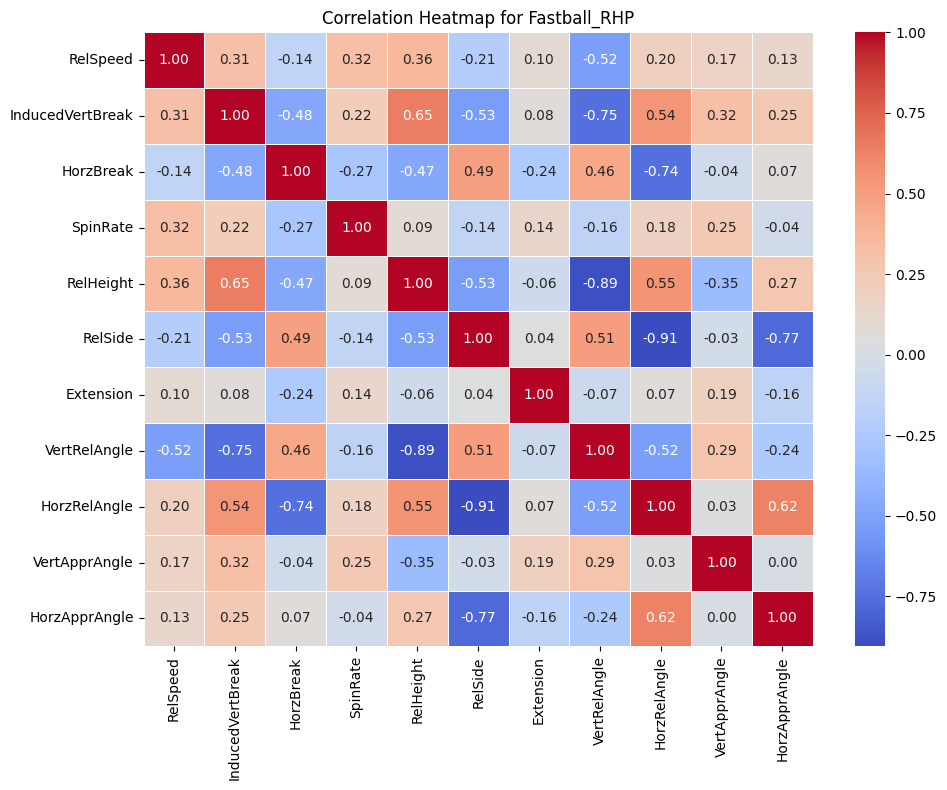

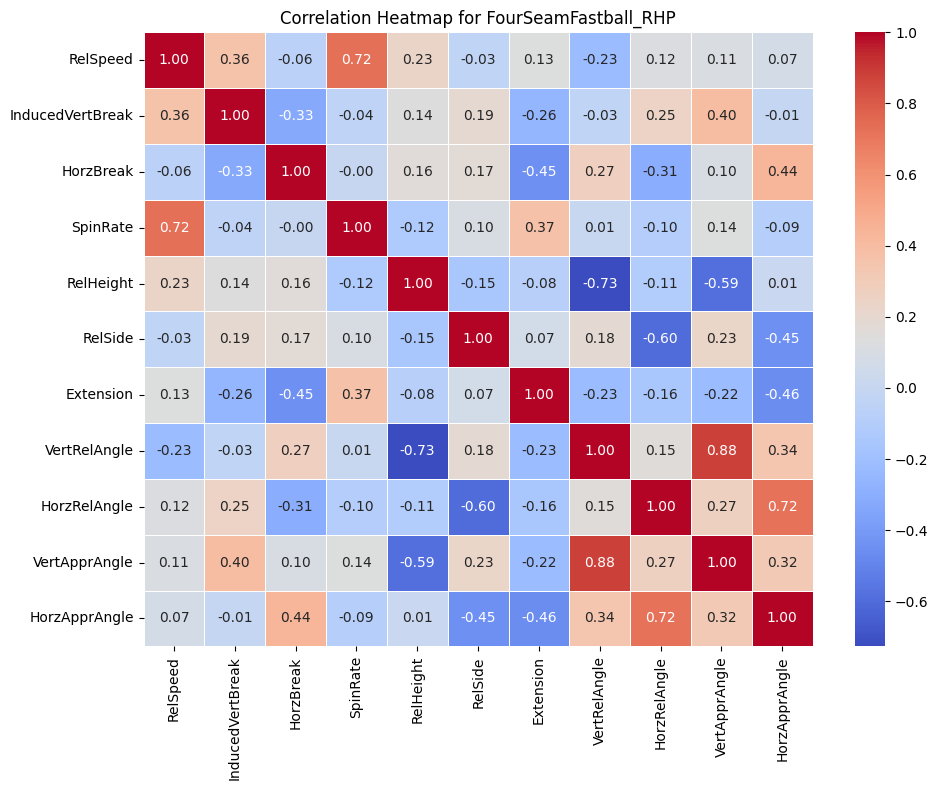

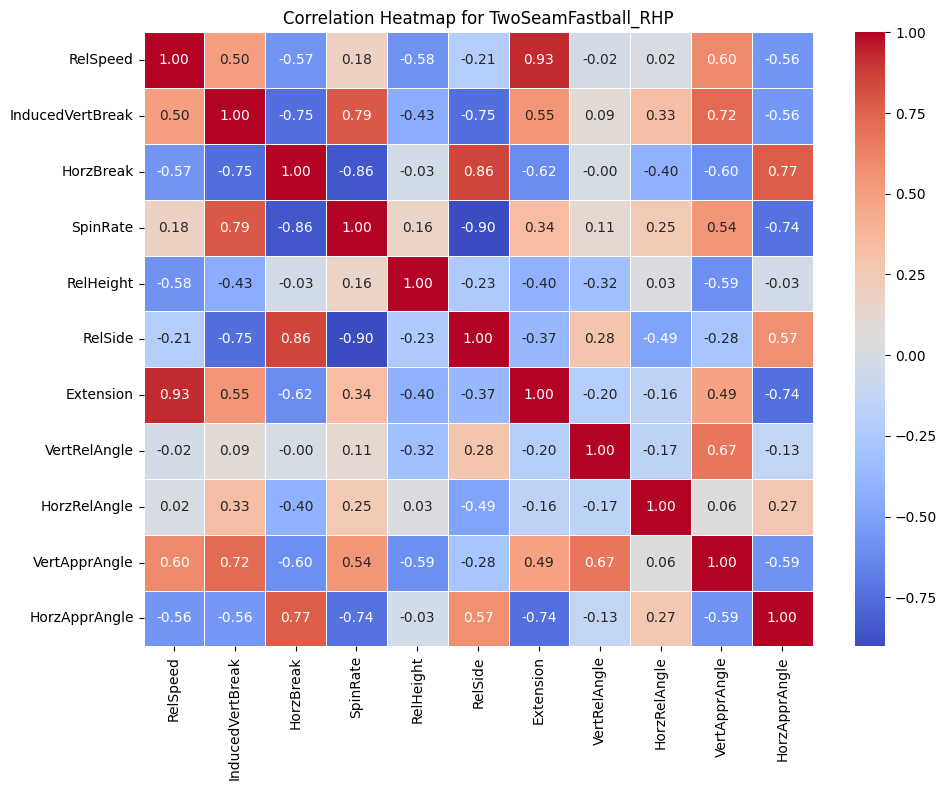

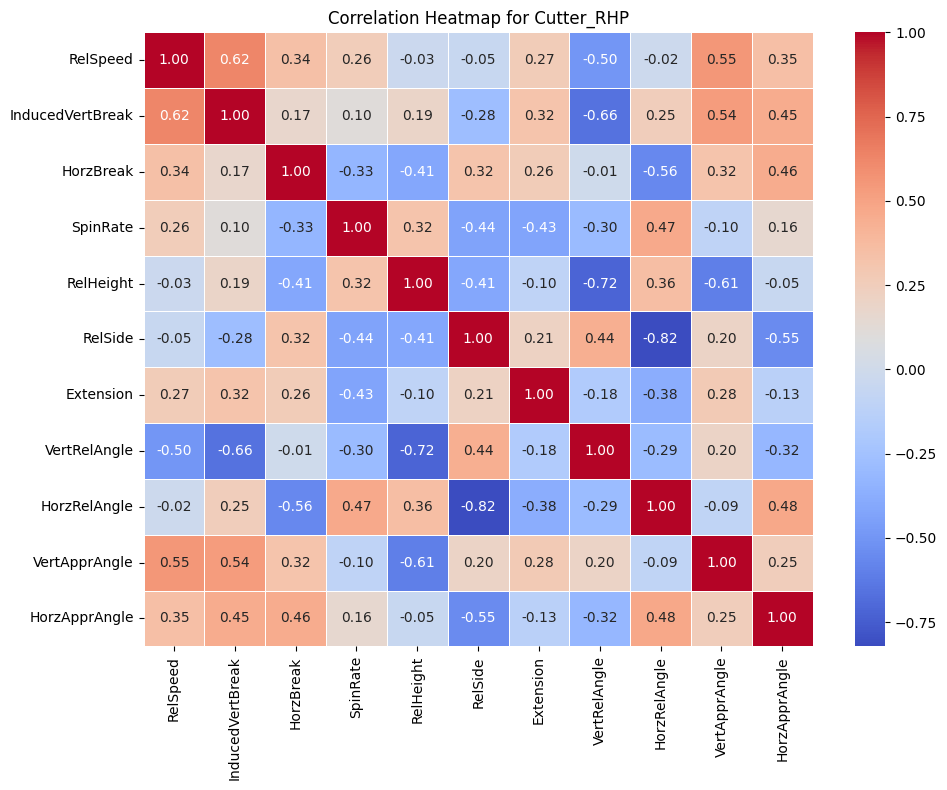

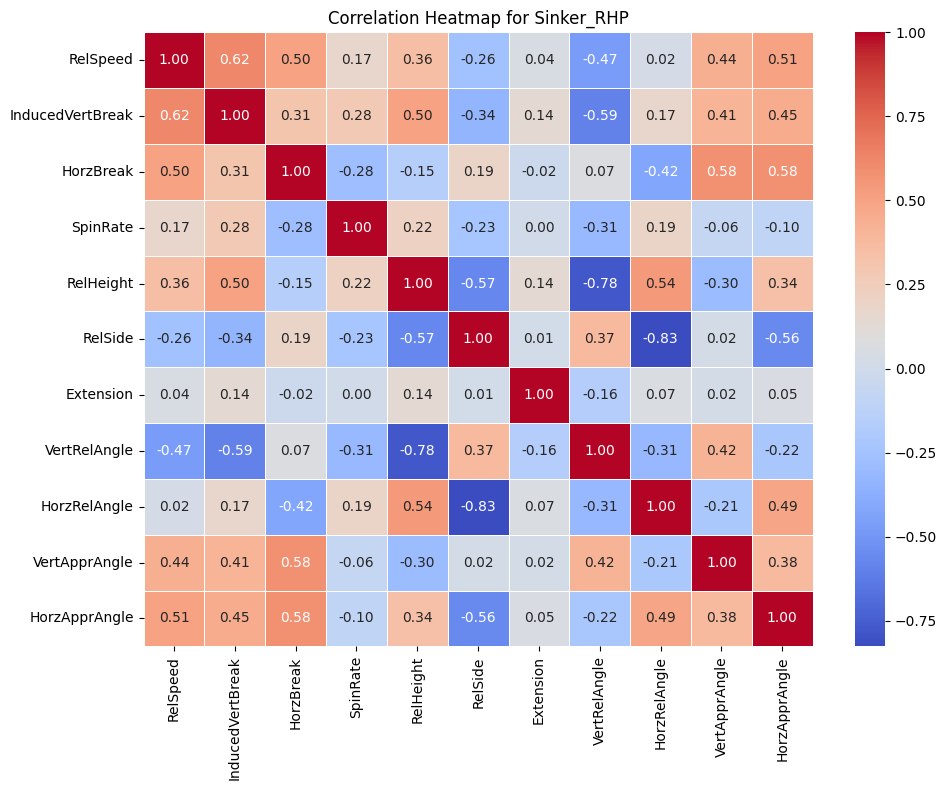

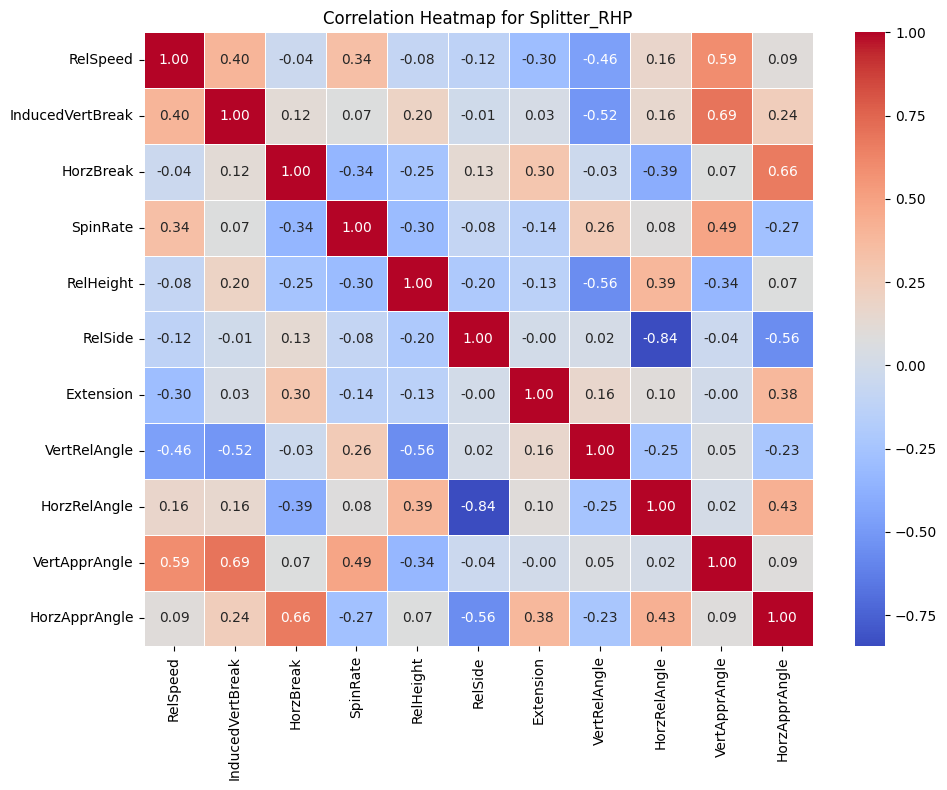

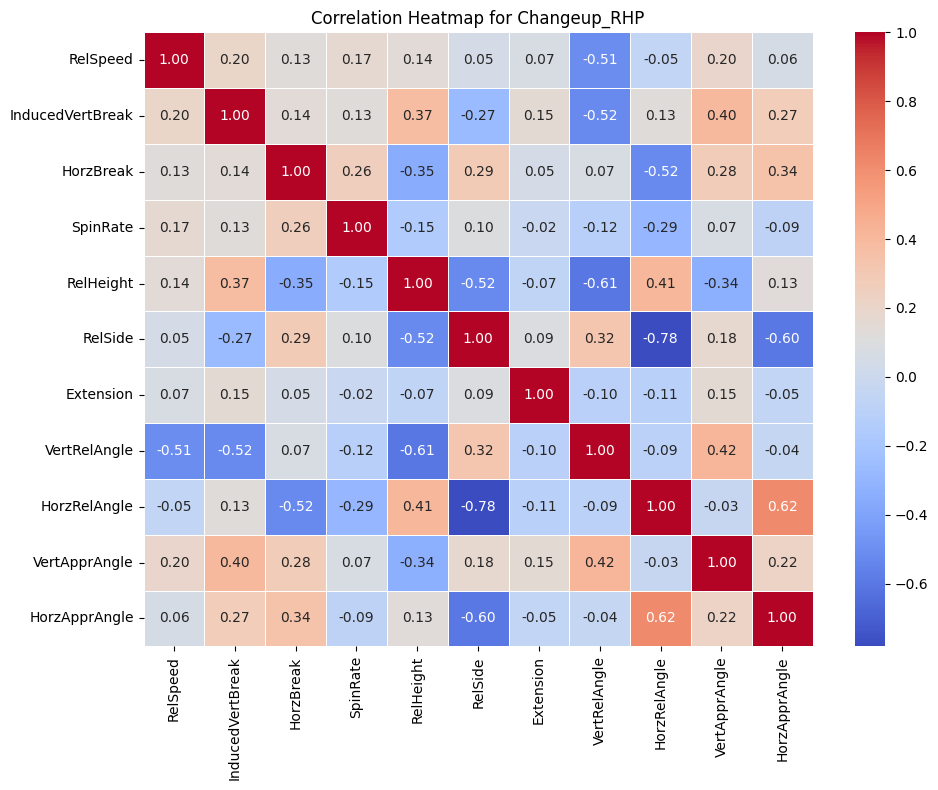

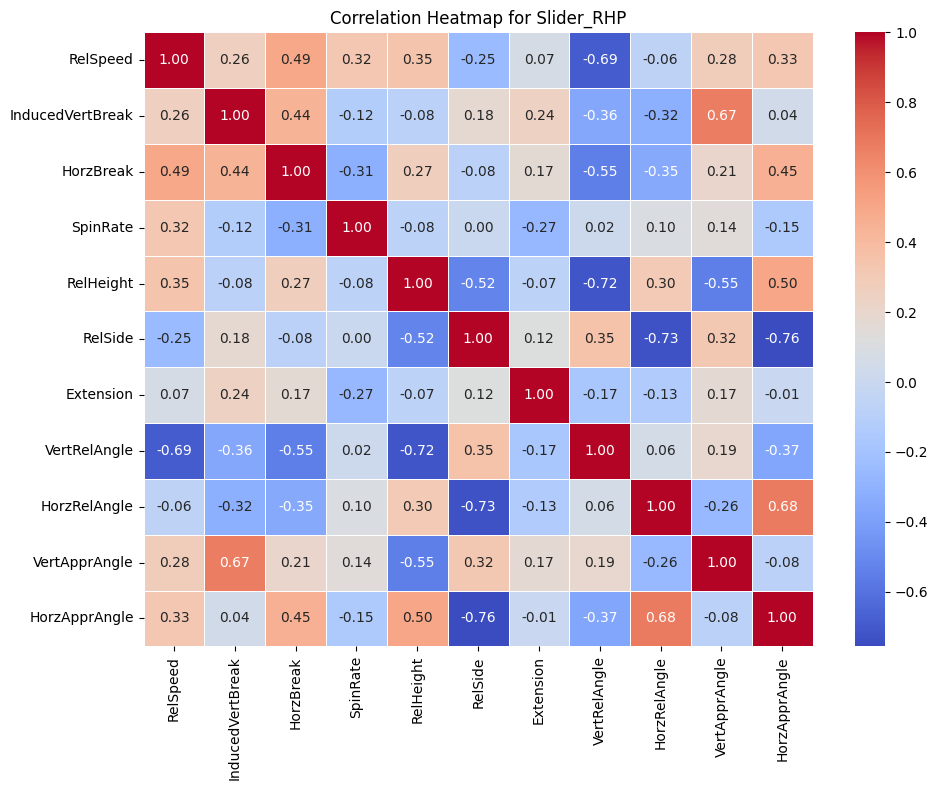

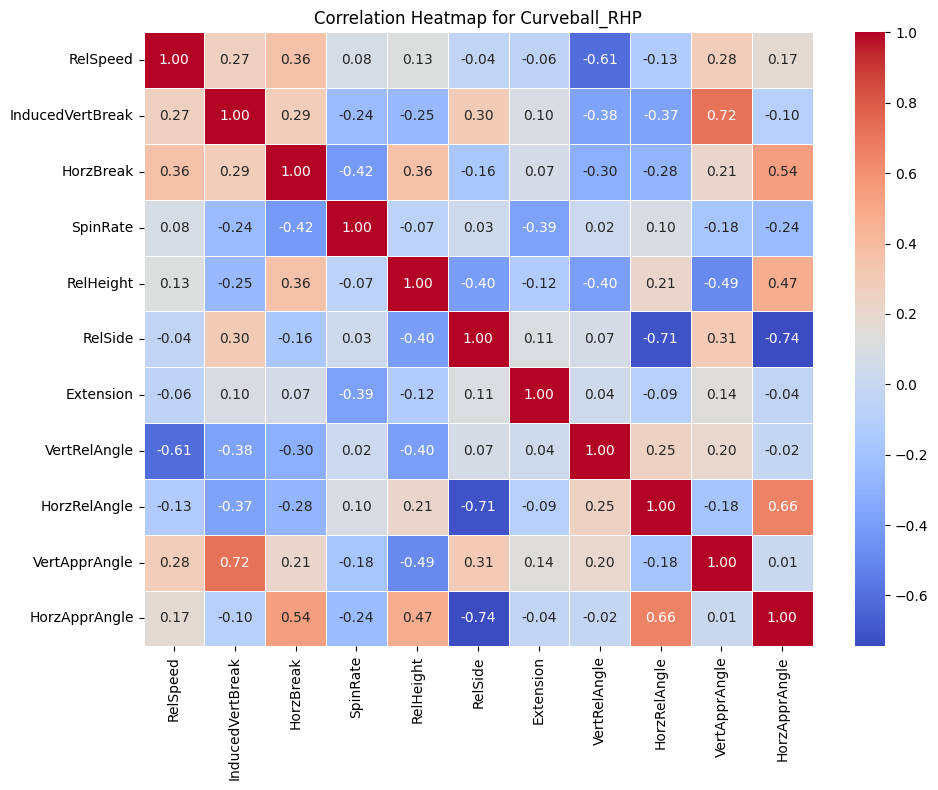

In [ ]:
for df_name, df in pitch_groupedRHP.items():
    # Exclude non-numeric columns (e.g., 'Pitcher') before computing correlation
    numeric_df = df.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    plt.title(f"Correlation Heatmap for {df_name}")
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.tight_layout()
    plt.show()

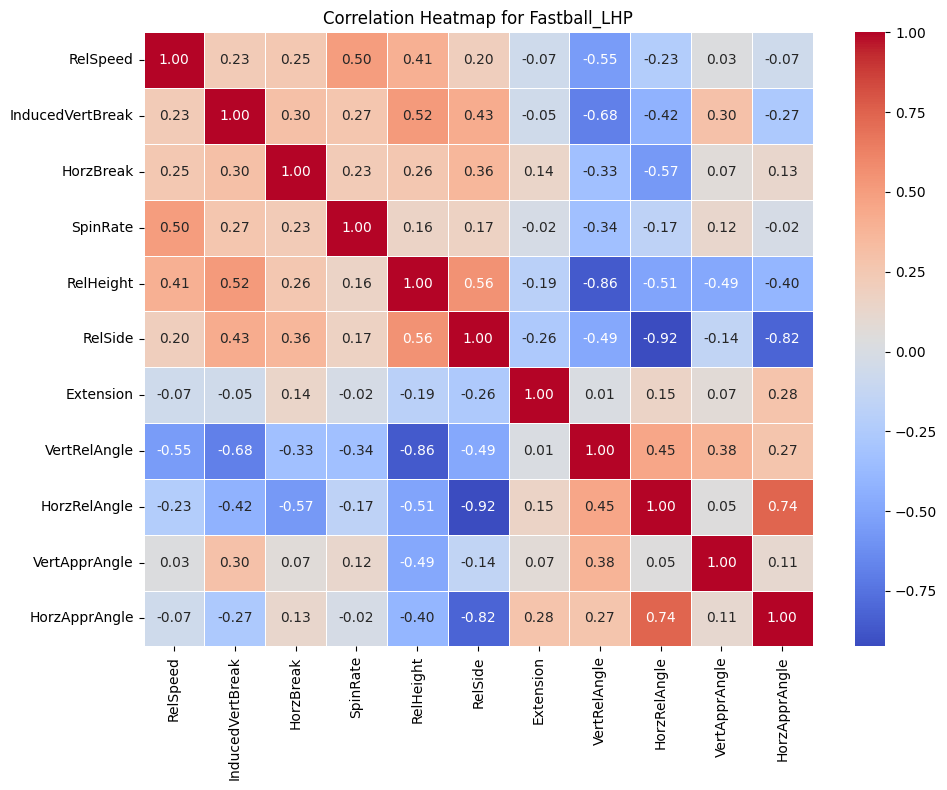

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


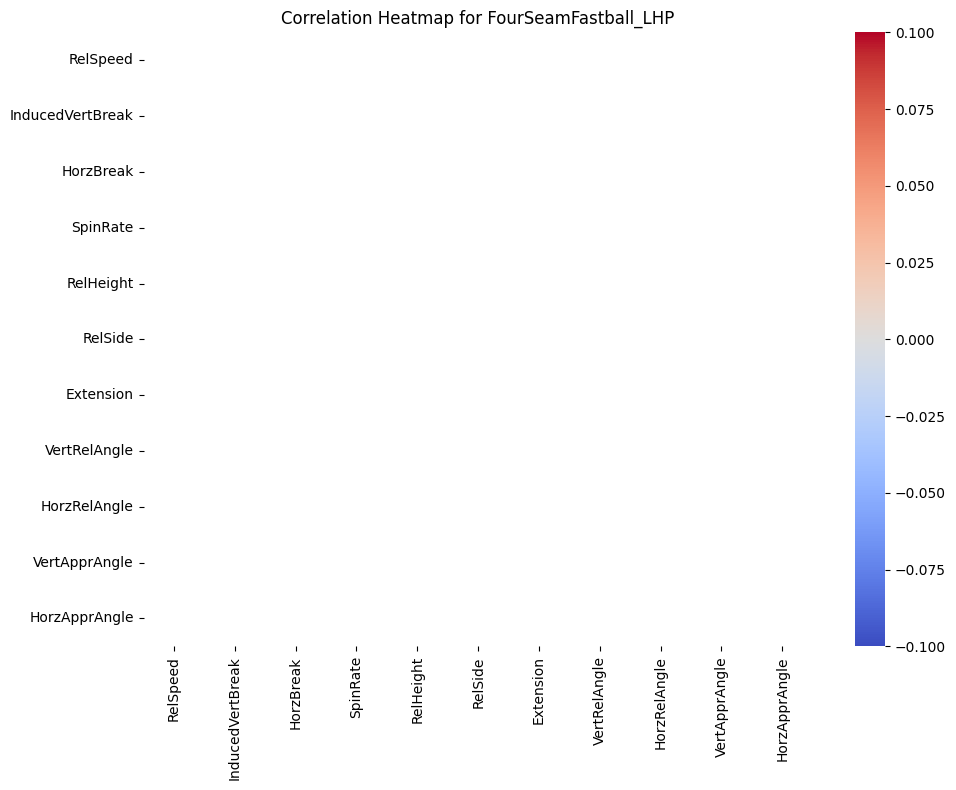

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


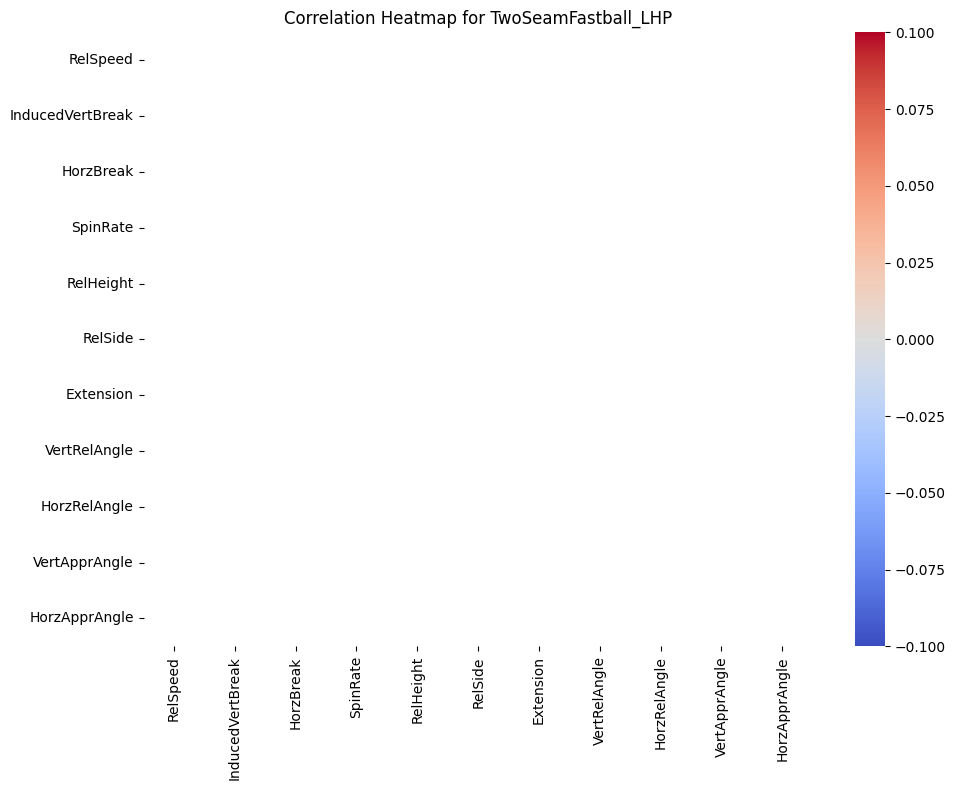

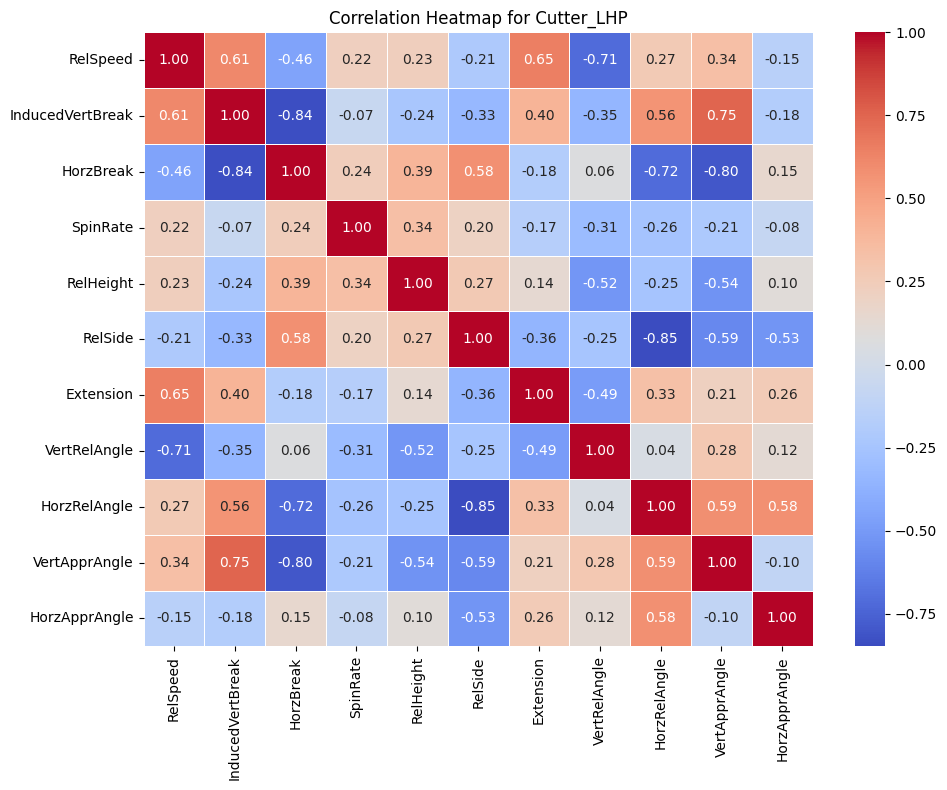

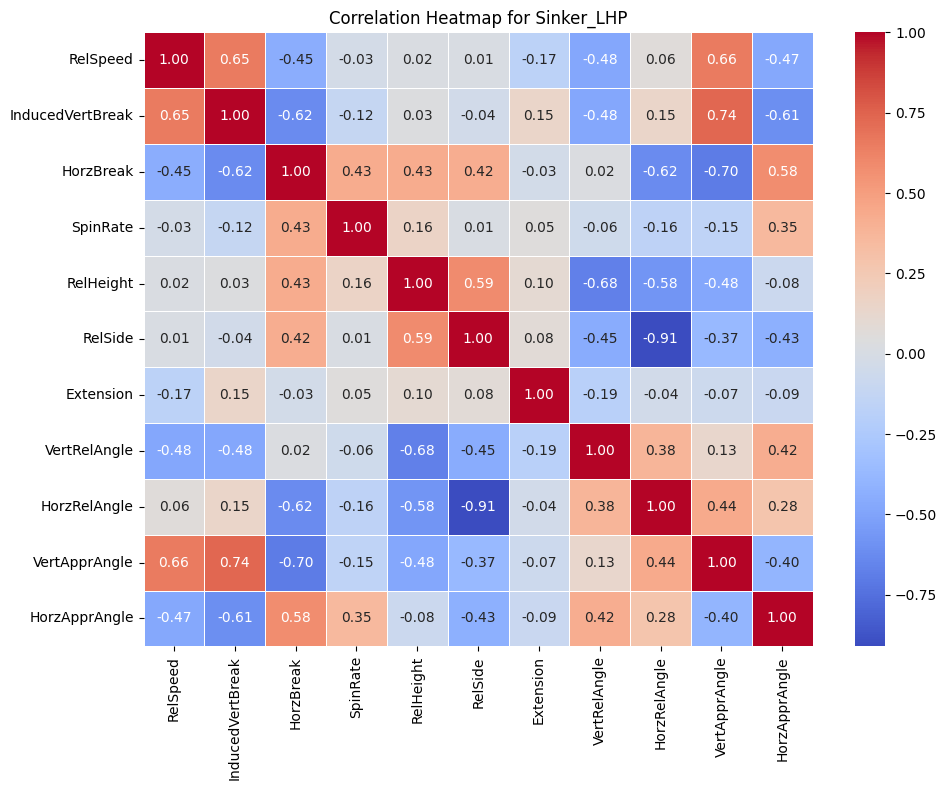

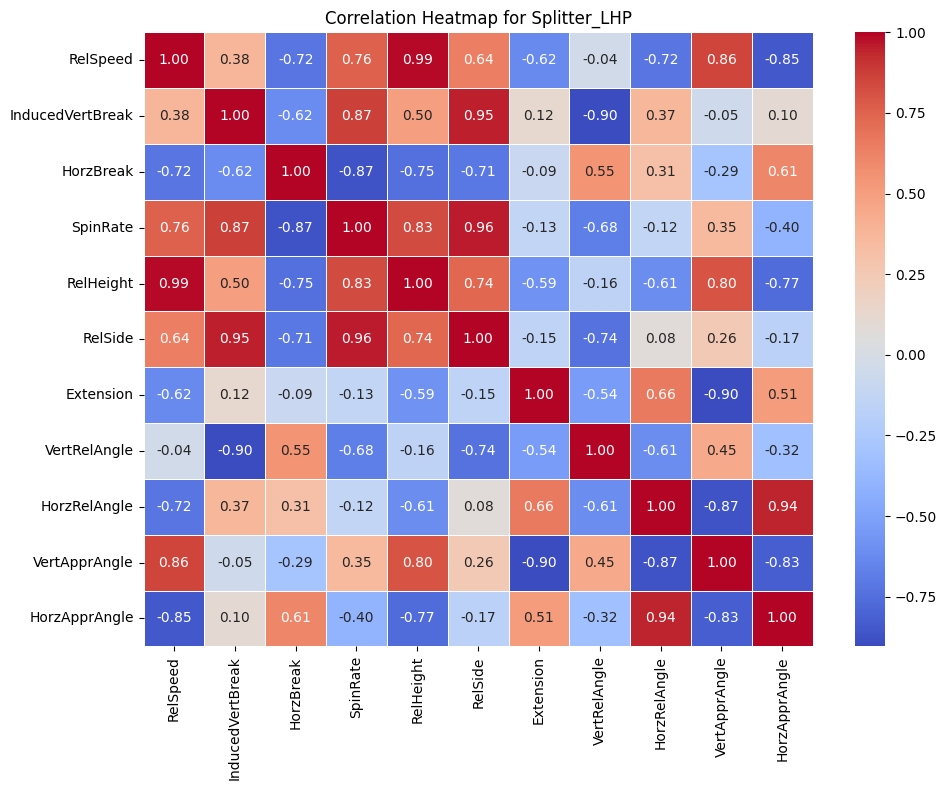

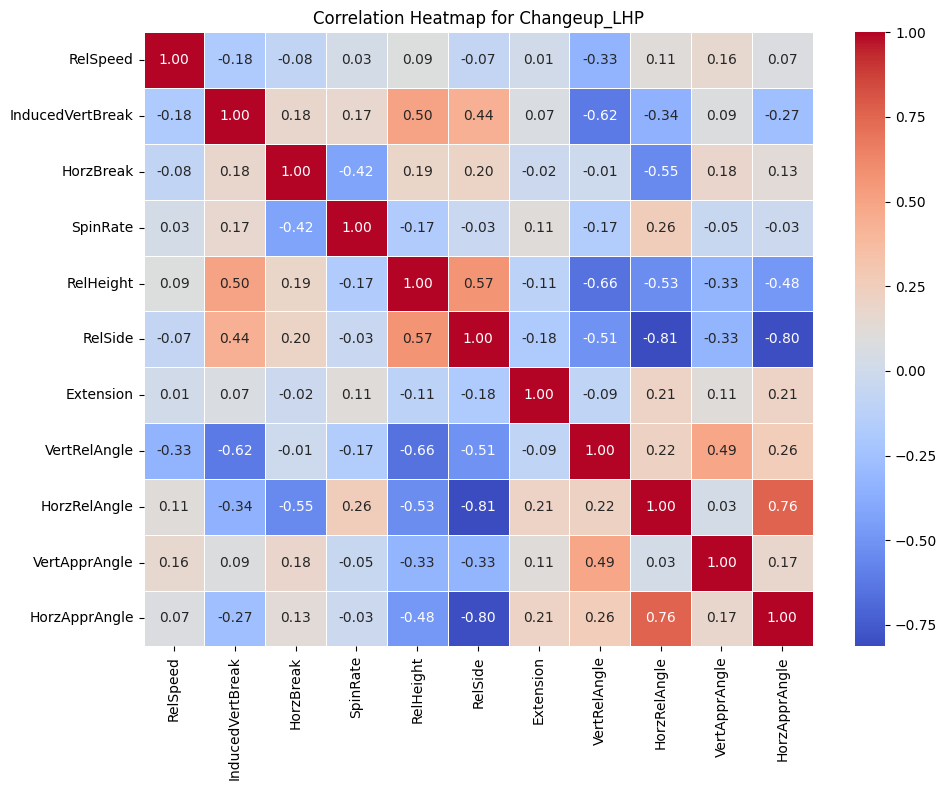

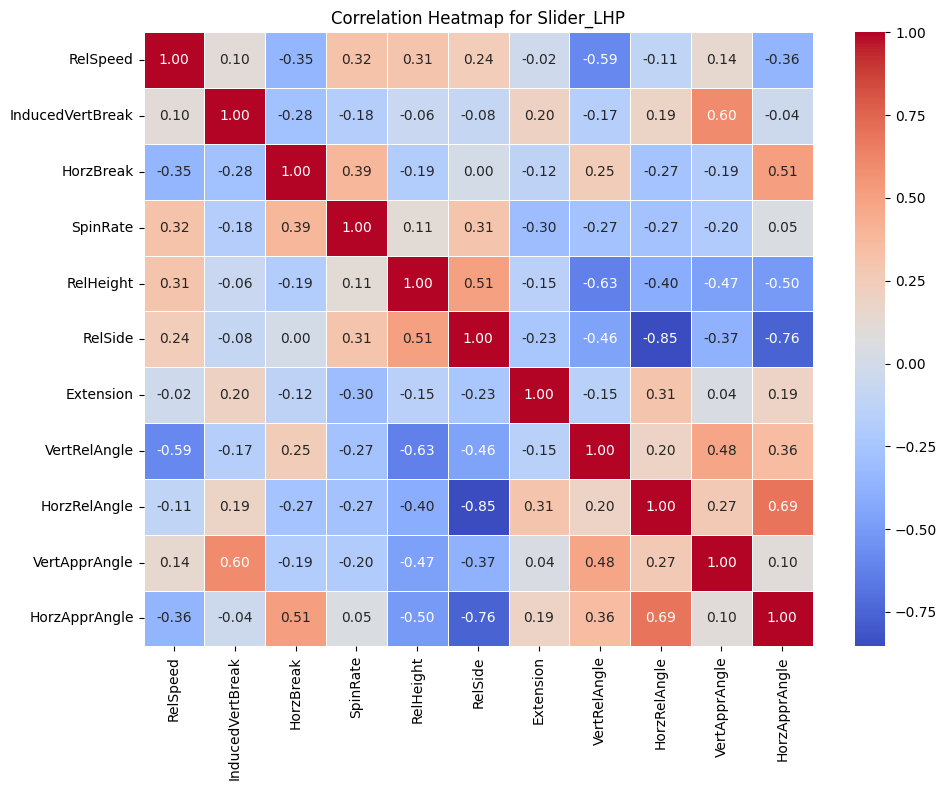

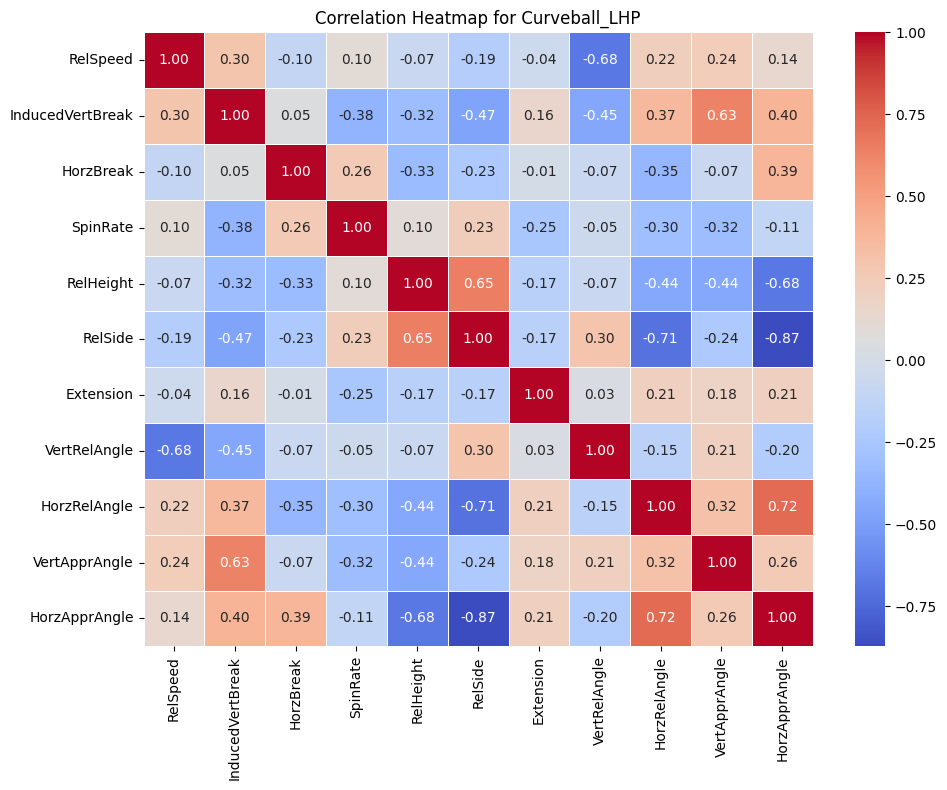

In [ ]:
# Iterate through each DataFrame for left-handed pitchers (LHP)
for df_name, df in pitch_groupedLHP.items():
    # Exclude non-numeric columns (e.g., 'Pitcher') before computing correlation
    numeric_df = df.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    plt.title(f"Correlation Heatmap for {df_name}")
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.tight_layout()
    plt.show()

In [ ]:
# Define a function to select features based on correlation matrix
def select_features(df):
    # Exclude non-numeric columns (e.g., 'Pitcher') before computing correlation
    numeric_df = df.select_dtypes(include='number')
    # Compute correlation matrix
    corr_matrix = numeric_df.corr().abs()

    # Initialize a list to store selected features
    selected_features = []

    # Iterate through each column in the correlation matrix
    for column in corr_matrix.columns:
        # Check if the column is already selected
        if column not in selected_features:
            # Select the column if its absolute correlation value with all previously selected features is <= 0.7
            if all(corr_matrix[column][selected_feature] <= 0.7 for selected_feature in selected_features):
                selected_features.append(column)

    return selected_features

In [ ]:
# Initialize dictionaries to store selected features for each pitch type
selected_features_RHP = {}
selected_features_LHP = {}

# Iterate through each DataFrame for right-handed pitchers (RHP)
for df_name, df in pitch_groupedRHP.items():
    selected_features = select_features(df)
    selected_features_RHP[df_name] = selected_features

# Iterate through each DataFrame for left-handed pitchers (LHP)
for df_name, df in pitch_groupedLHP.items():
    selected_features = select_features(df)
    selected_features_LHP[df_name] = selected_features

In [ ]:
selected_features_RHP['Changeup_RHP']

['RelSpeed',
 'InducedVertBreak',
 'HorzBreak',
 'SpinRate',
 'RelHeight',
 'RelSide',
 'Extension',
 'VertRelAngle',
 'VertApprAngle',
 'HorzApprAngle']

In [ ]:
# Iterate through each pitch type for right-handed pitchers (RHP)
print("Selected features for right-handed pitchers (RHP):")
for df_name, selected_features in selected_features_RHP.items():
    print(f"{df_name}: {selected_features}")

# Iterate through each pitch type for left-handed pitchers (LHP)
print("\nSelected features for left-handed pitchers (LHP):")
for df_name, selected_features in selected_features_LHP.items():
    print(f"{df_name}: {selected_features}")

Selected features for right-handed pitchers (RHP):
Fastball_RHP: ['RelSpeed', 'InducedVertBreak', 'HorzBreak', 'SpinRate', 'RelHeight', 'RelSide', 'Extension', 'VertApprAngle']
FourSeamFastball_RHP: ['RelSpeed', 'InducedVertBreak', 'HorzBreak', 'RelHeight', 'RelSide', 'Extension', 'HorzRelAngle', 'VertApprAngle']
TwoSeamFastball_RHP: ['RelSpeed', 'InducedVertBreak', 'RelHeight', 'VertRelAngle', 'HorzRelAngle', 'HorzApprAngle']
Cutter_RHP: ['RelSpeed', 'InducedVertBreak', 'HorzBreak', 'SpinRate', 'RelHeight', 'RelSide', 'Extension', 'VertApprAngle', 'HorzApprAngle']
Sinker_RHP: ['RelSpeed', 'InducedVertBreak', 'HorzBreak', 'SpinRate', 'RelHeight', 'RelSide', 'Extension', 'VertApprAngle', 'HorzApprAngle']
Splitter_RHP: ['RelSpeed', 'InducedVertBreak', 'HorzBreak', 'SpinRate', 'RelHeight', 'RelSide', 'Extension', 'VertRelAngle', 'VertApprAngle', 'HorzApprAngle']
Changeup_RHP: ['RelSpeed', 'InducedVertBreak', 'HorzBreak', 'SpinRate', 'RelHeight', 'RelSide', 'Extension', 'VertRelAngle', 'Ve

# K-Means Clustering, Reduction to 2D with TSNE, and Visualization of Clusters

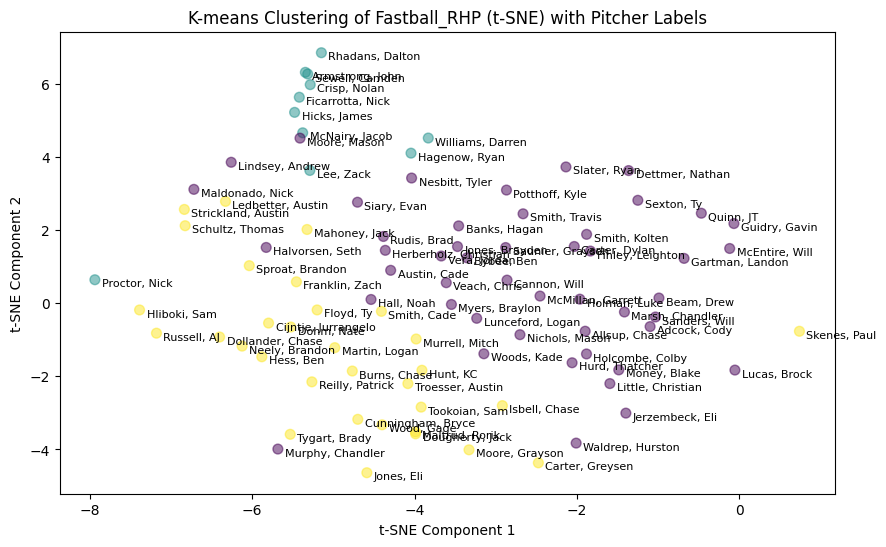

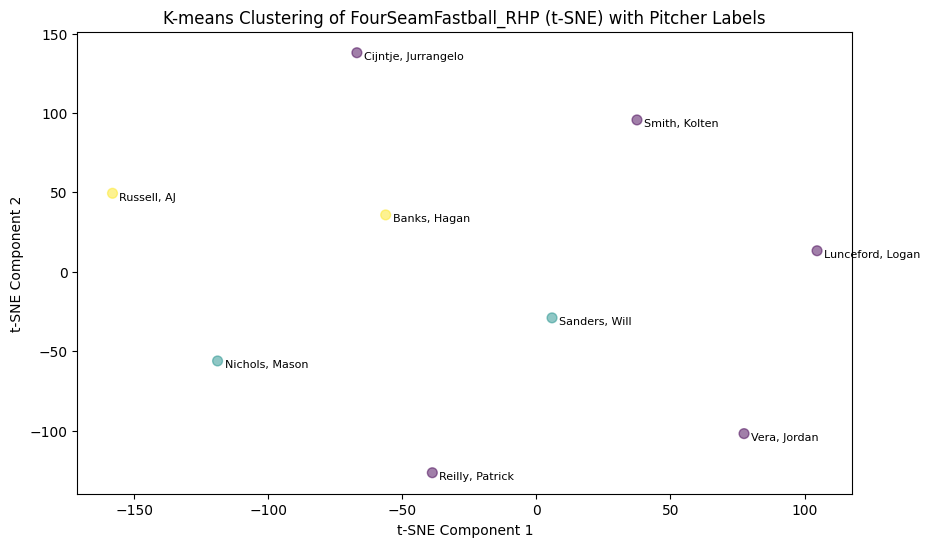

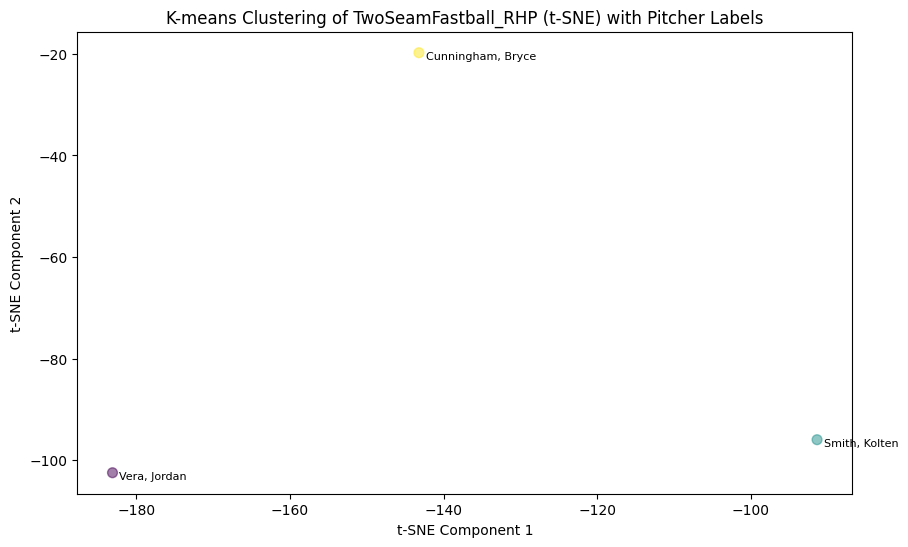

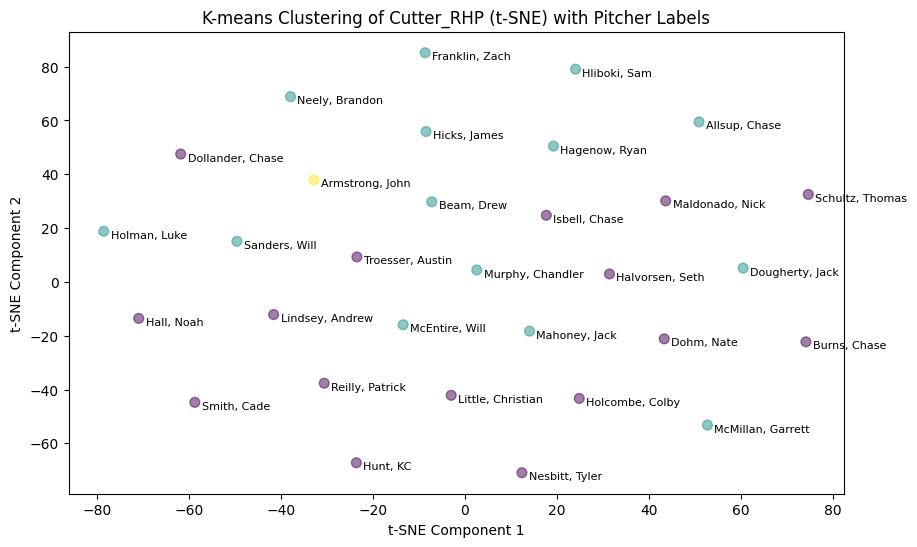

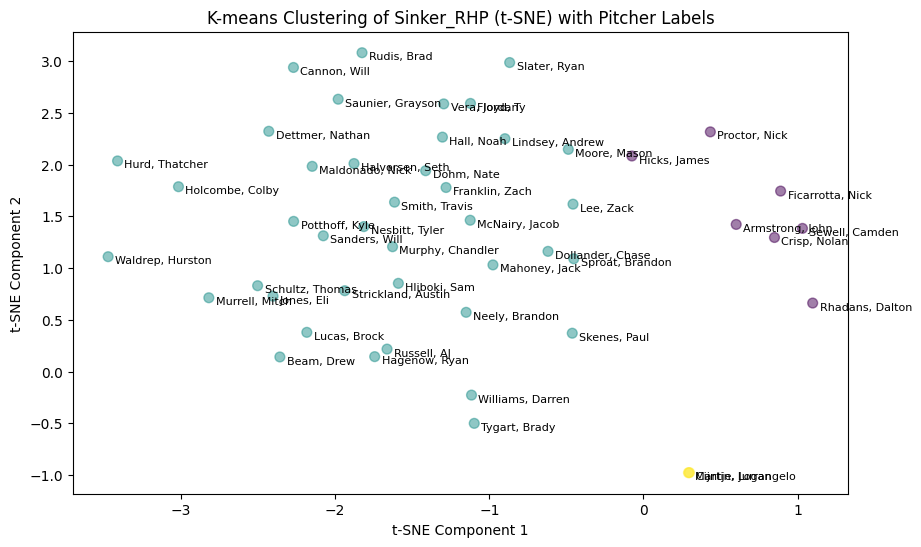

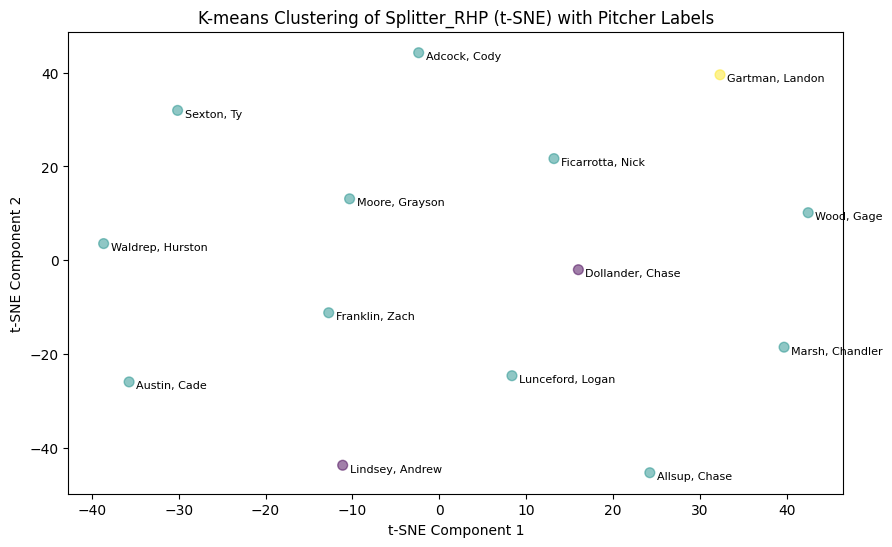

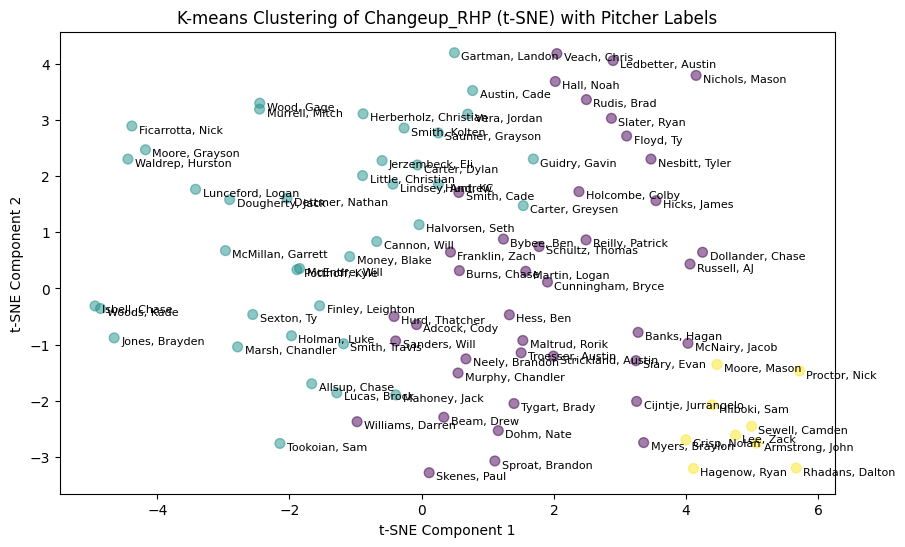

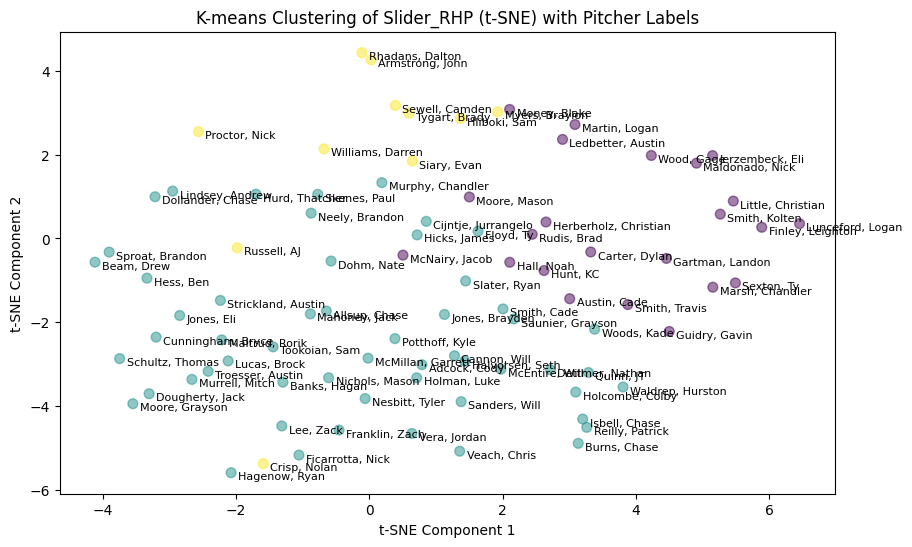

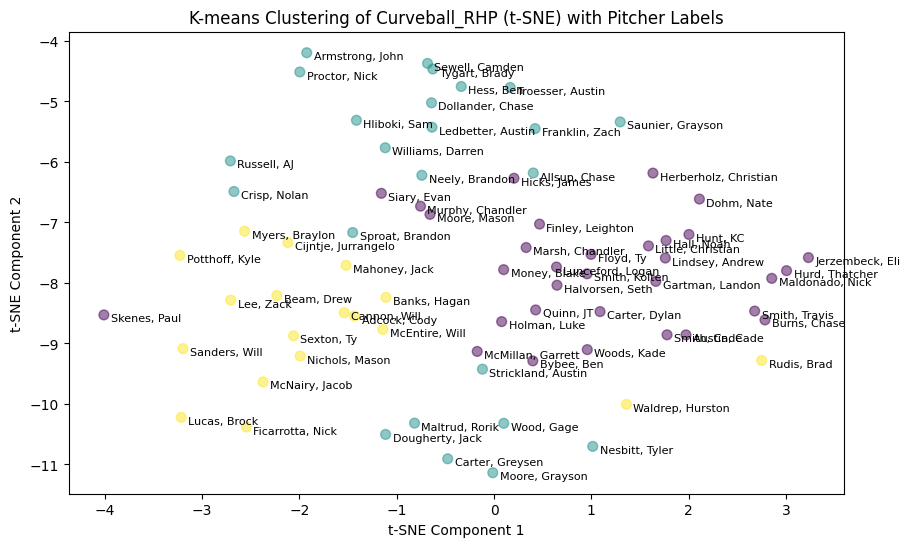

In [ ]:
# Initialize dictionaries to store scalers and kmeans models for each pitch type
scalers_RHP = {}
kmeans_models_RHP = {}

# Iterate over each combination of pitch type and handedness for RHP
for pitch_type, features in selected_features_RHP.items():
    X = merged_RHP_stats[pitch_type][features]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Store the scaler for this pitch type
    scalers_RHP[pitch_type] = scaler

    # Calculate perplexity
    n_samples = X_scaled.shape[0]
    perplexity = min(30, n_samples - 1)  # Adjust the default value as needed

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Store the KMeans model for this pitch type
    kmeans_models_RHP[pitch_type] = kmeans

    # Reduce dimensionality using t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Visualize the reduced clusters with labels
    plt.figure(figsize=(10, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

    # Add labels for each point with smaller font size
    for i, txt in enumerate(merged_RHP_stats[pitch_type]['Pitcher']):
        plt.annotate(txt, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=8, xytext=(5,-5), textcoords='offset points')

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f'K-means Clustering of {pitch_type} (t-SNE) with Pitcher Labels')
    plt.show()

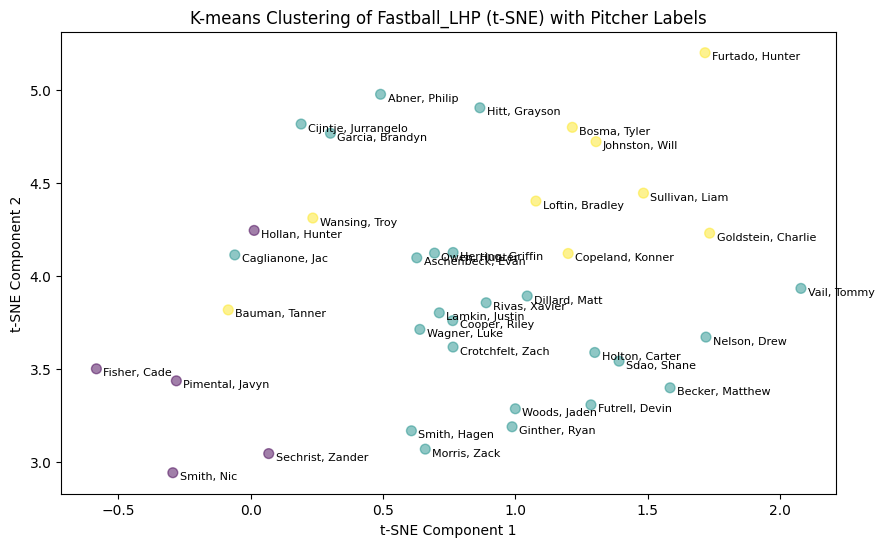

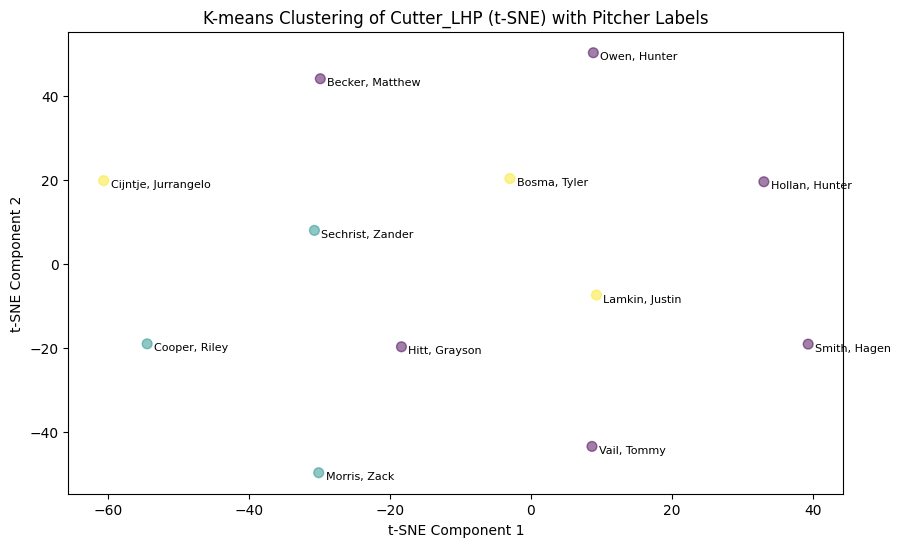

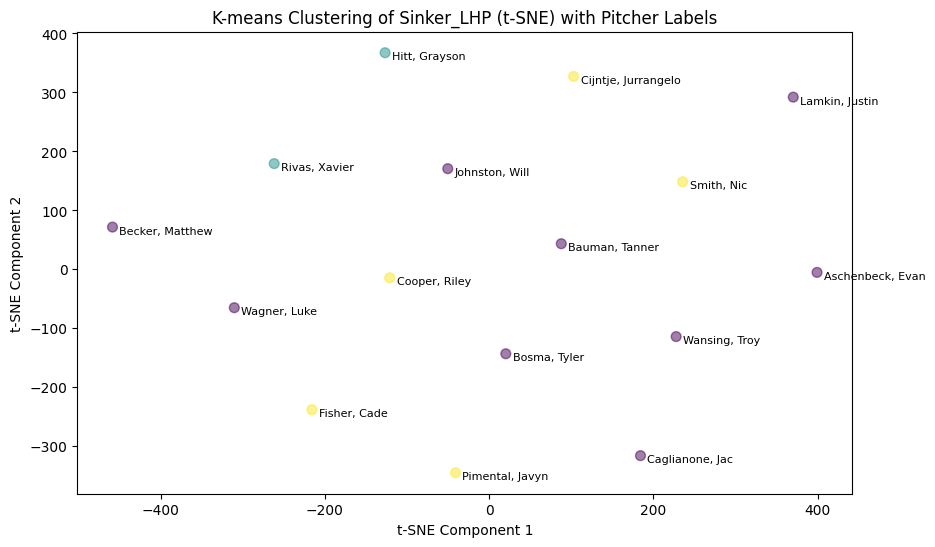

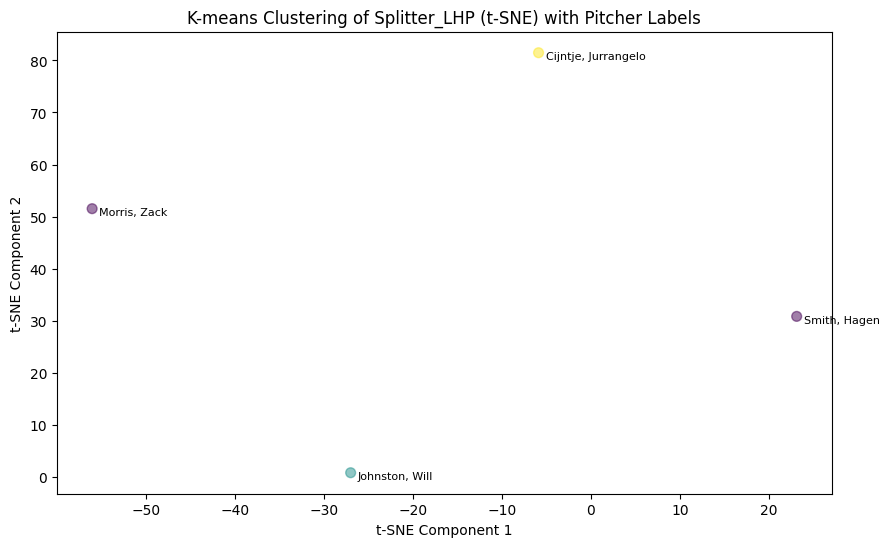

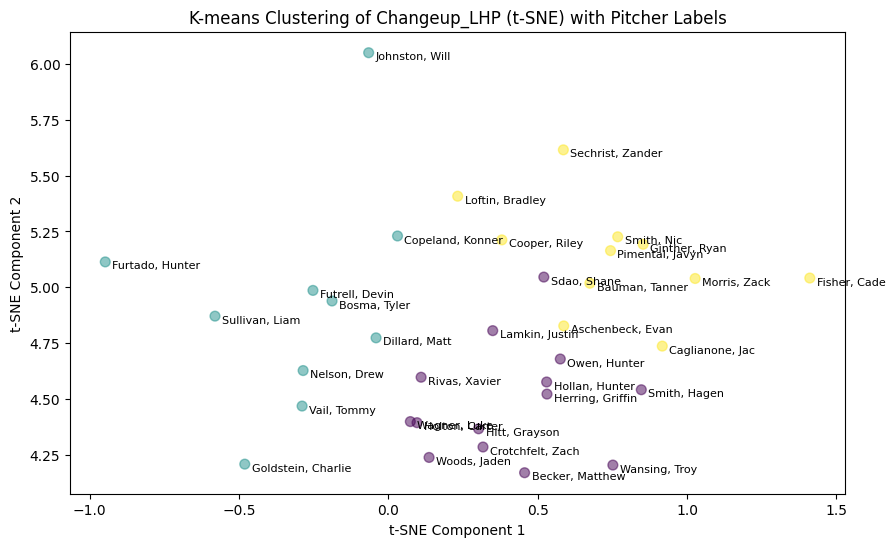

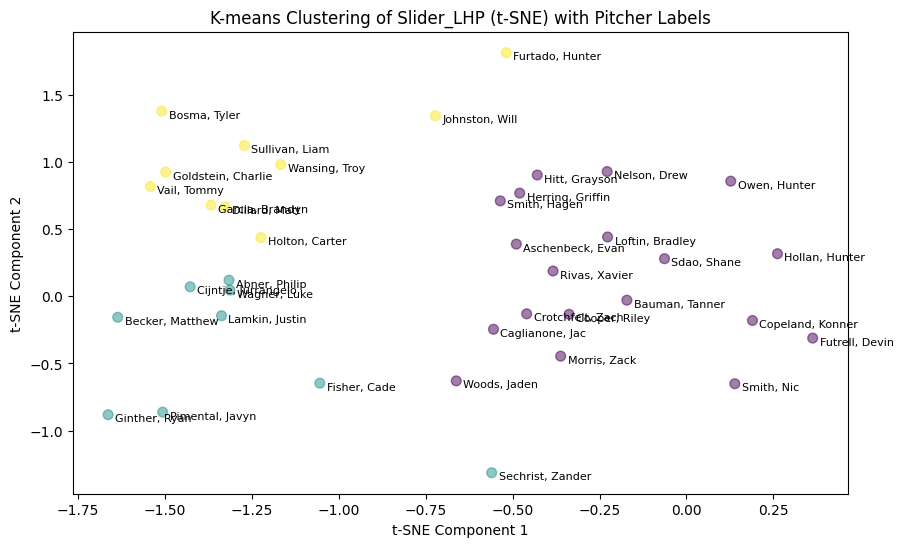

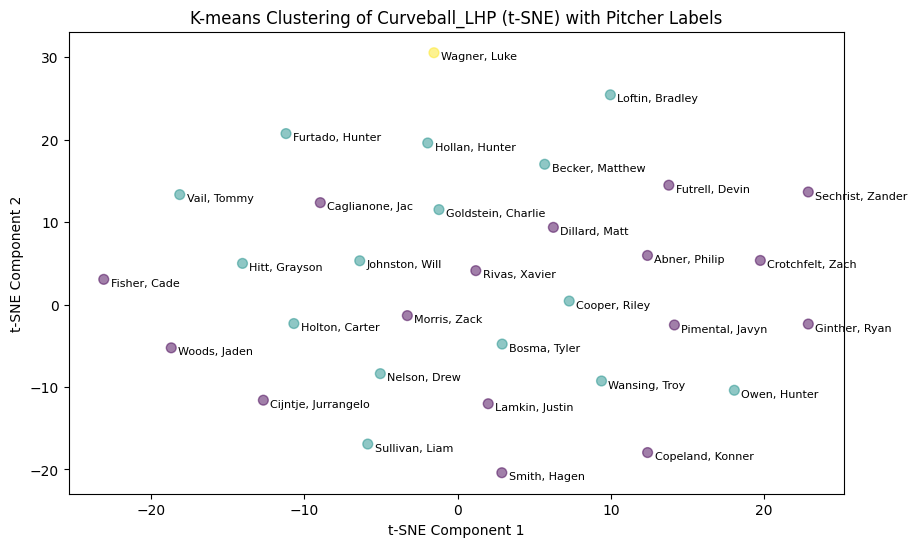

In [ ]:
# Create dictionaries to store KMeans models and scalers for LHP
kmeans_models_LHP = {}
scalers_LHP = {}

# Repeat the process for LHP
for pitch_type, features in selected_features_LHP.items():
    X = merged_LHP_stats[pitch_type][features]

    # Check if the dataframe size is greater than 0
    if X.shape[0] > 0:
        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Calculate perplexity
        n_samples = X_scaled.shape[0]
        perplexity = min(30, n_samples - 1)  # Adjust the default value as needed

        # Perform K-means clustering
        kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)

        # Store the KMeans model and scaler in the dictionaries
        kmeans_models_LHP[pitch_type] = kmeans
        scalers_LHP[pitch_type] = scaler

        # Reduce dimensionality using t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)

        # Visualize the reduced clusters with labels
        plt.figure(figsize=(10, 6))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

        # Add labels for each point with smaller font size
        for i, txt in enumerate(merged_LHP_stats[pitch_type]['Pitcher']):
            plt.annotate(txt, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=8, xytext=(5,-5), textcoords='offset points')

        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.title(f'K-means Clustering of {pitch_type} (t-SNE) with Pitcher Labels')
        plt.show()

# See how Clusters relate to Performance Metrics

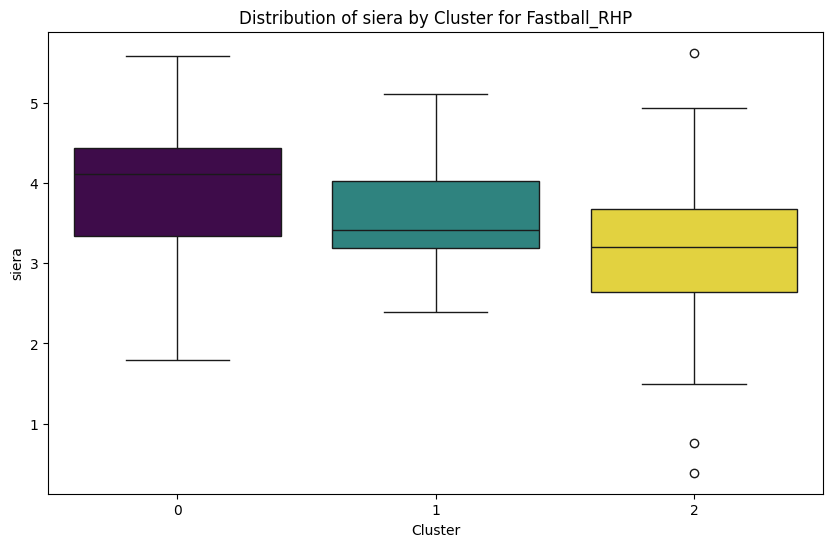

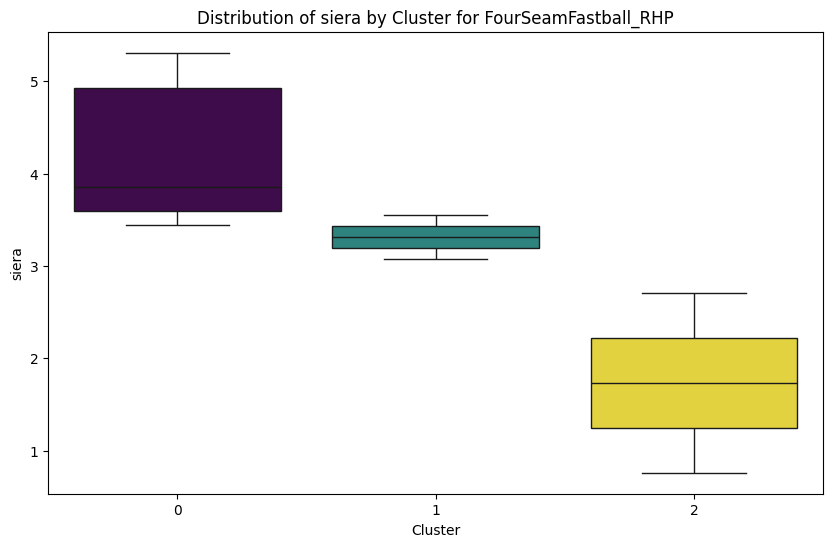

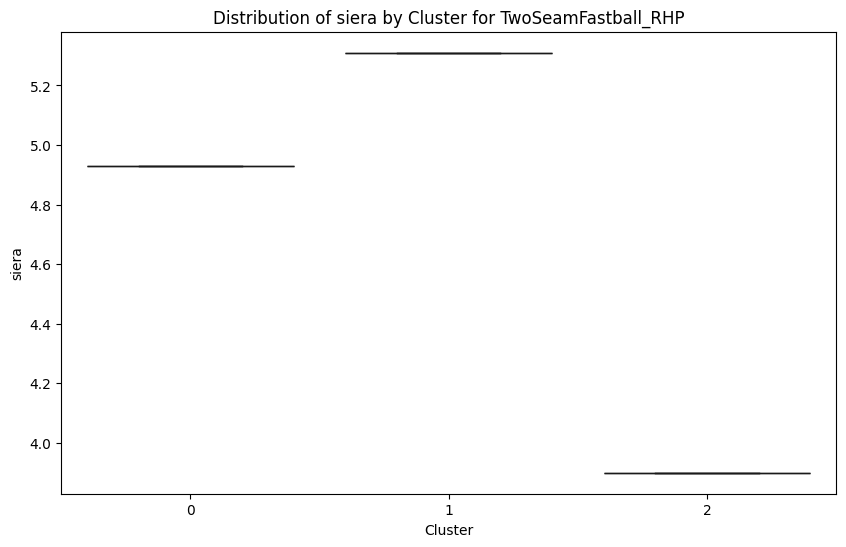

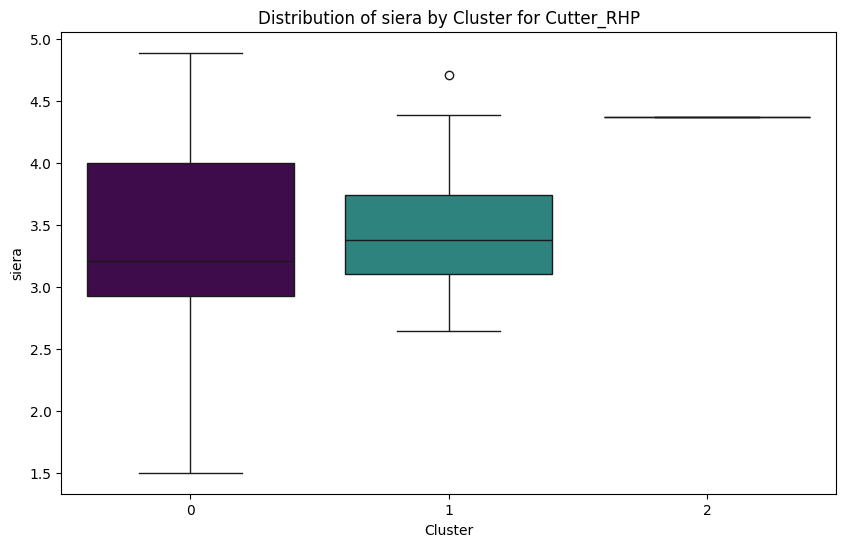

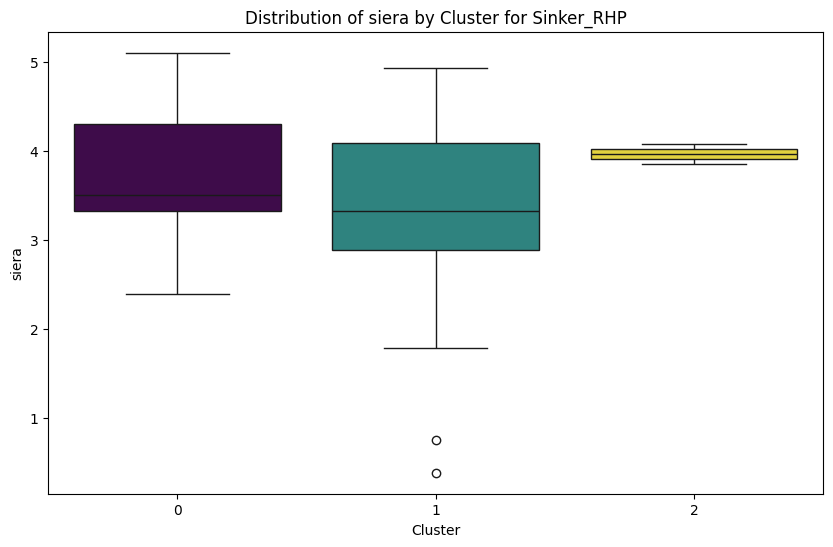

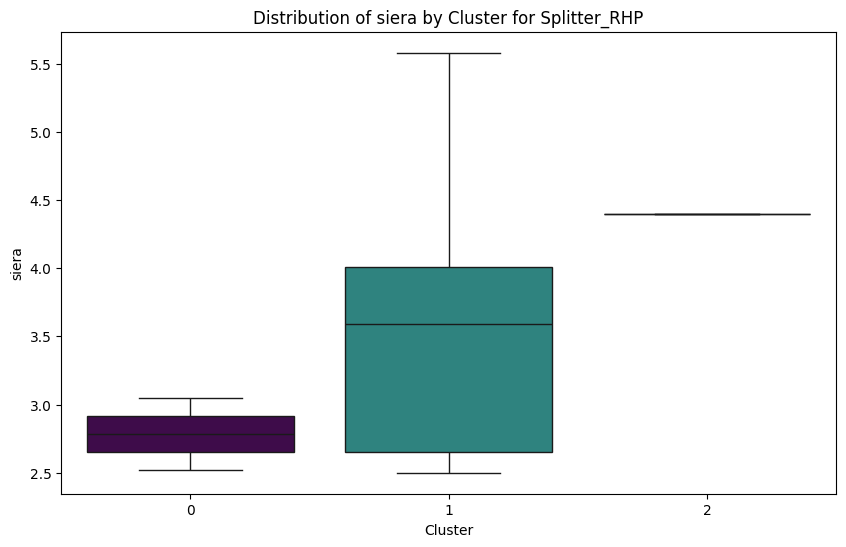

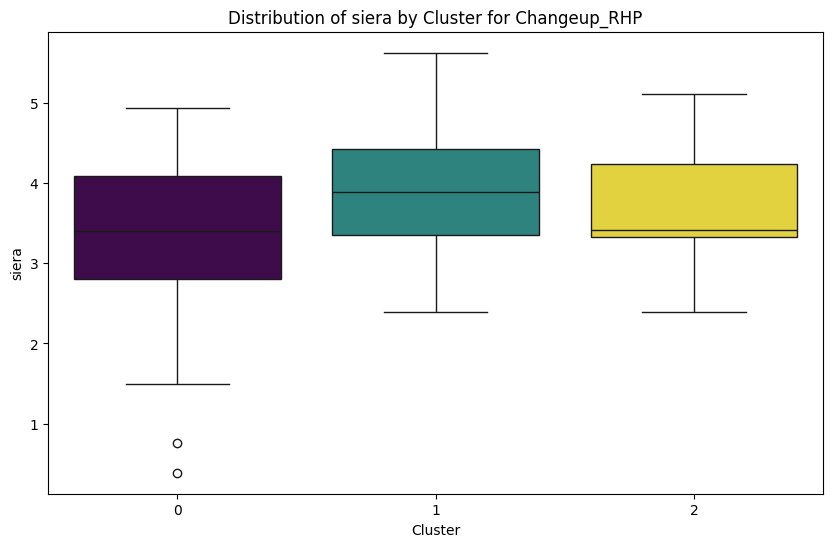

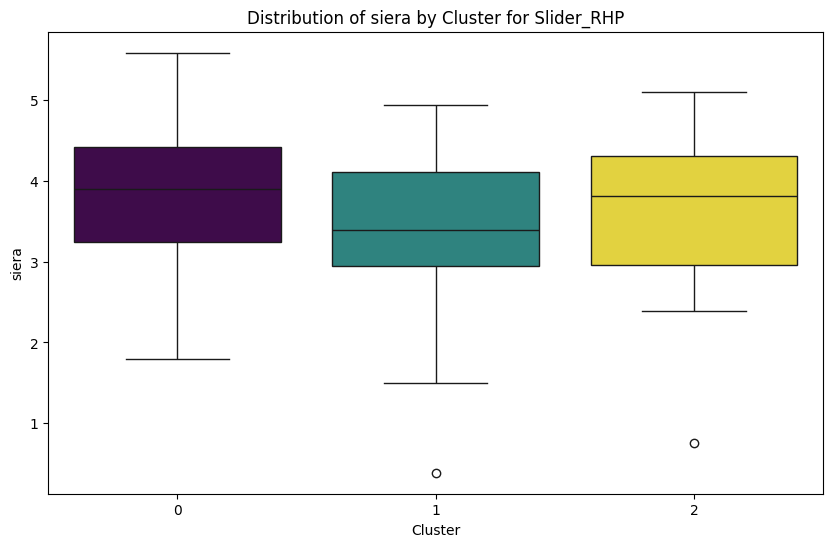

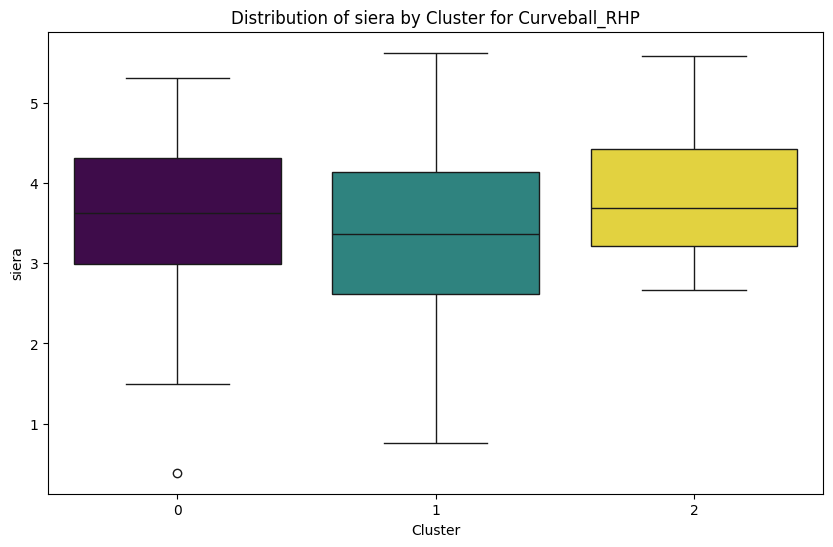

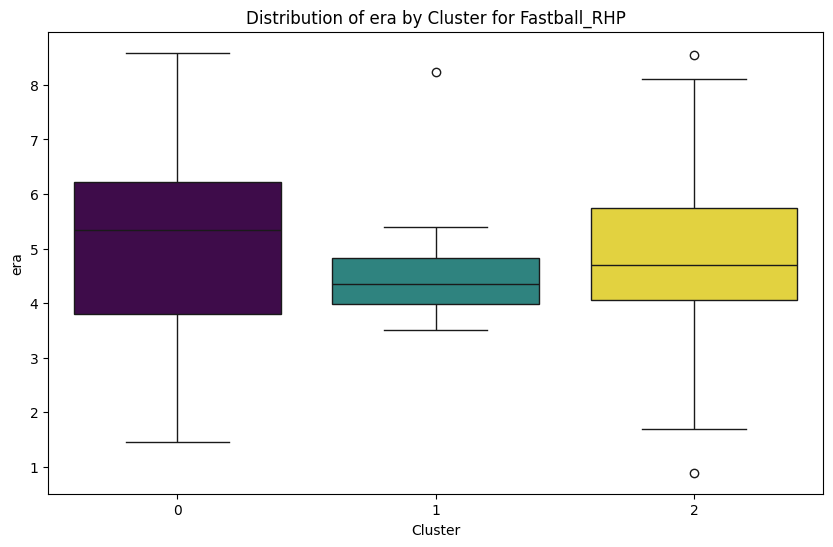

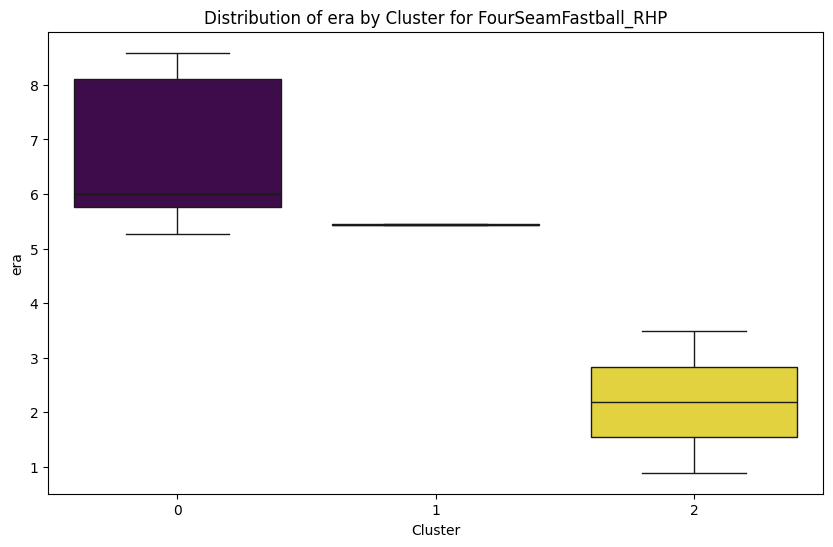

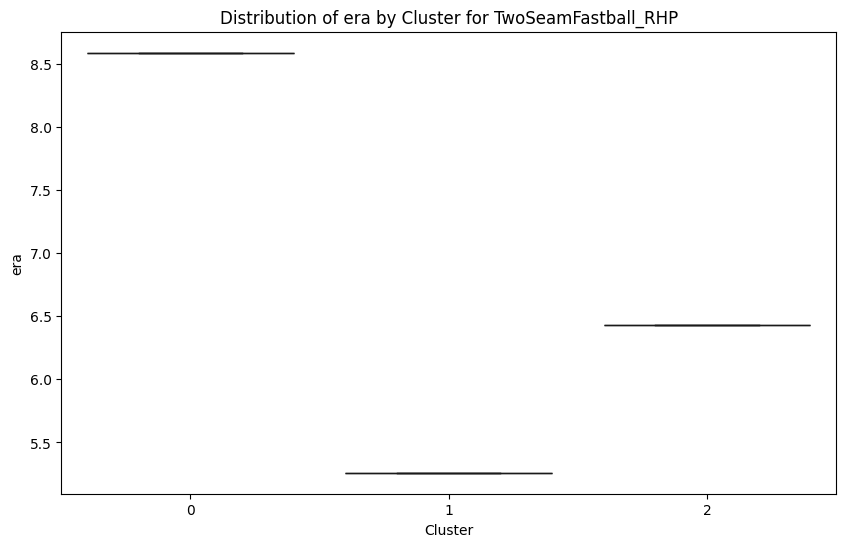

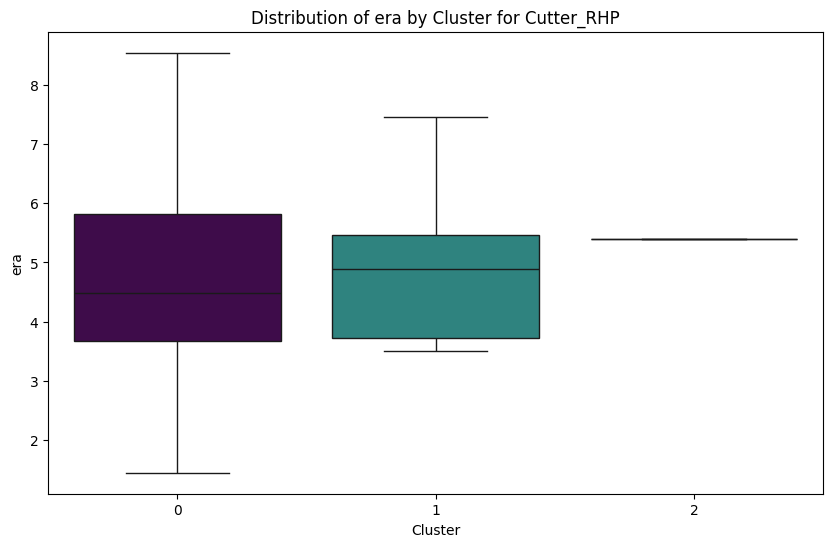

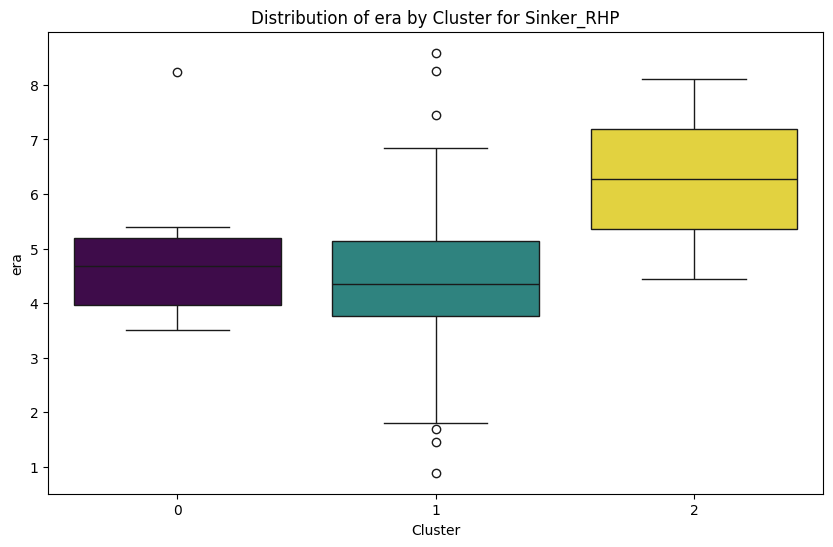

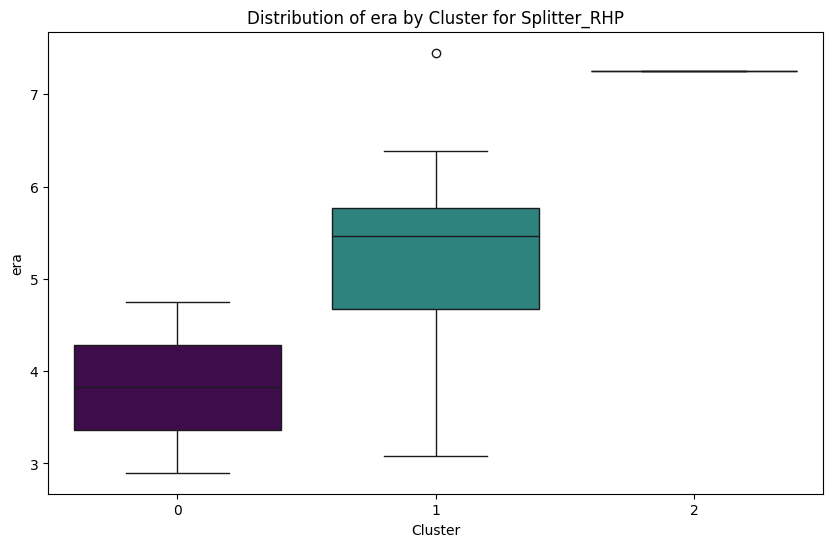

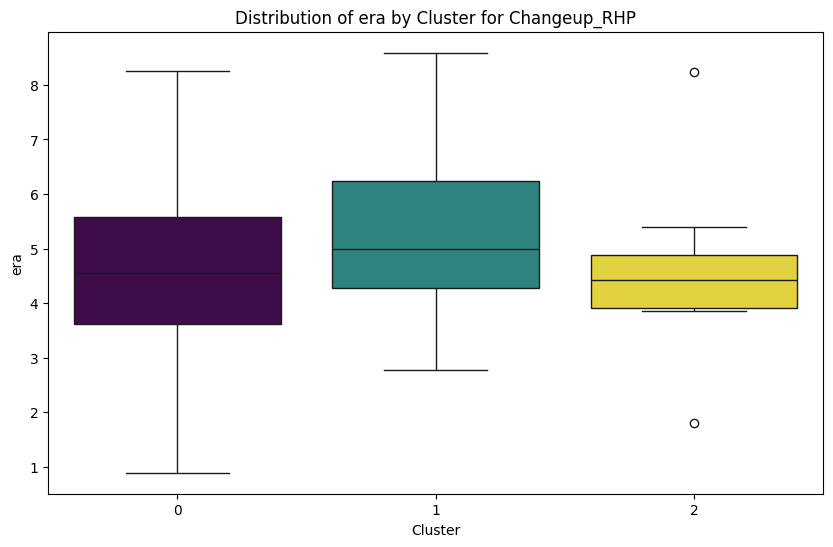

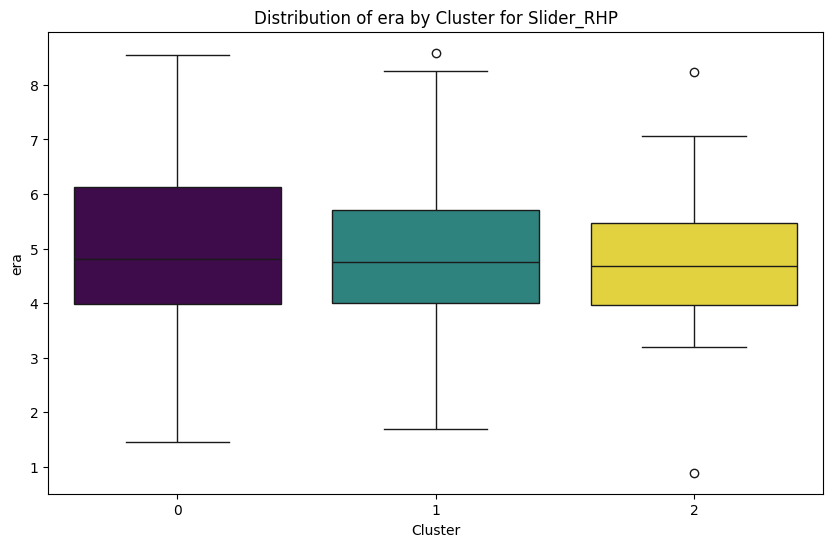

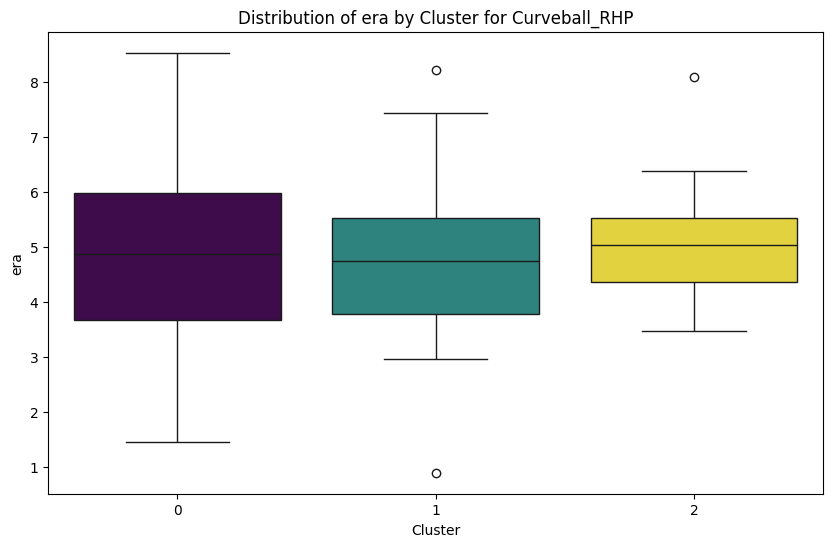

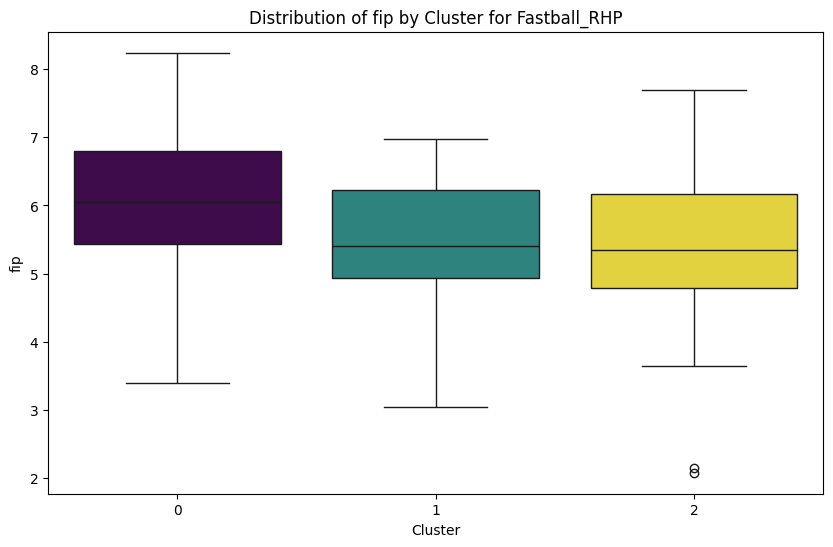

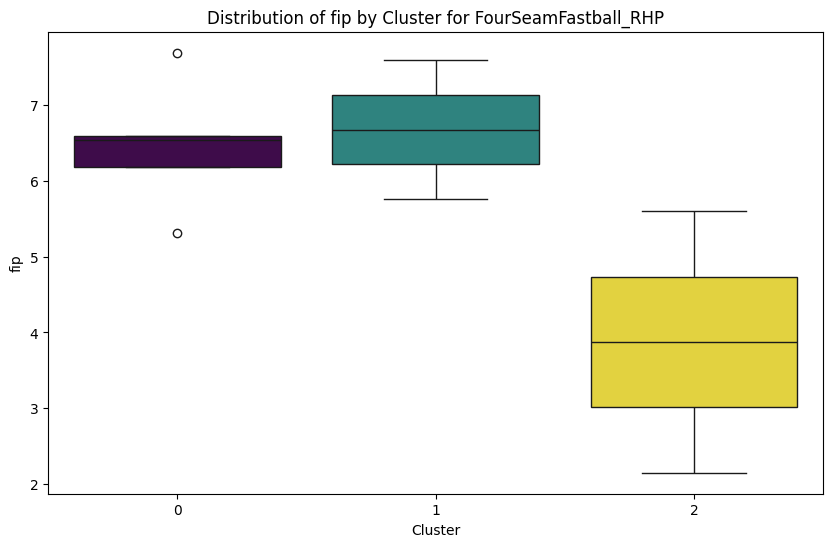

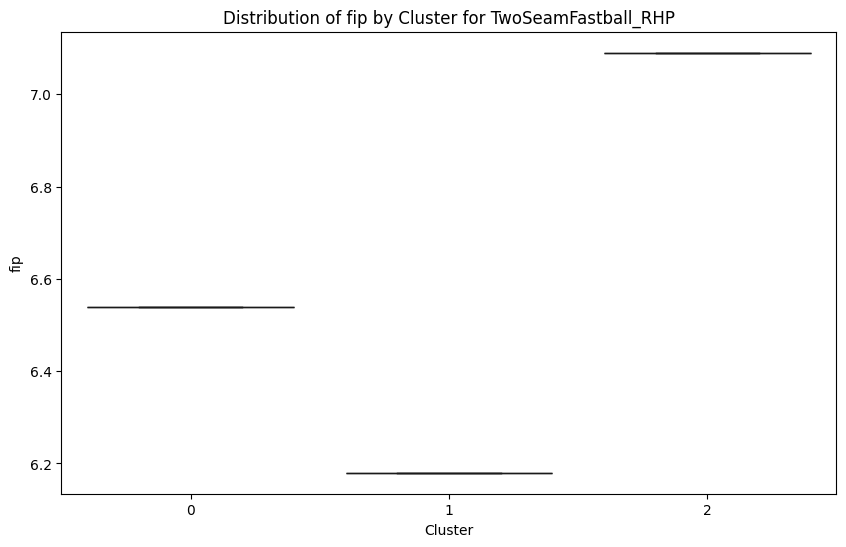

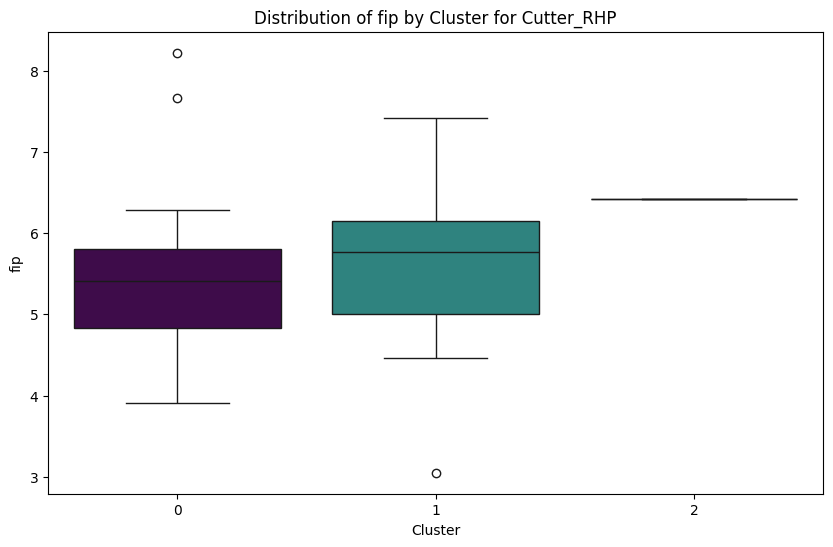

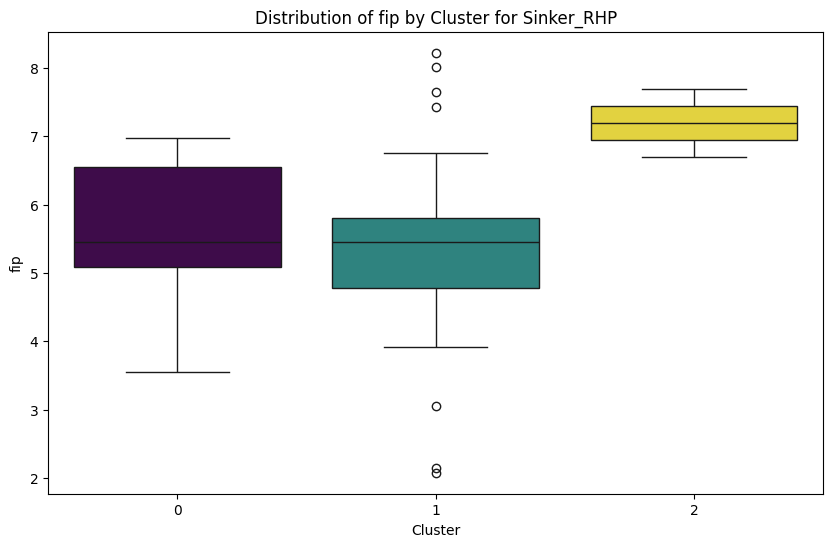

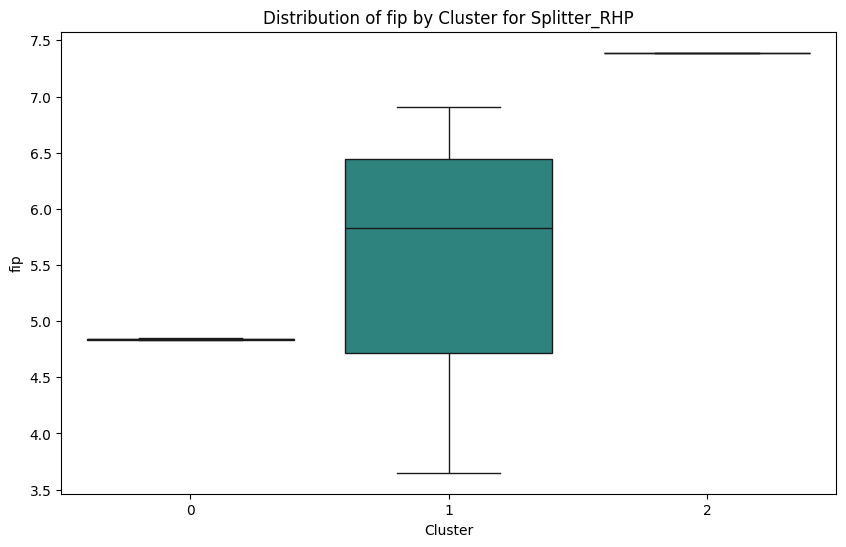

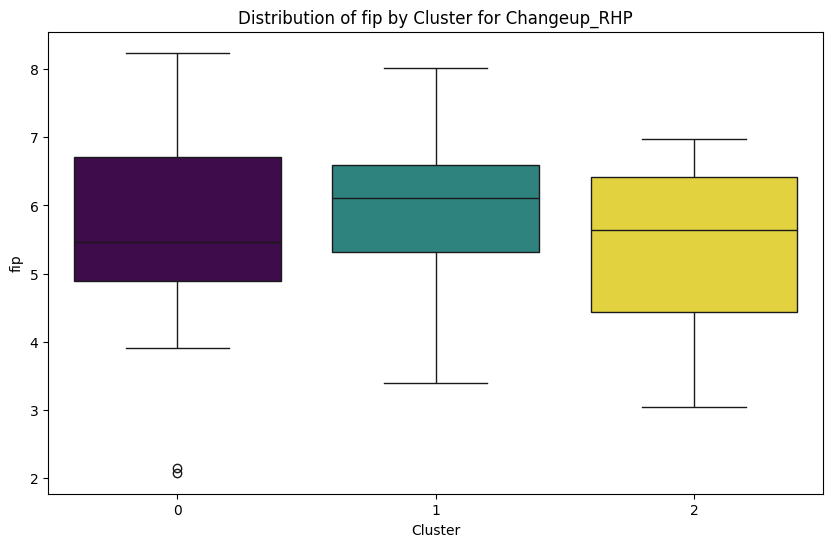

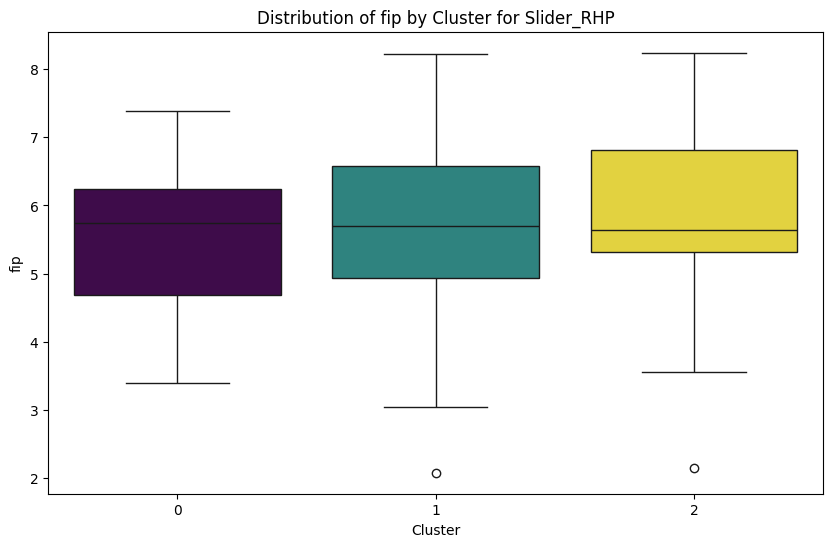

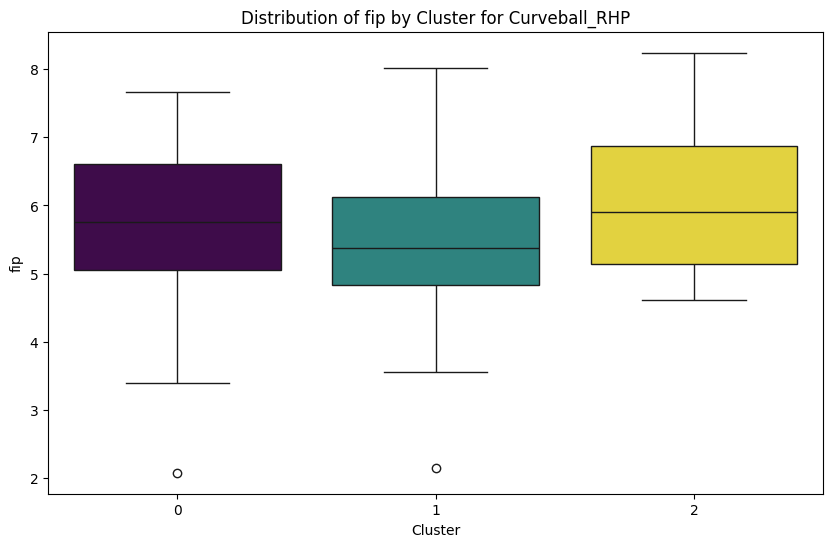

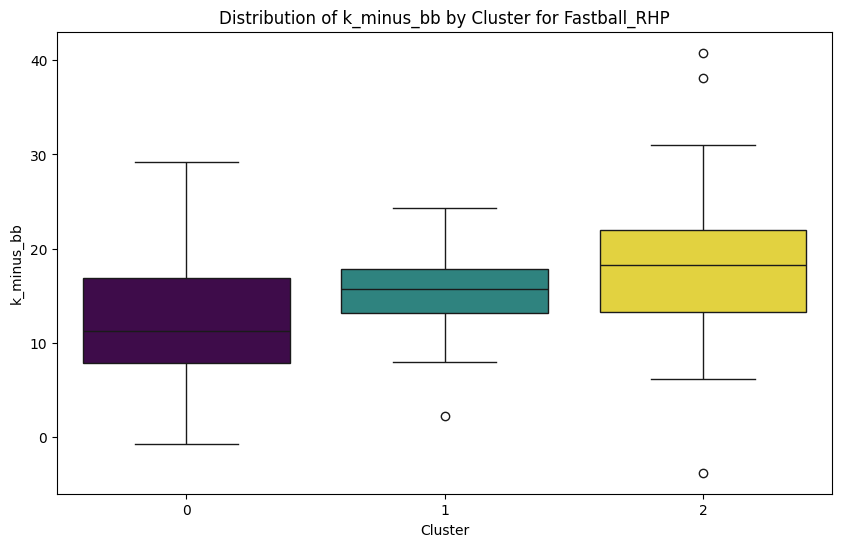

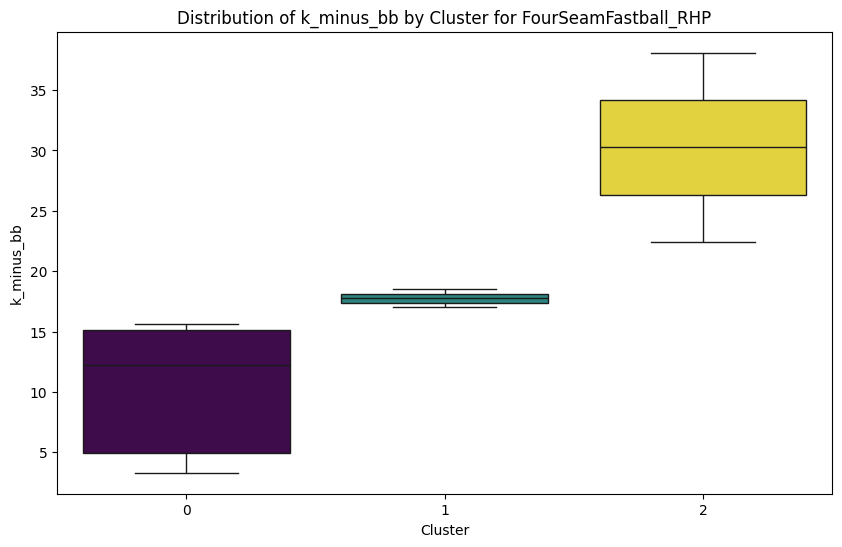

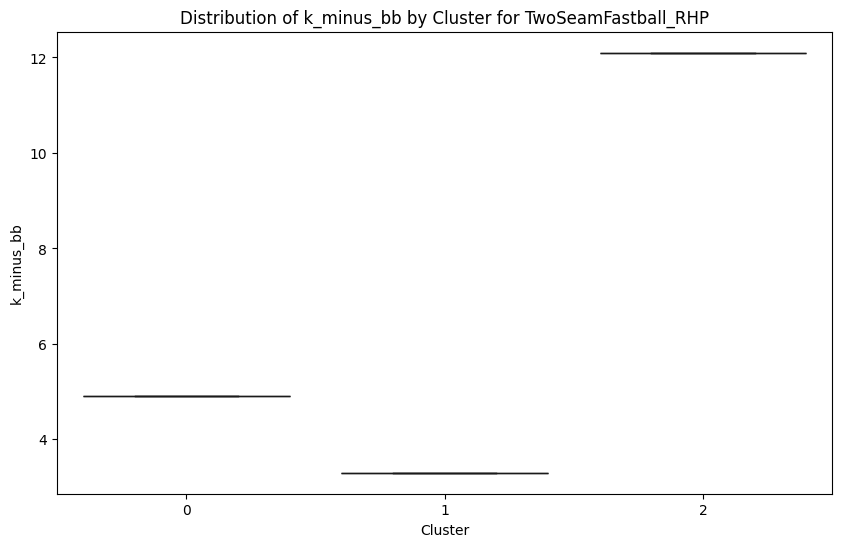

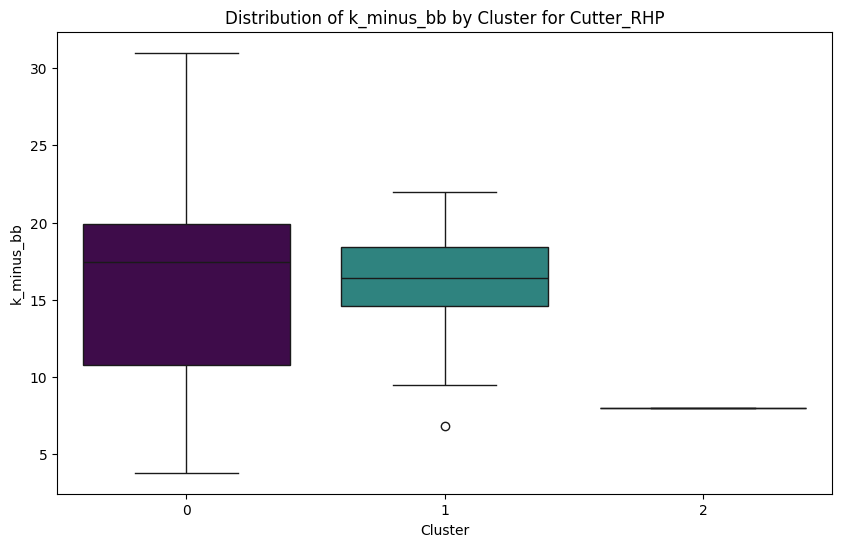

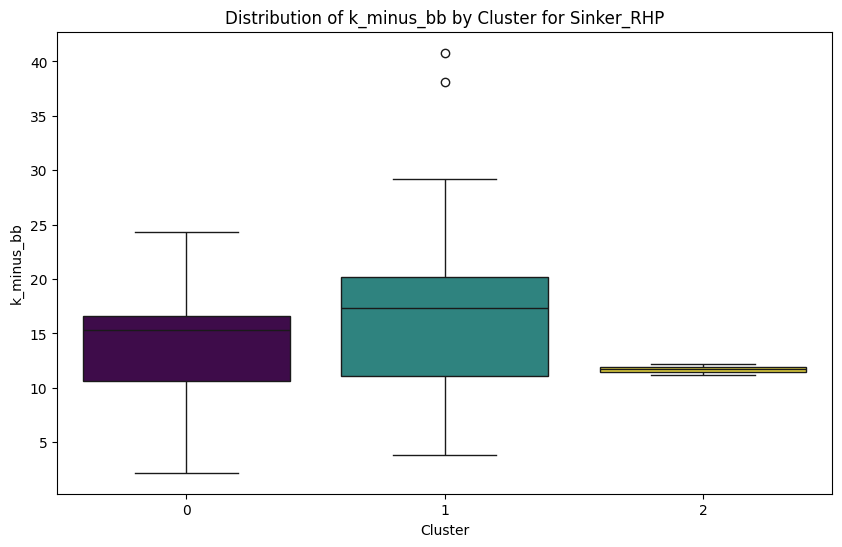

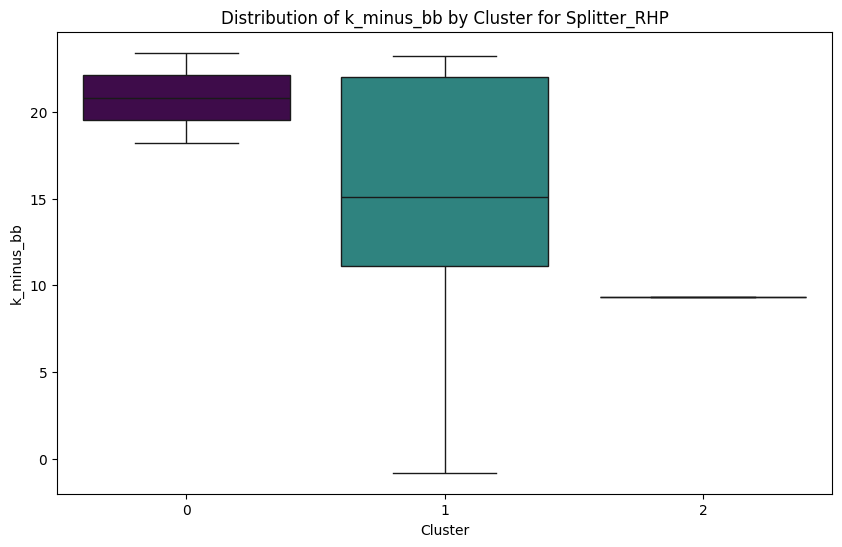

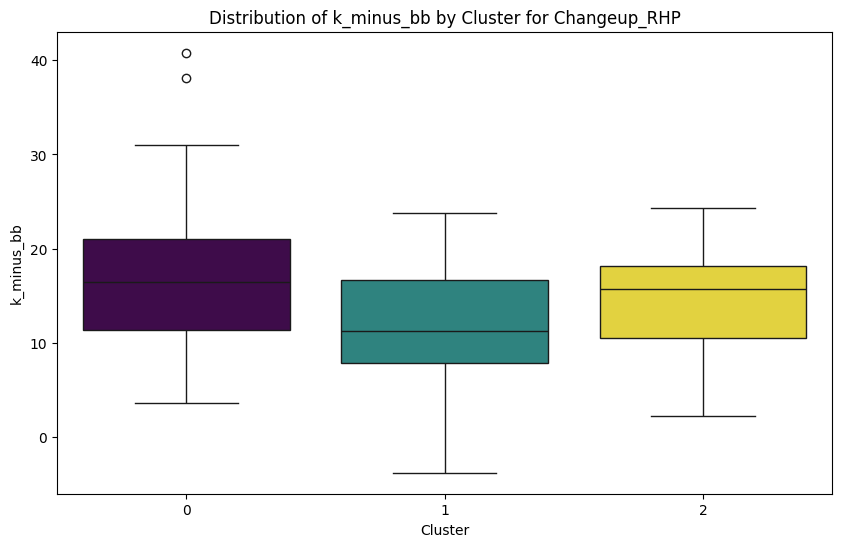

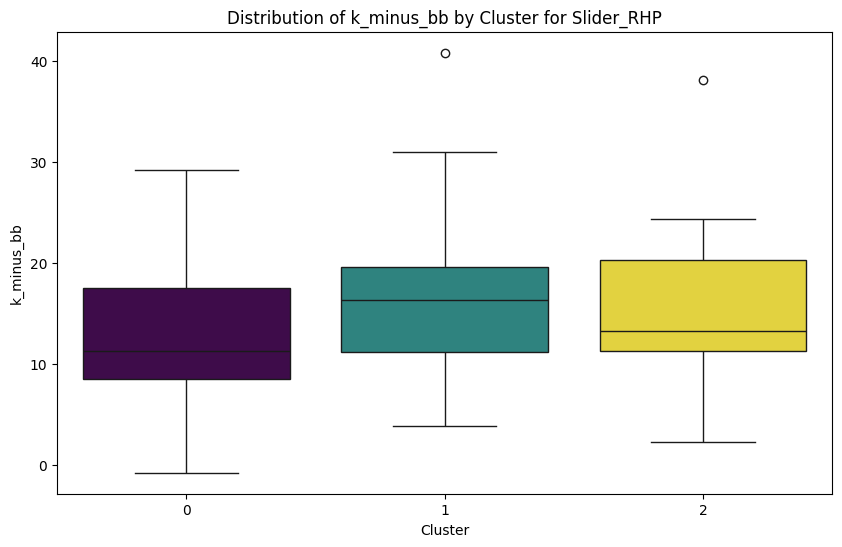

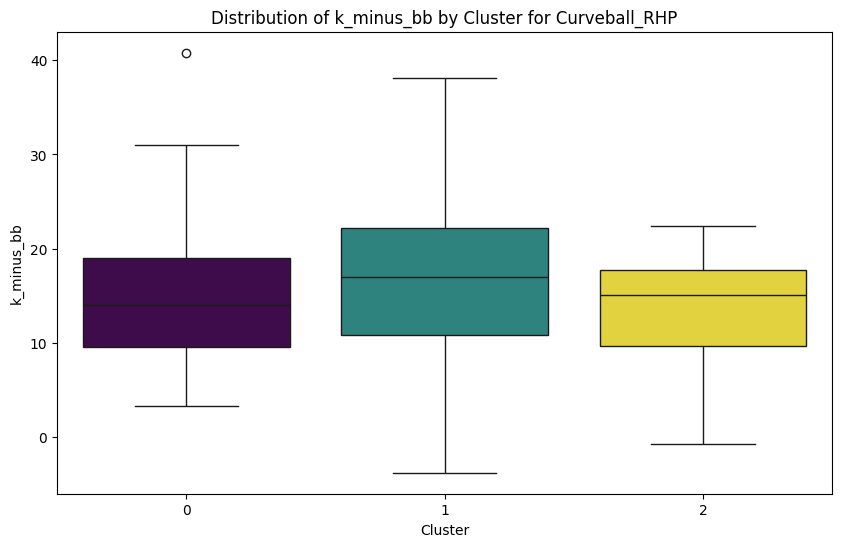

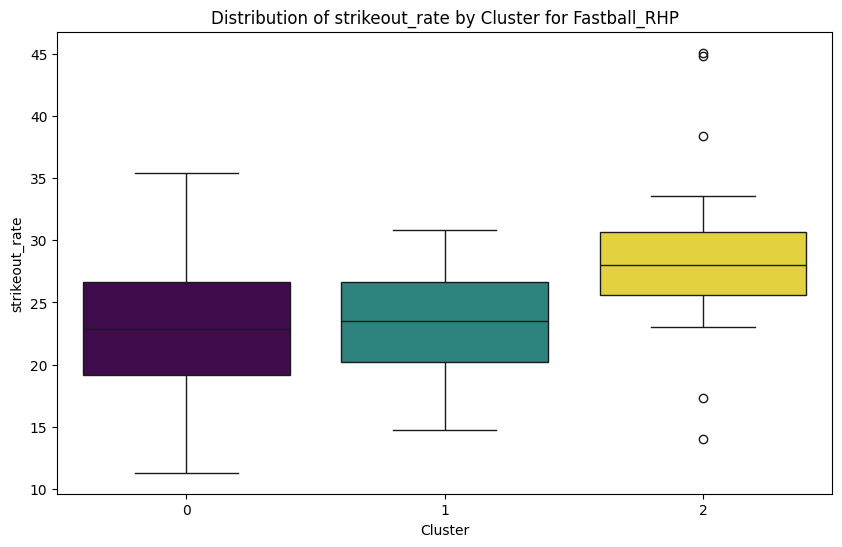

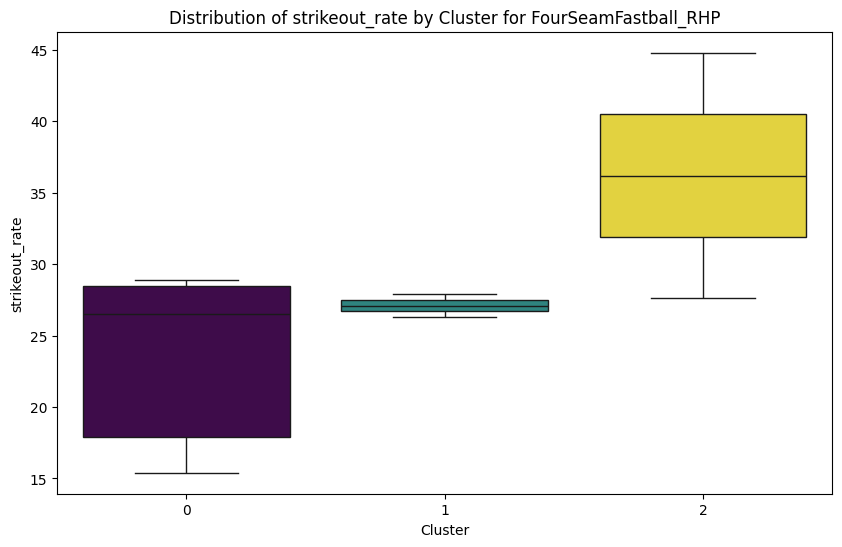

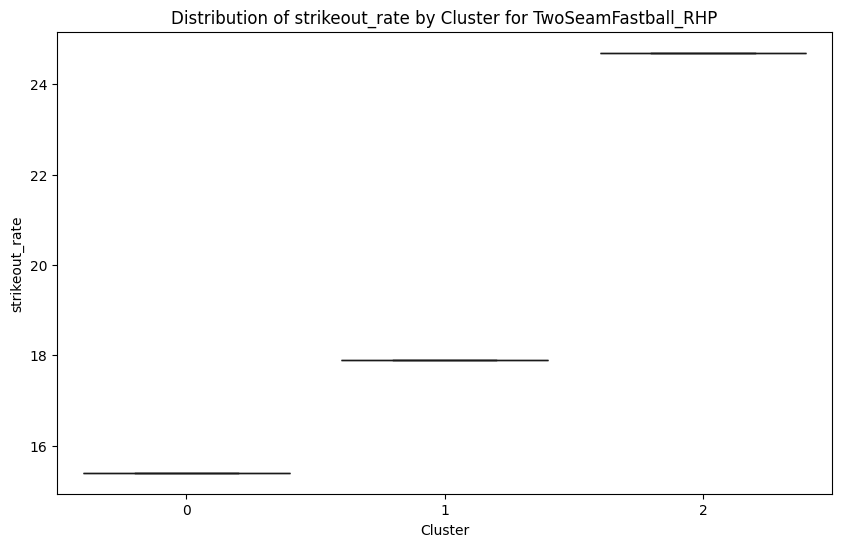

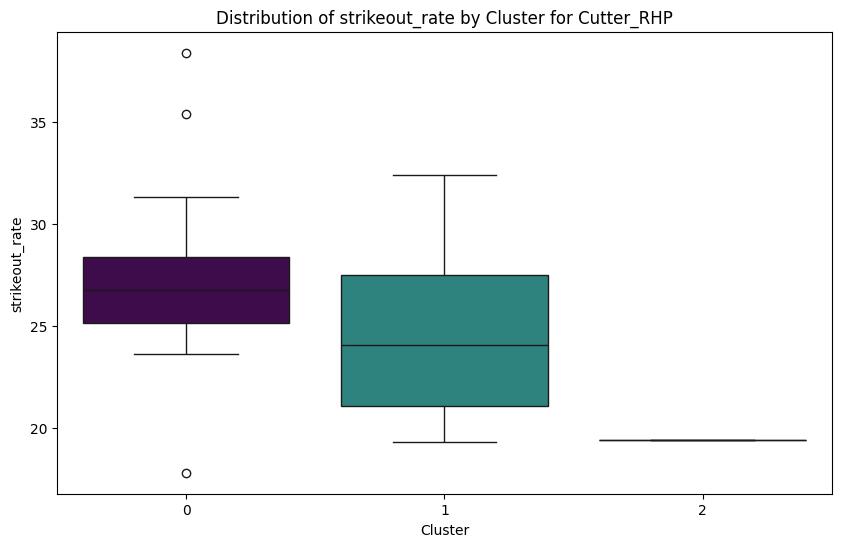

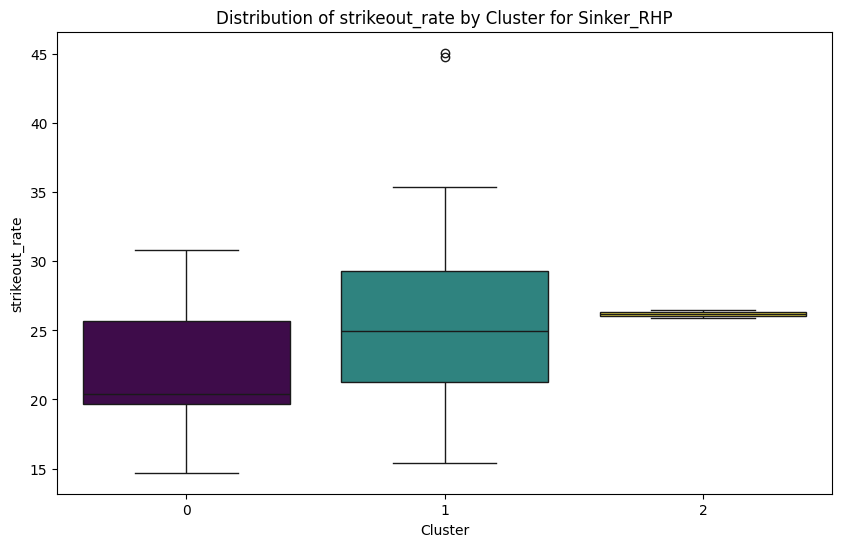

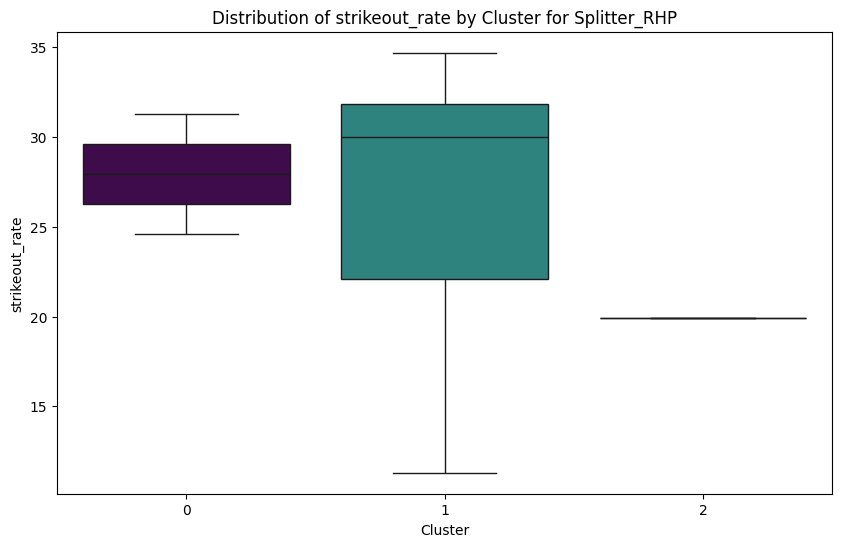

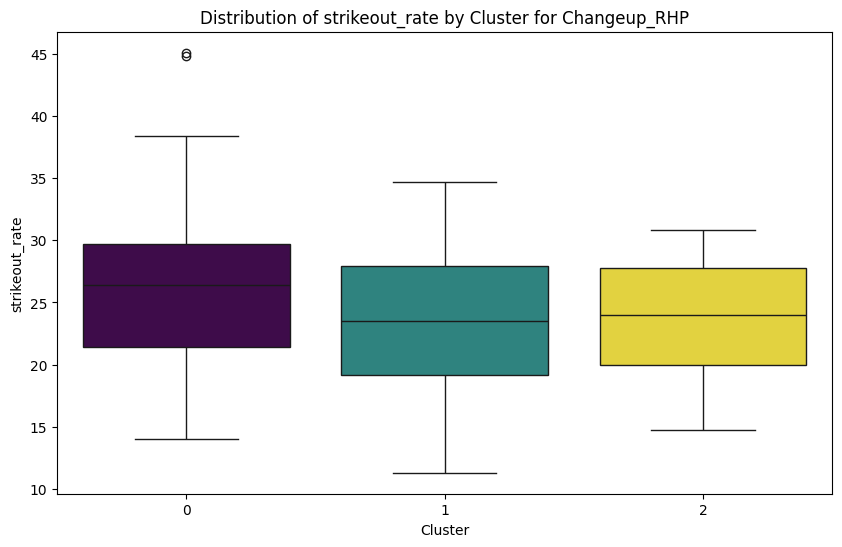

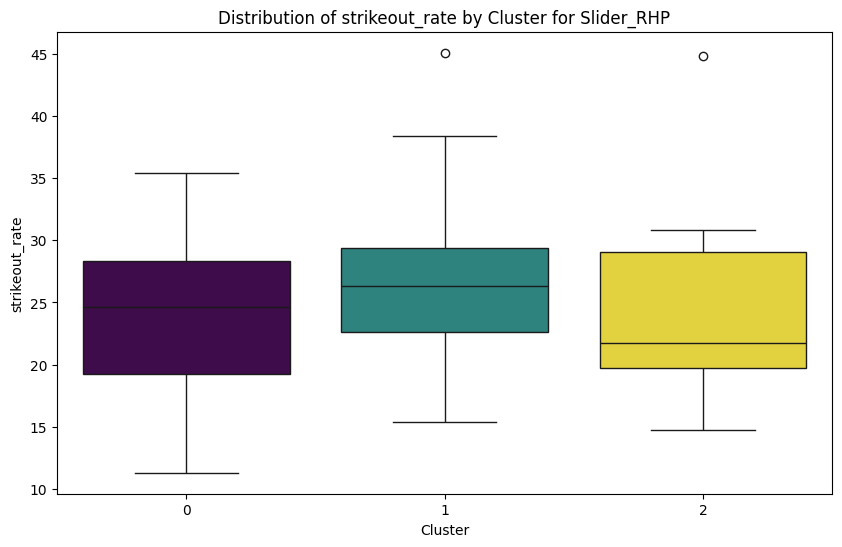

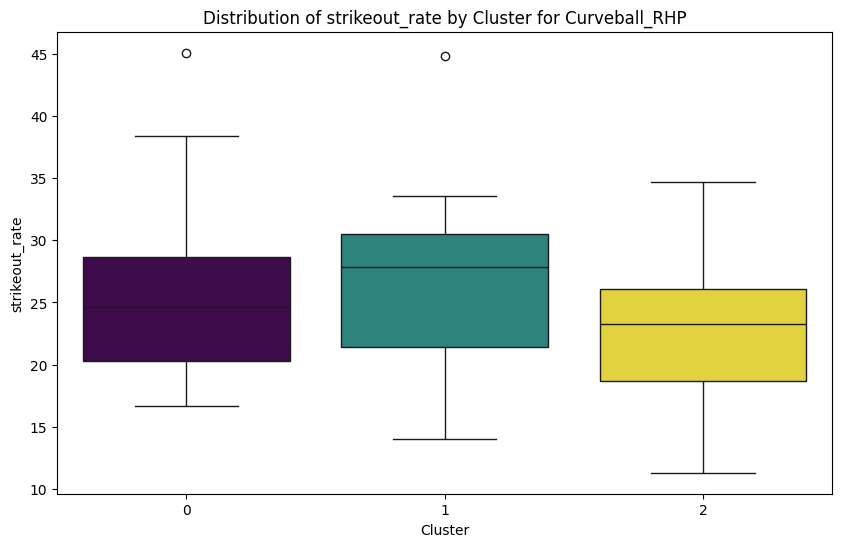

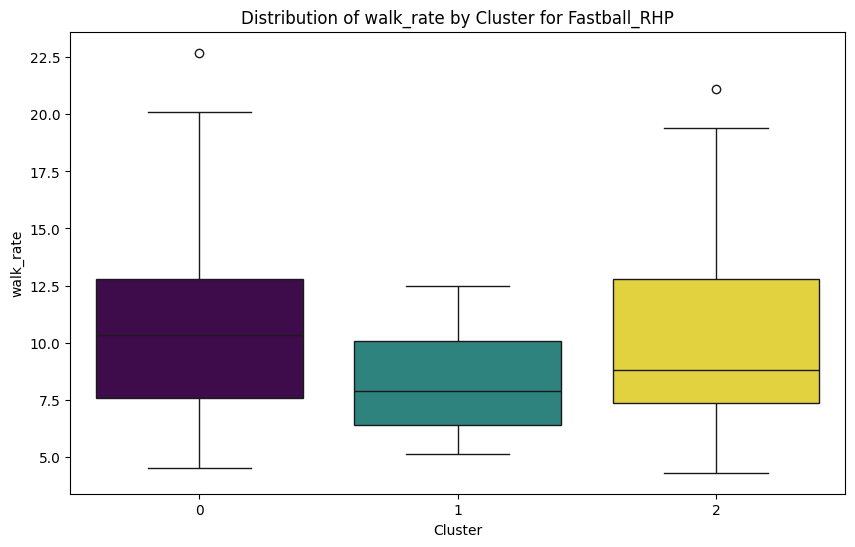

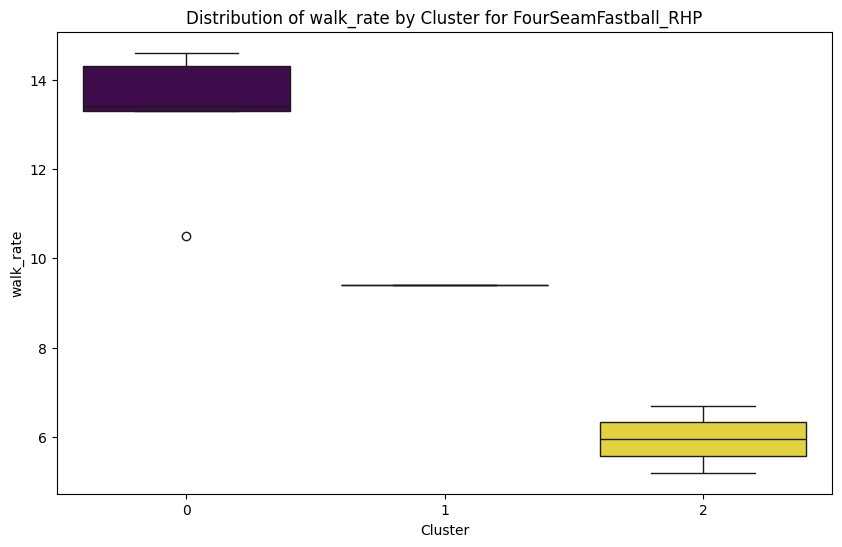

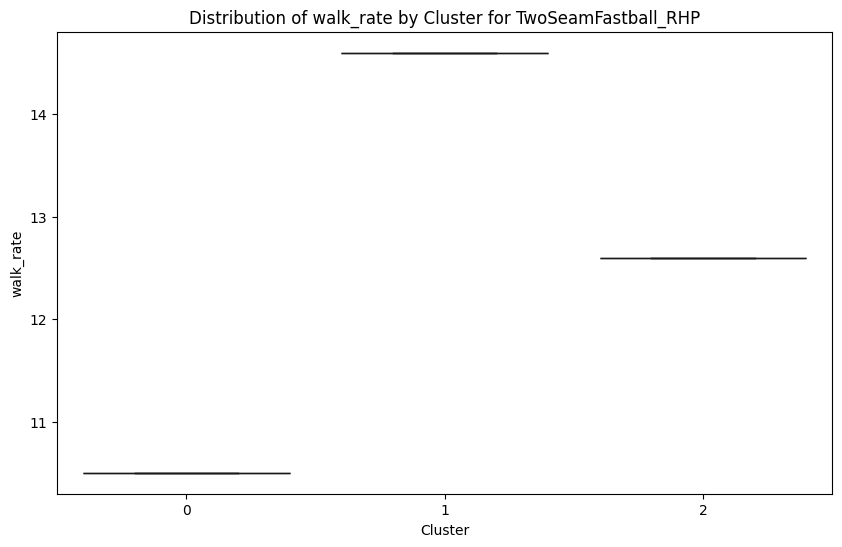

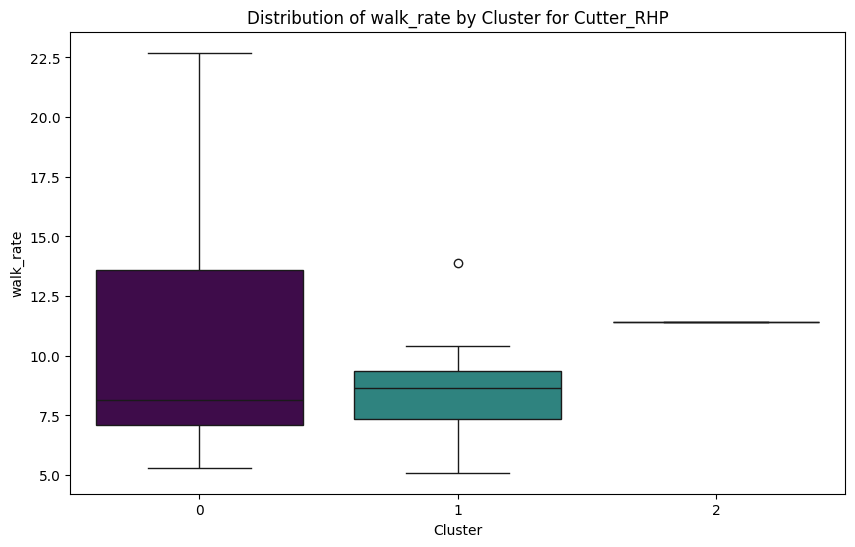

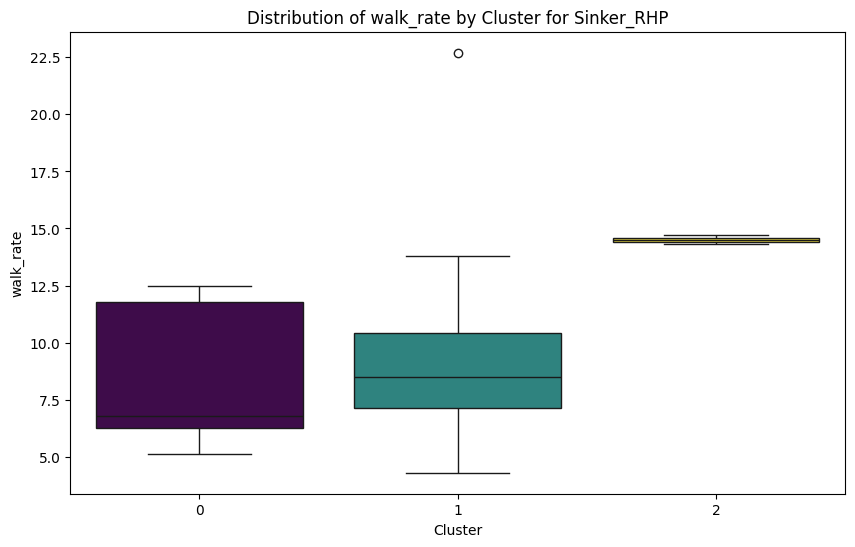

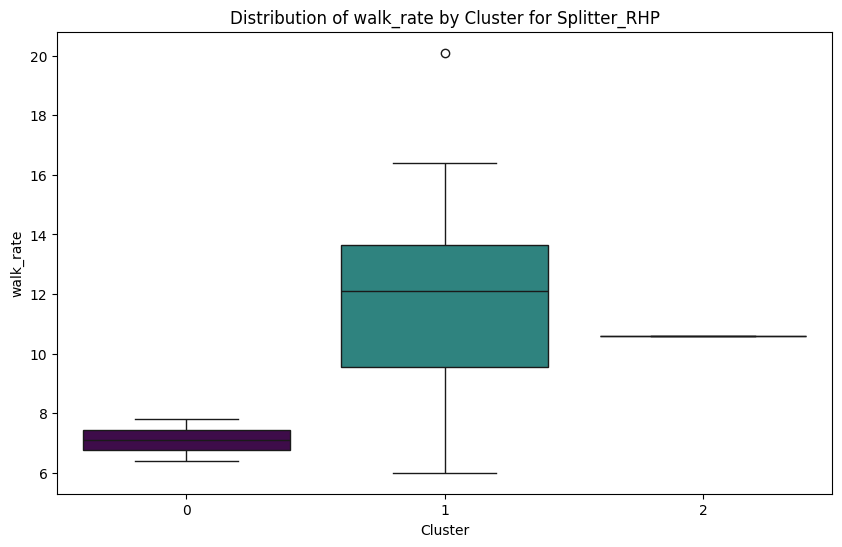

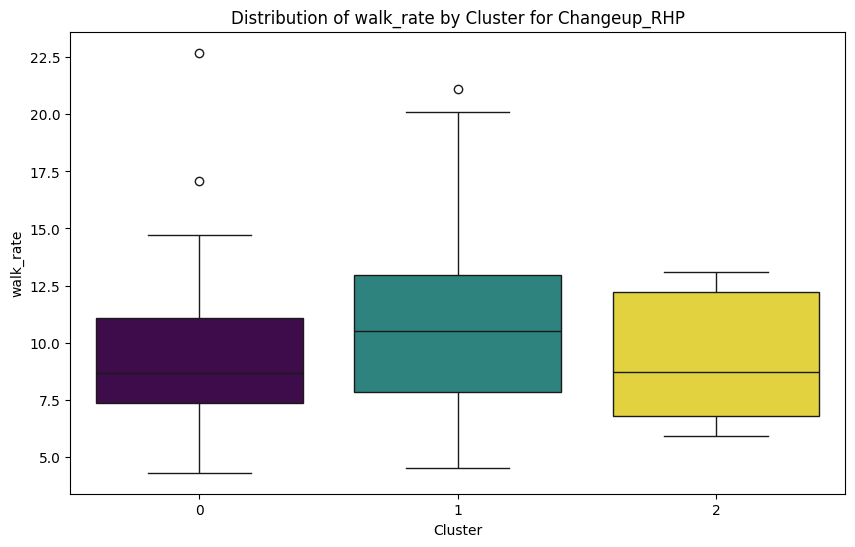

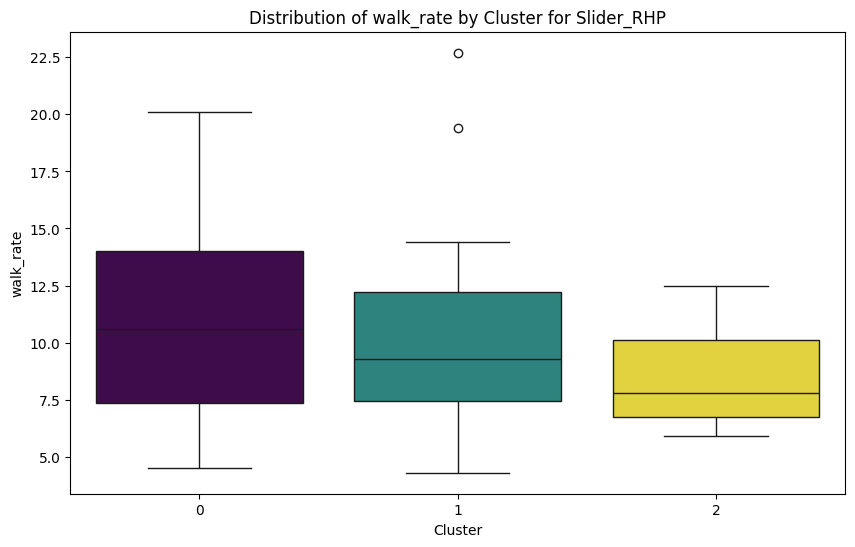

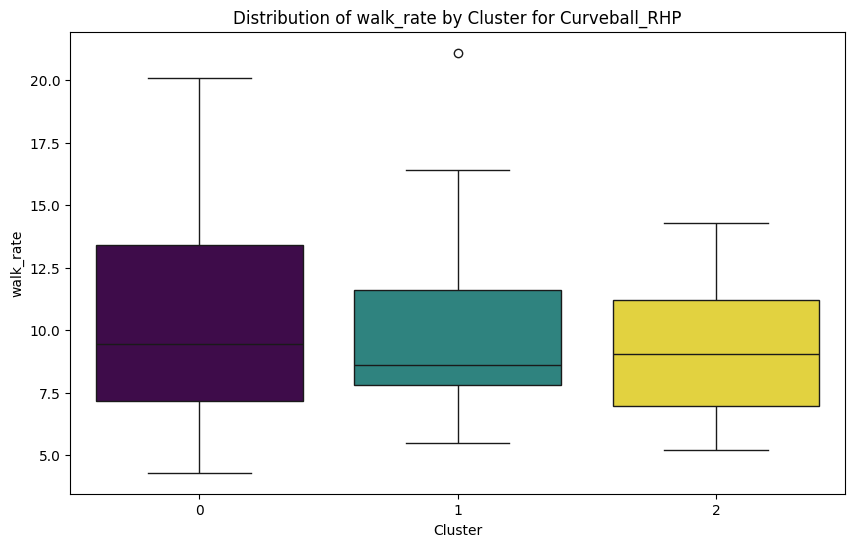

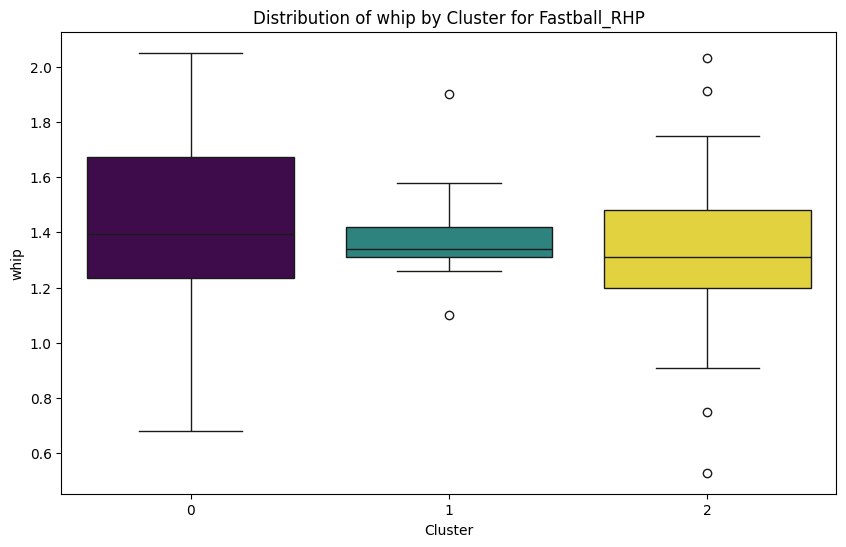

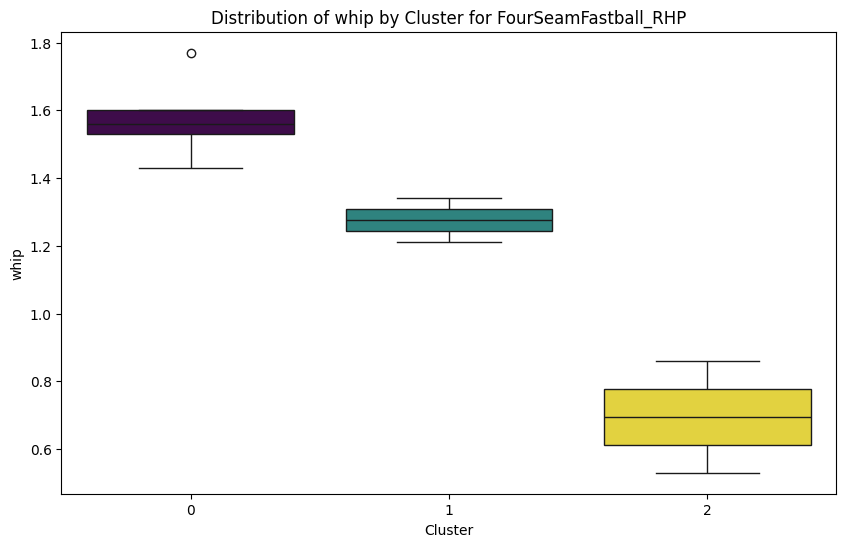

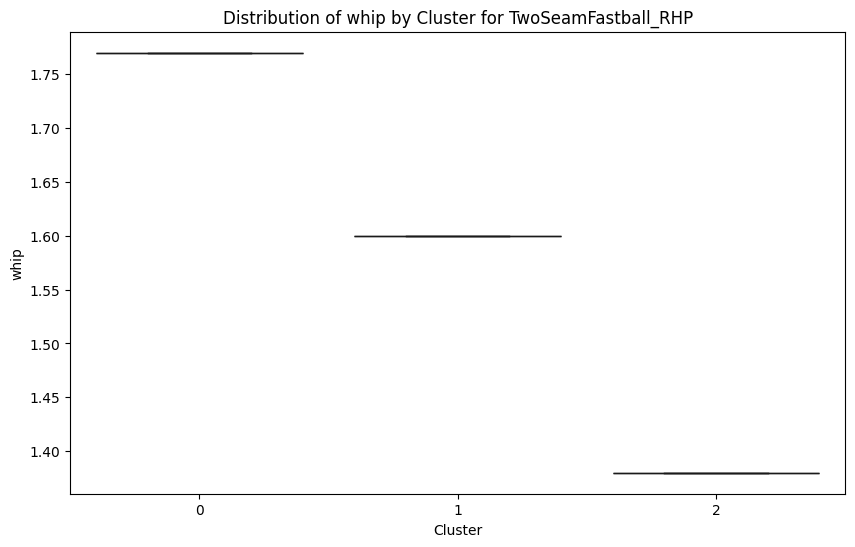

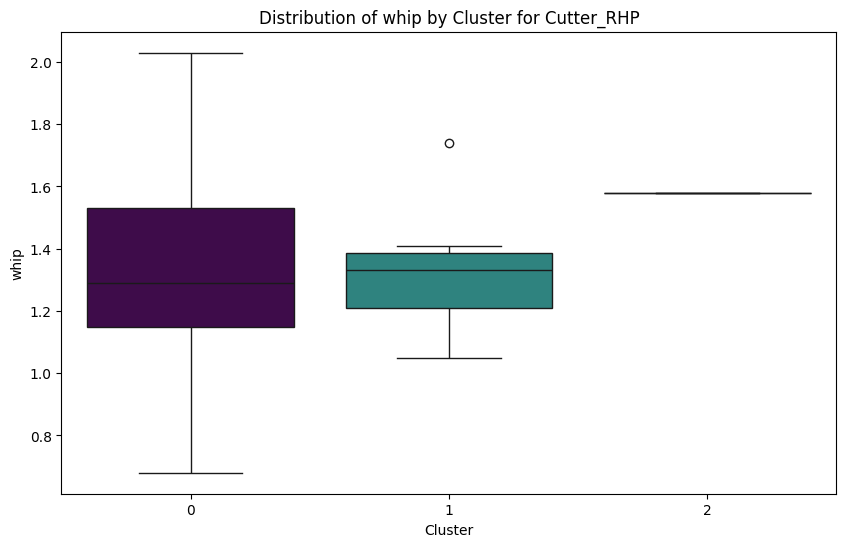

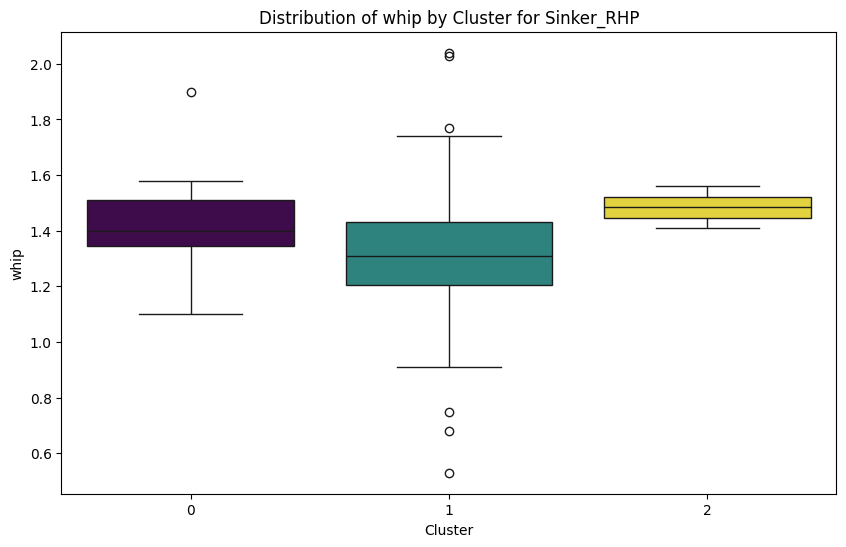

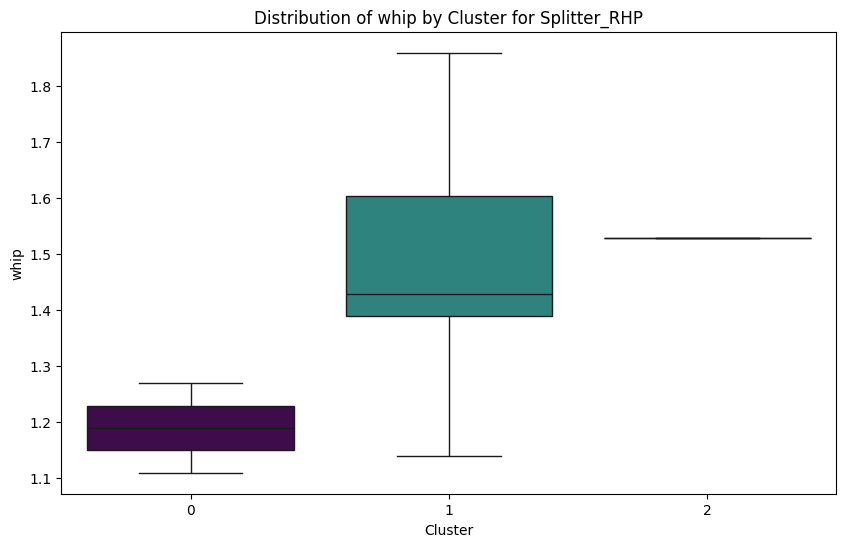

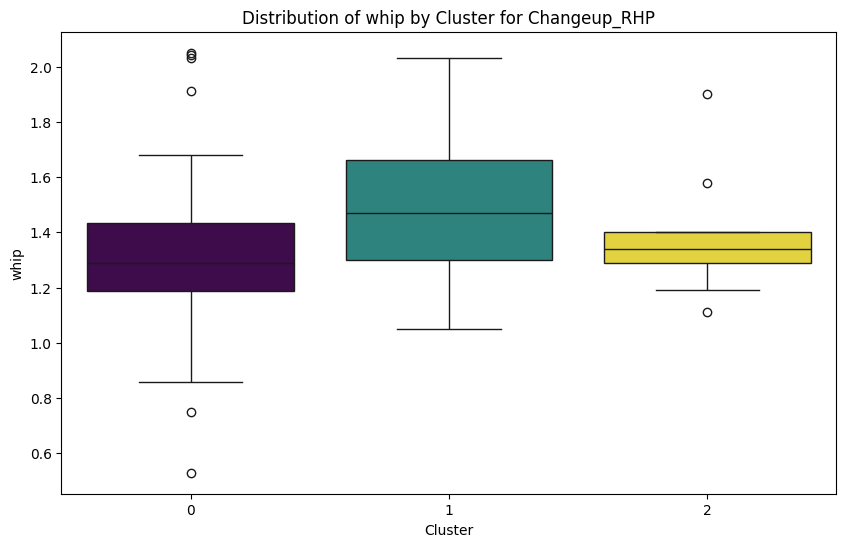

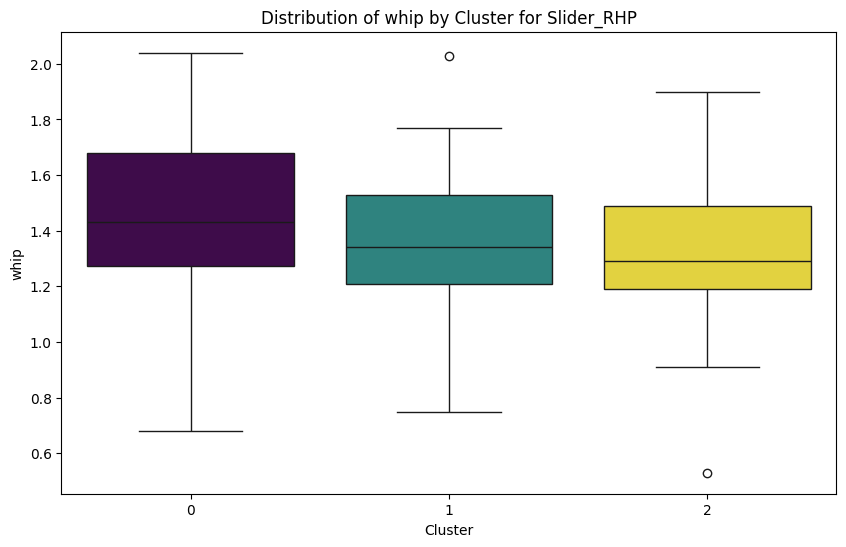

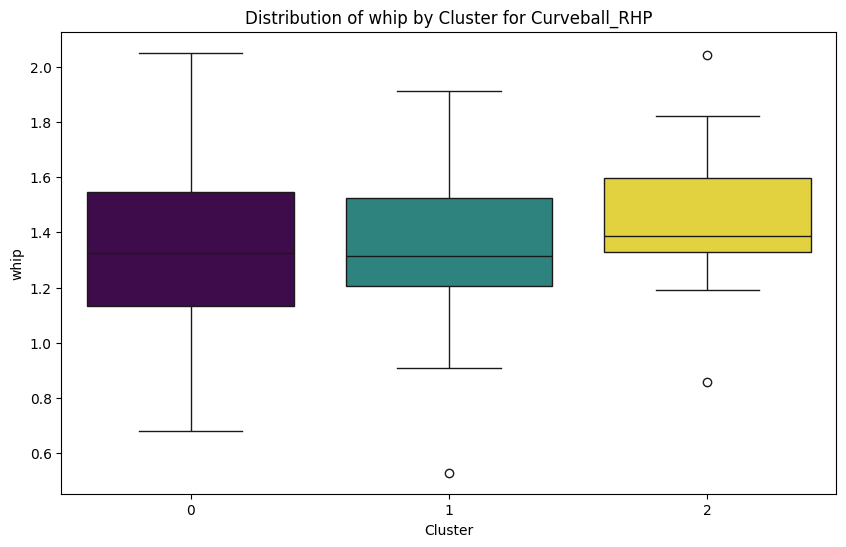

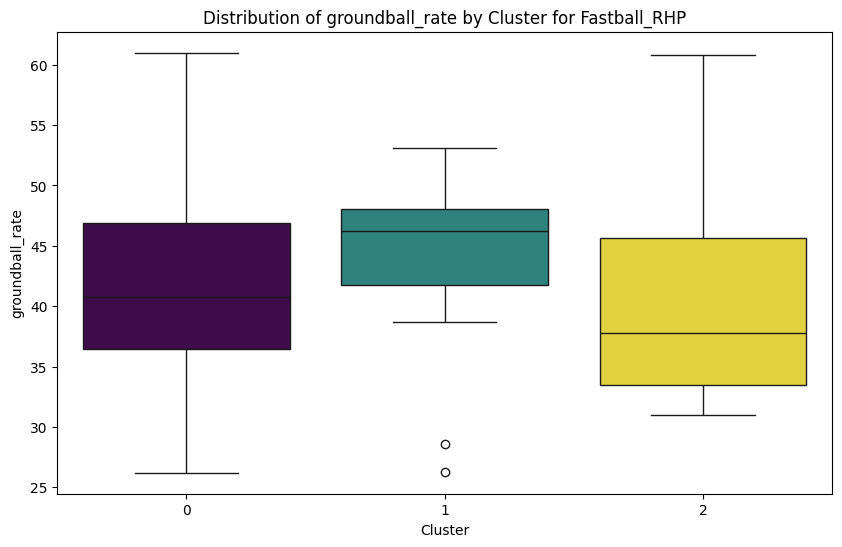

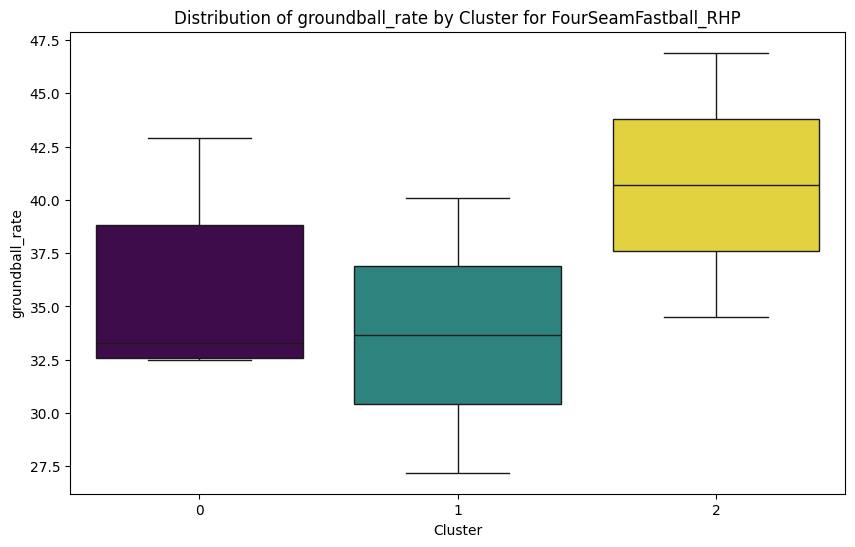

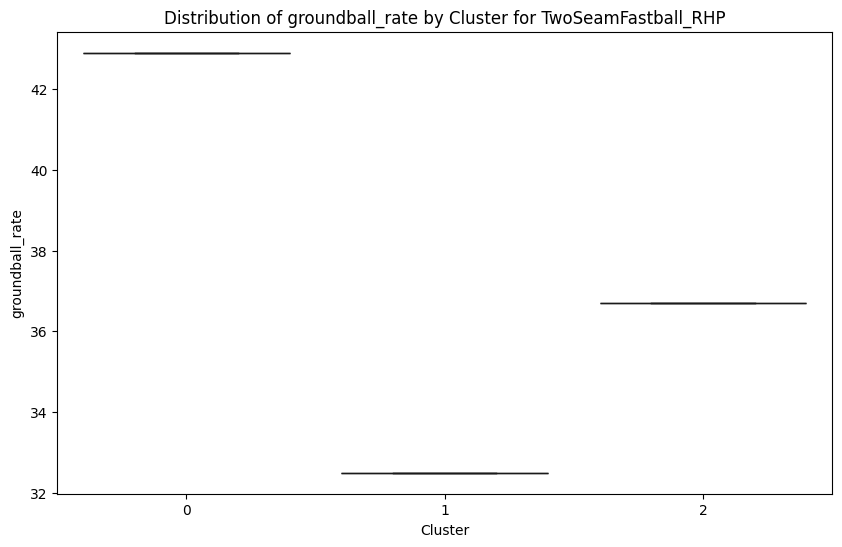

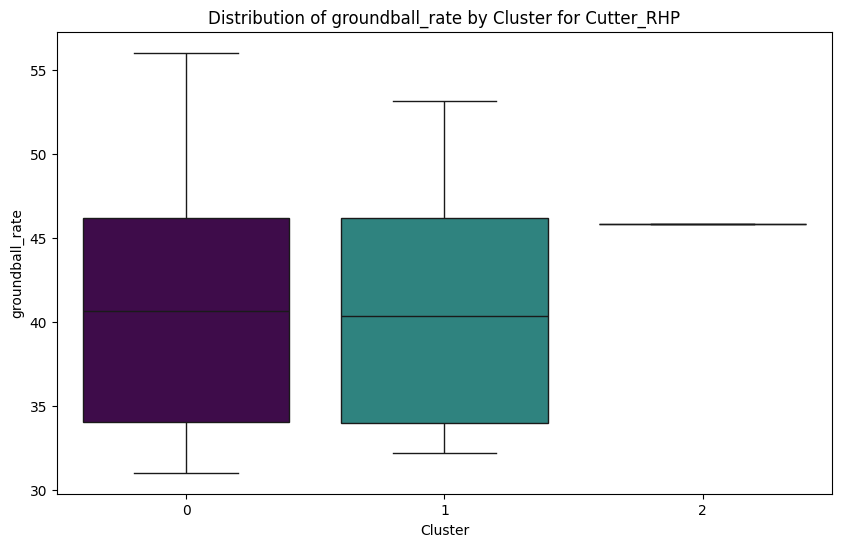

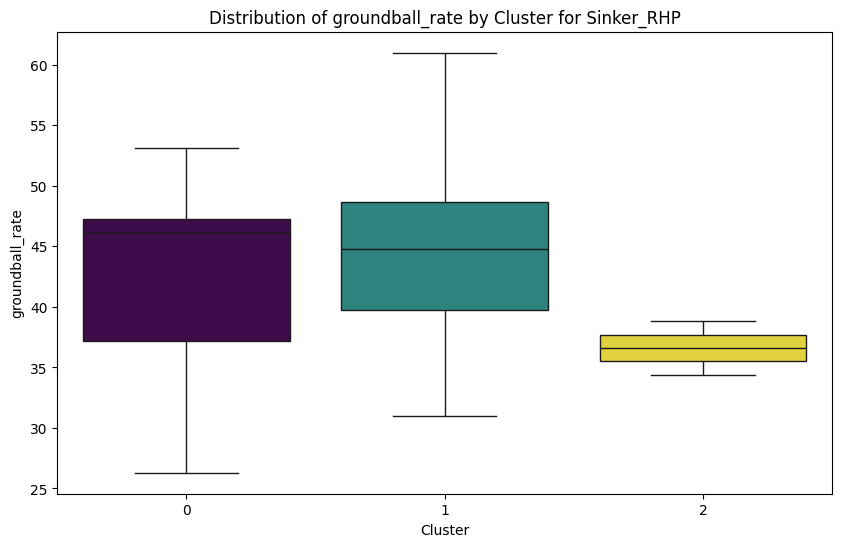

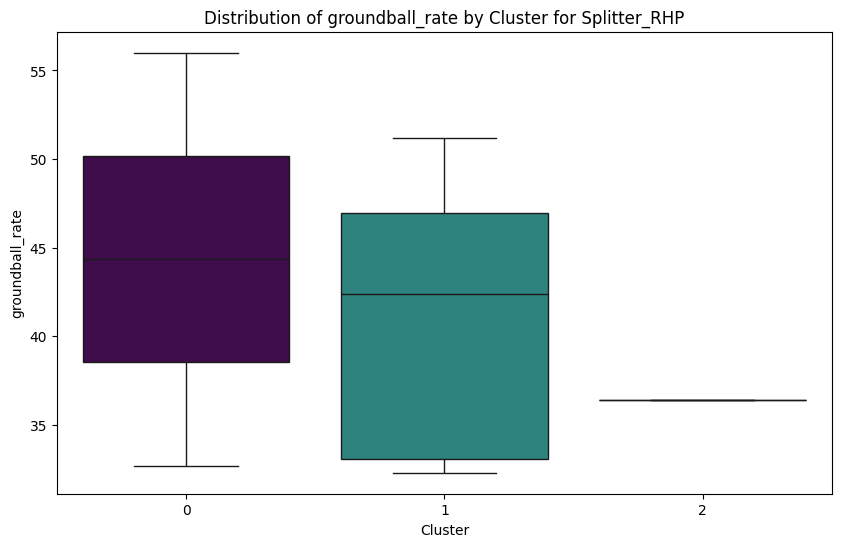

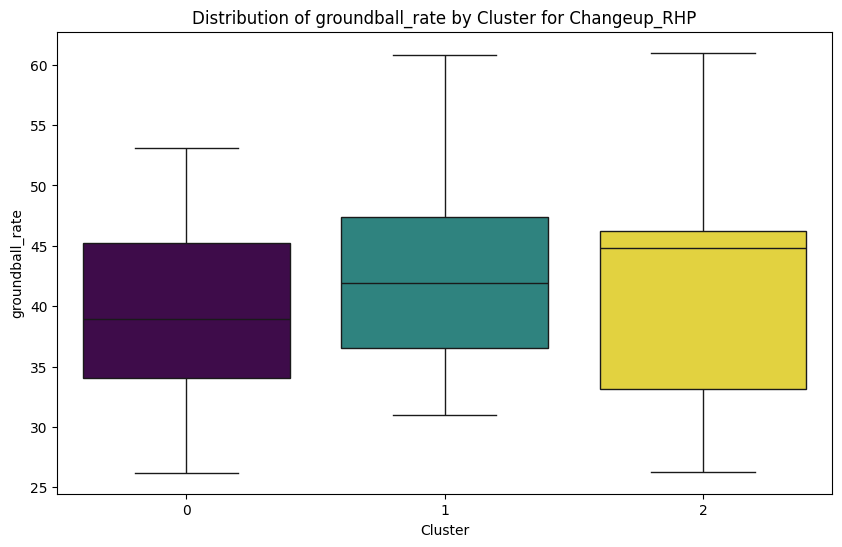

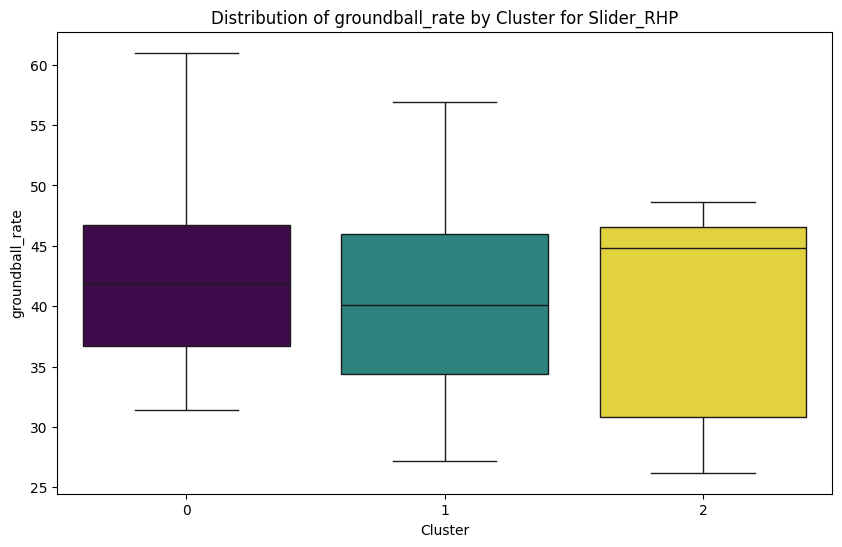

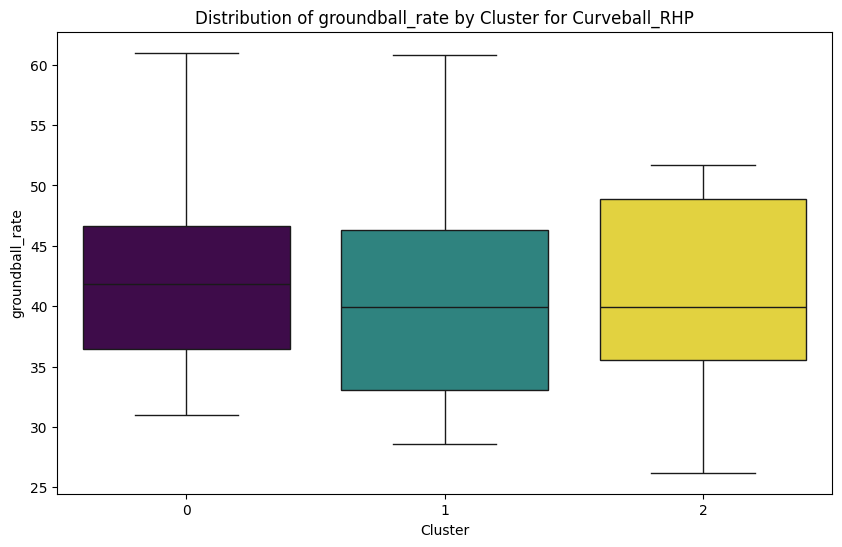

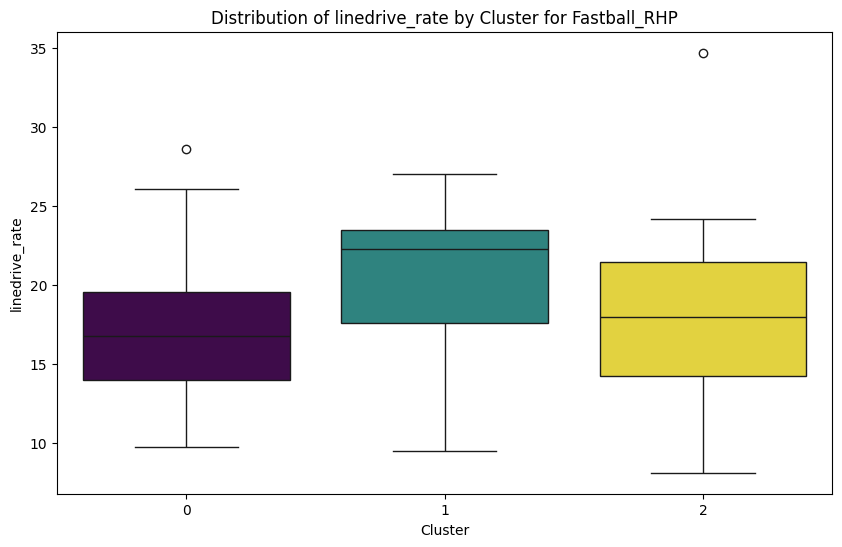

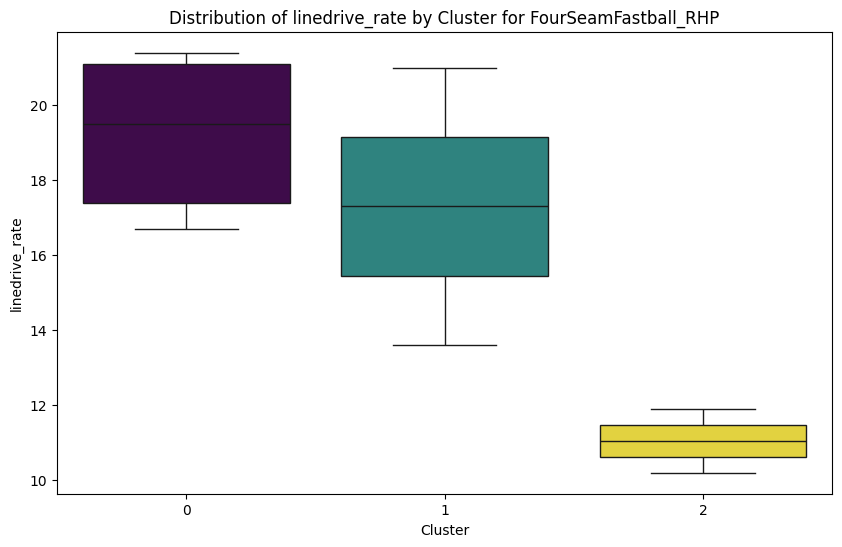

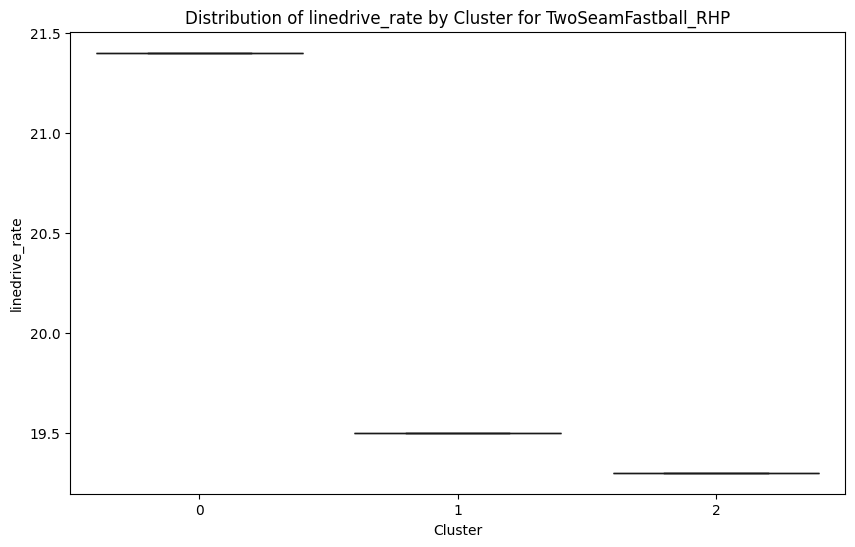

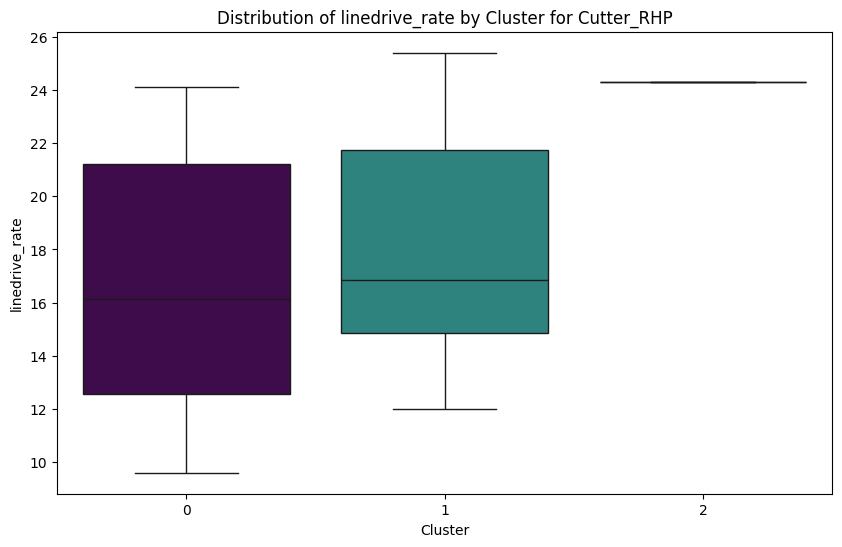

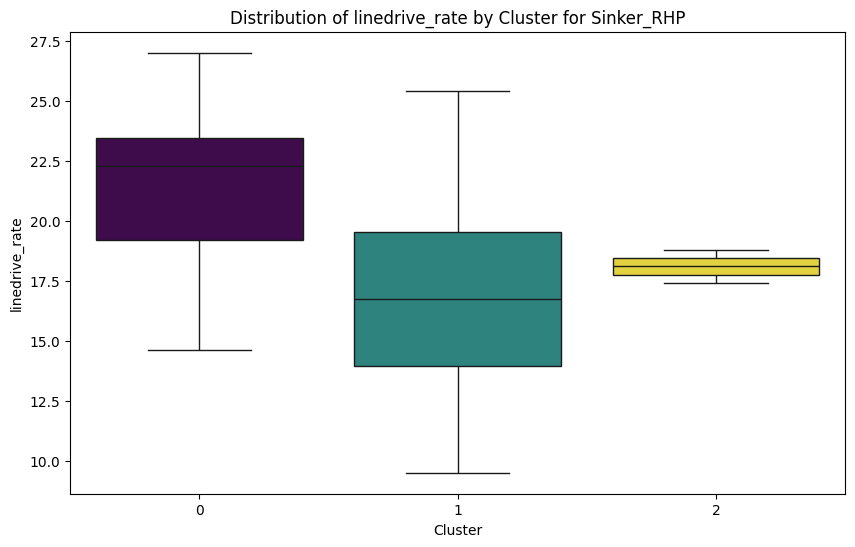

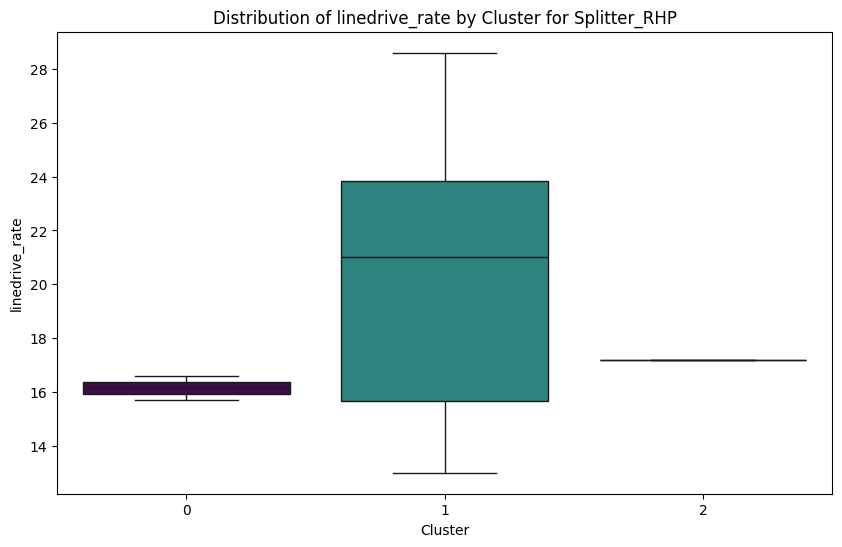

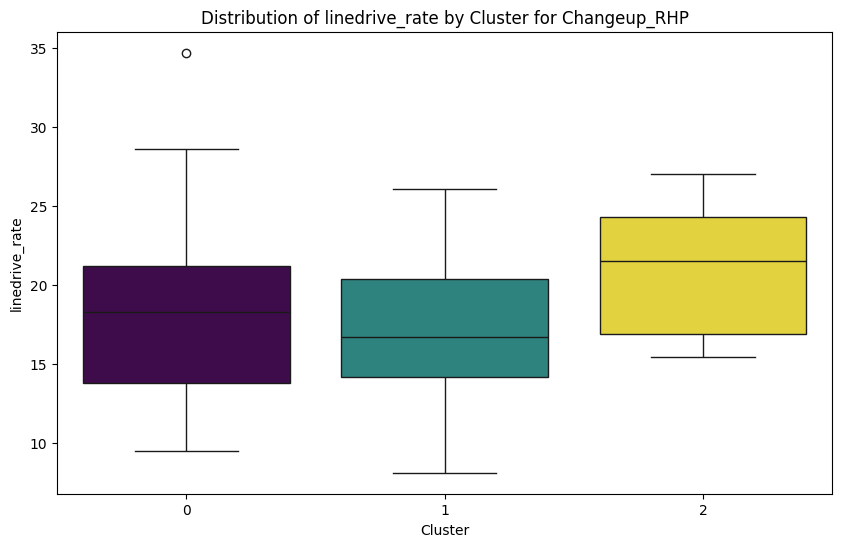

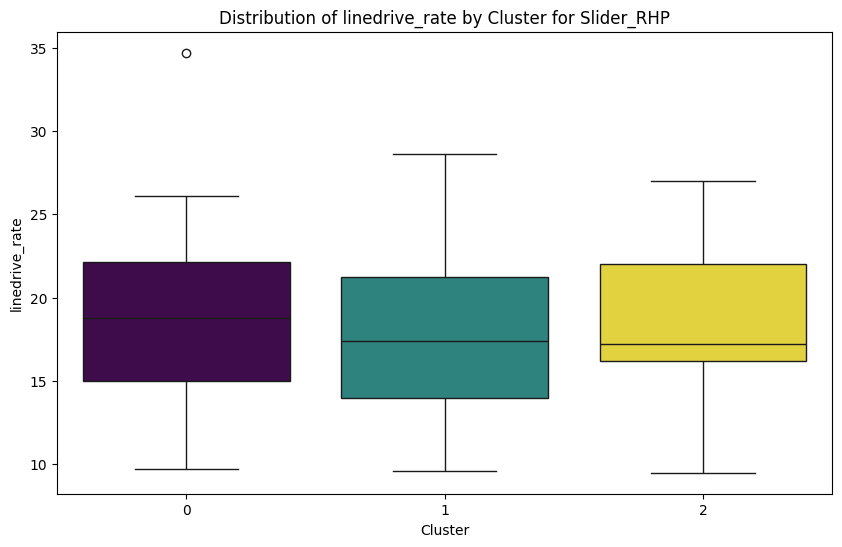

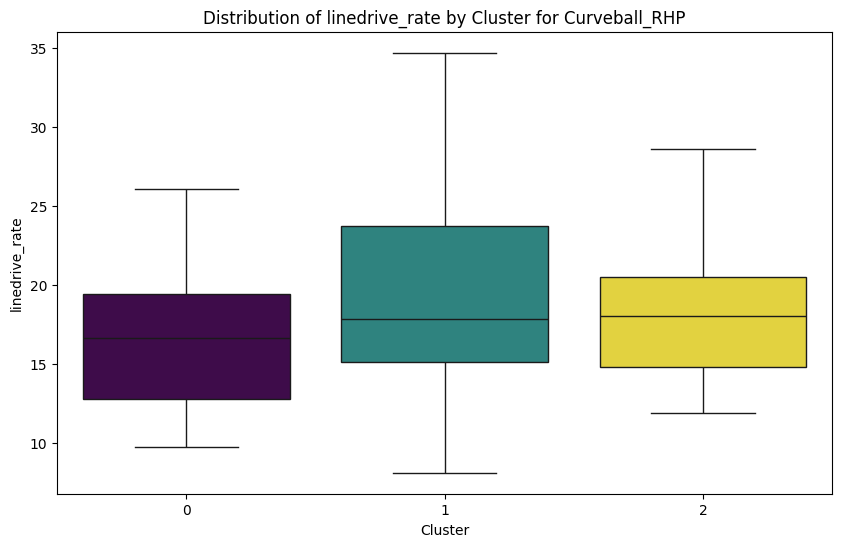

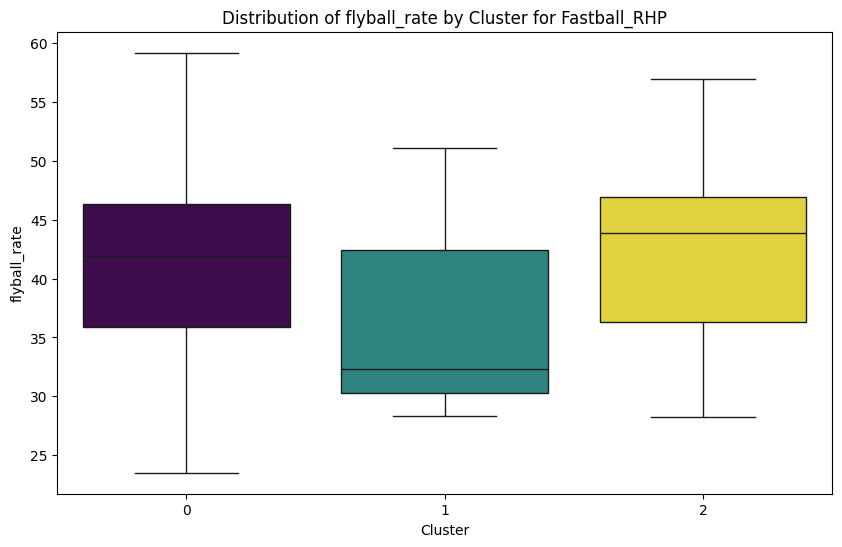

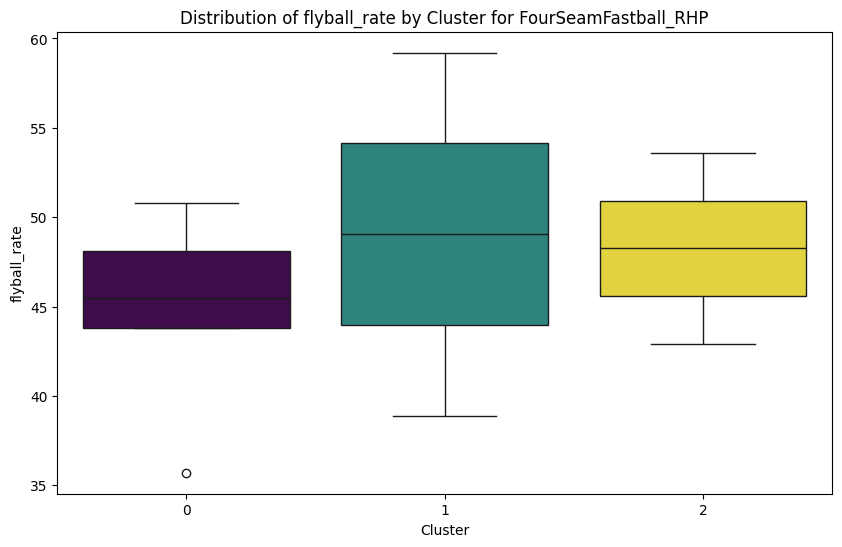

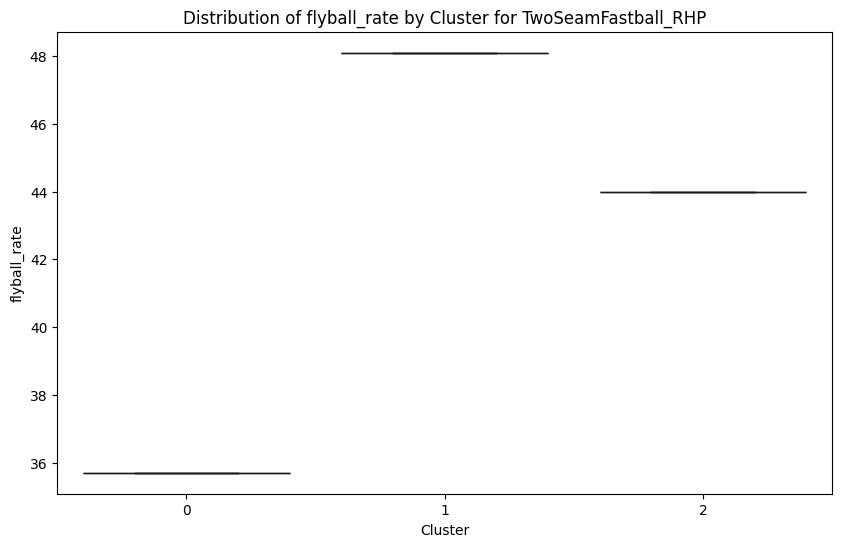

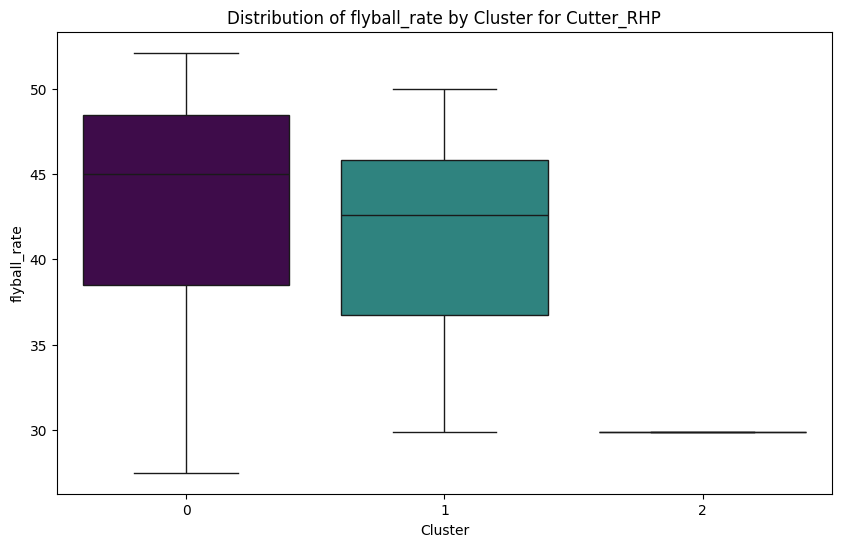

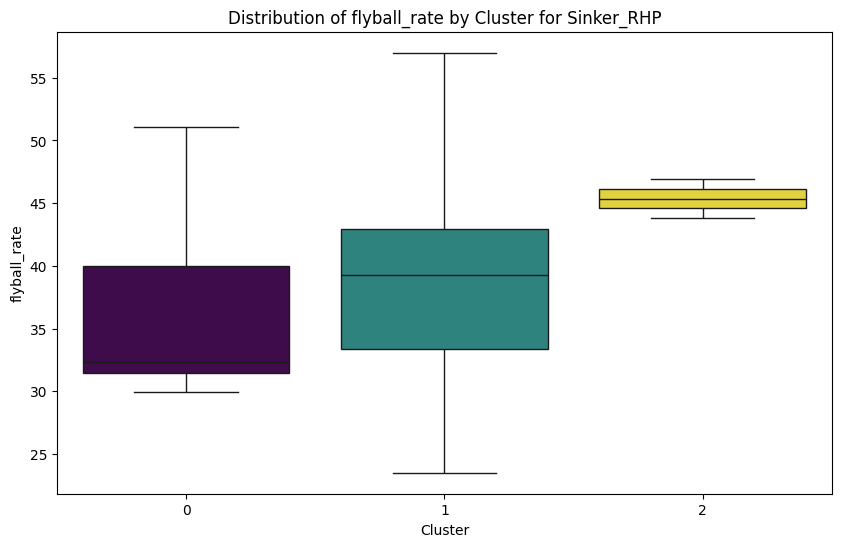

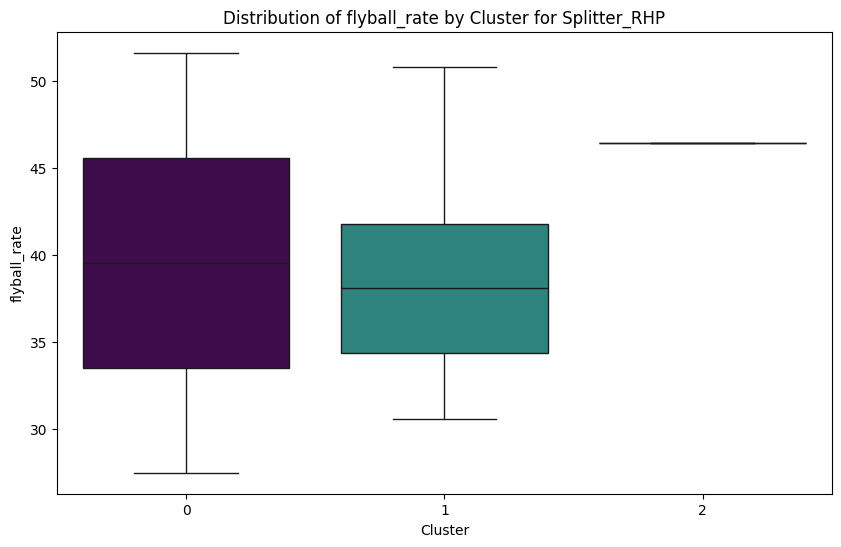

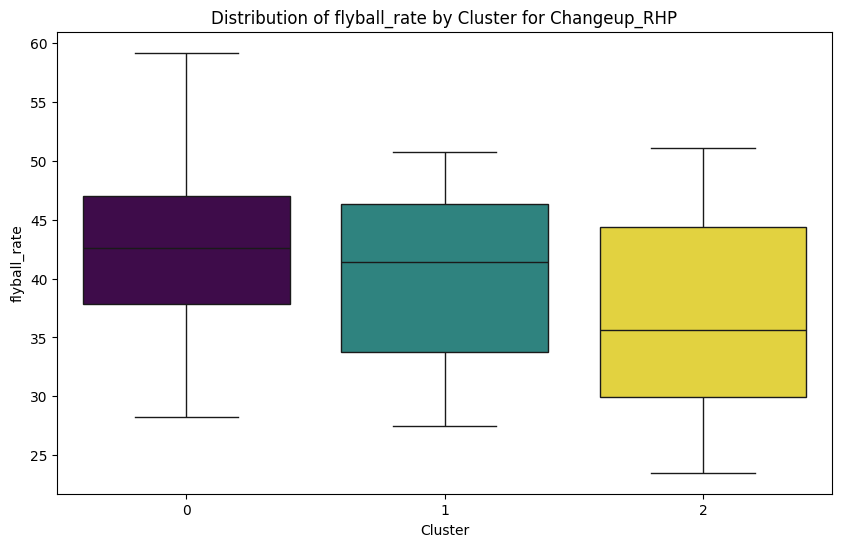

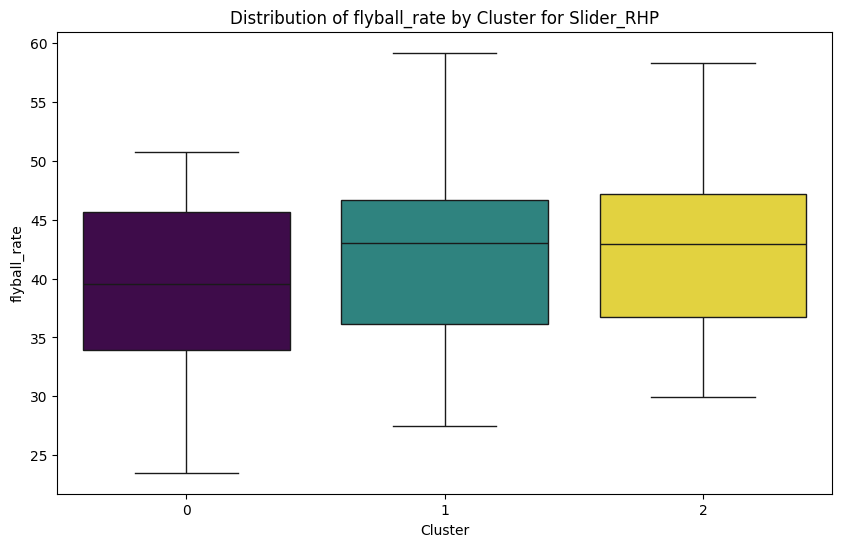

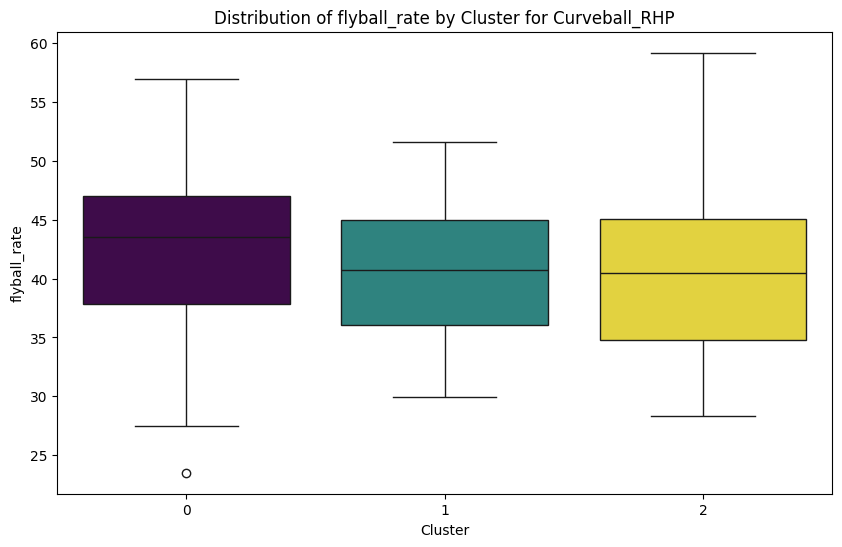

In [ ]:
performance_metrics = ['siera', 'era', 'fip', 'k_minus_bb', 'strikeout_rate', 'walk_rate', 'whip', 'groundball_rate', 'linedrive_rate', 'flyball_rate']

# Iterate over each performance metric
for metric in performance_metrics:
    # Iterate over RHP clusters
    for pitch_type, features in selected_features_RHP.items():
        X = merged_RHP_stats[pitch_type][features]

        # Check if the dataframe size is greater than 0
        if X.shape[0] > 0:
            # Scale the features
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)

            # Perform K-means clustering
            kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
            cluster_labels = kmeans.fit_predict(X_scaled)

            # Visualize the distribution of the performance metric within each cluster
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=cluster_labels, y=merged_RHP_stats[pitch_type][metric], hue=cluster_labels, legend=False, palette='viridis')
            plt.title(f'Distribution of {metric} by Cluster for {pitch_type}')
            plt.xlabel('Cluster')
            plt.ylabel(metric)
            plt.show()

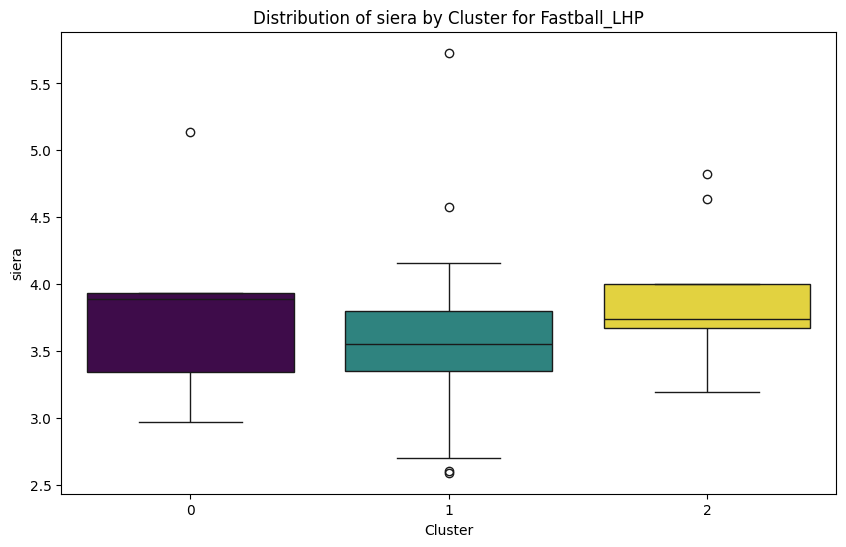

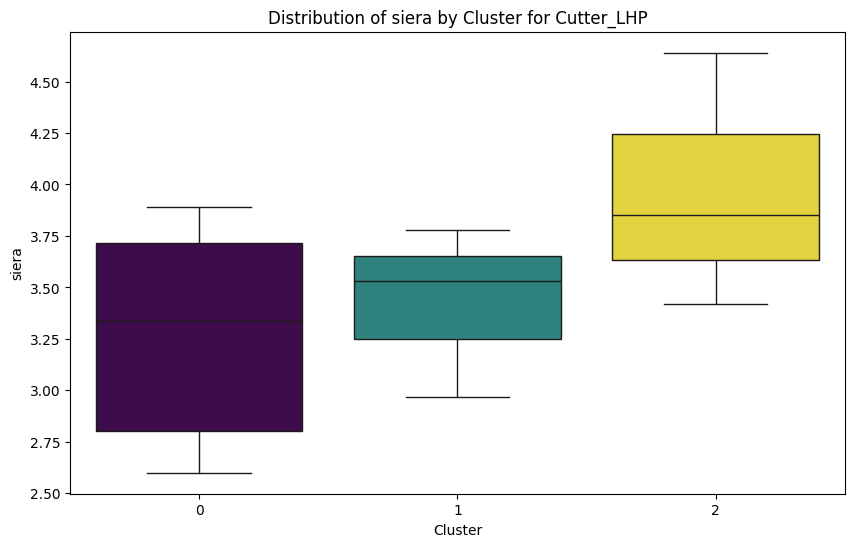

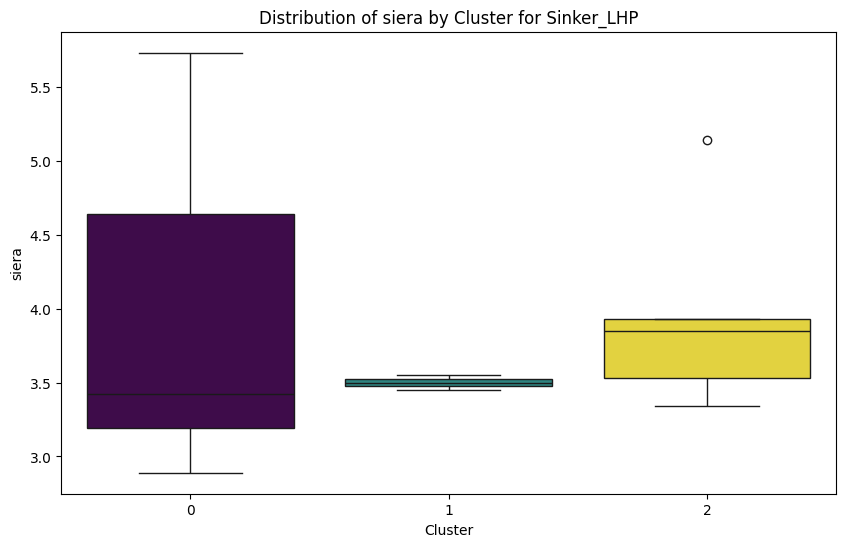

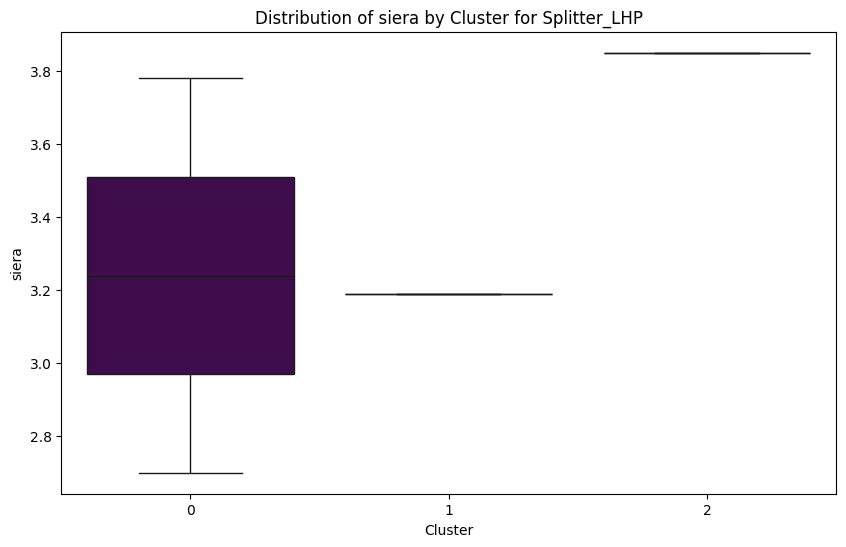

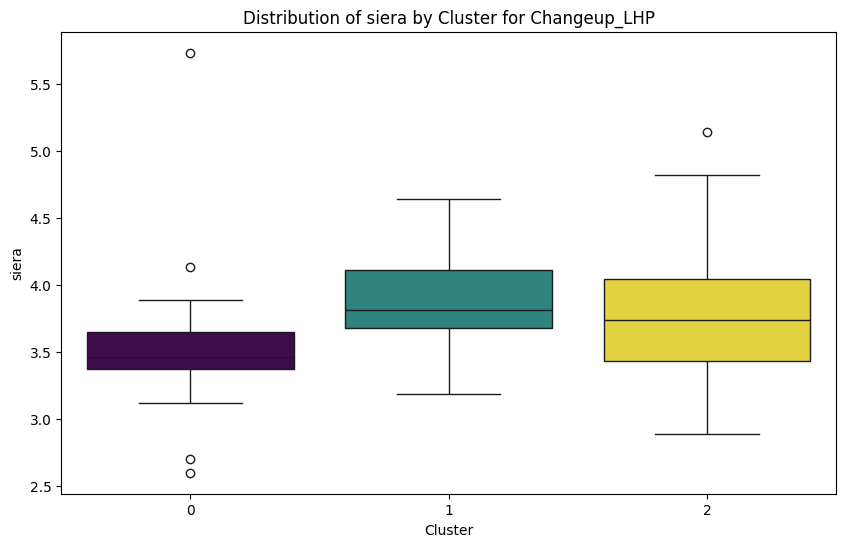

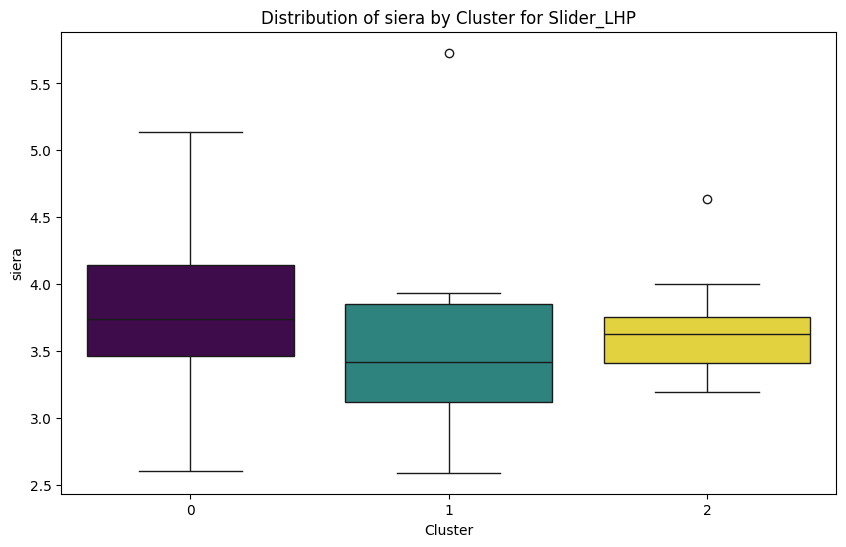

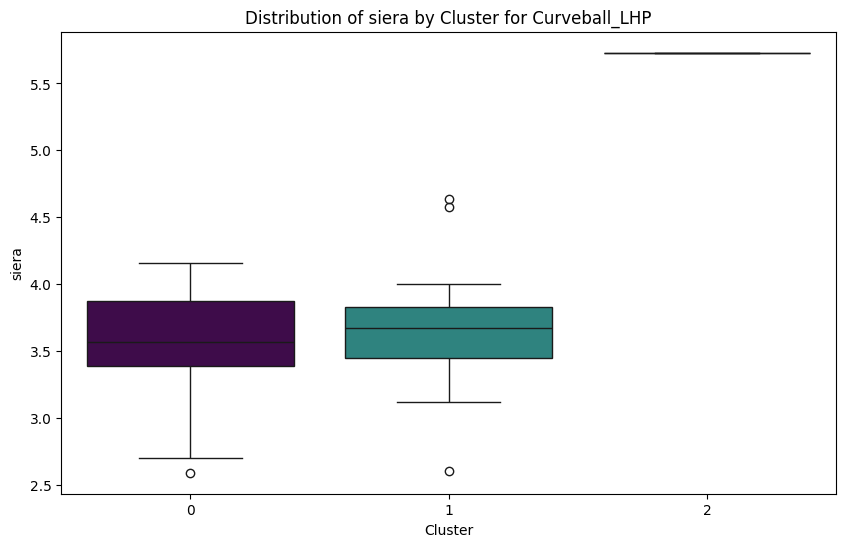

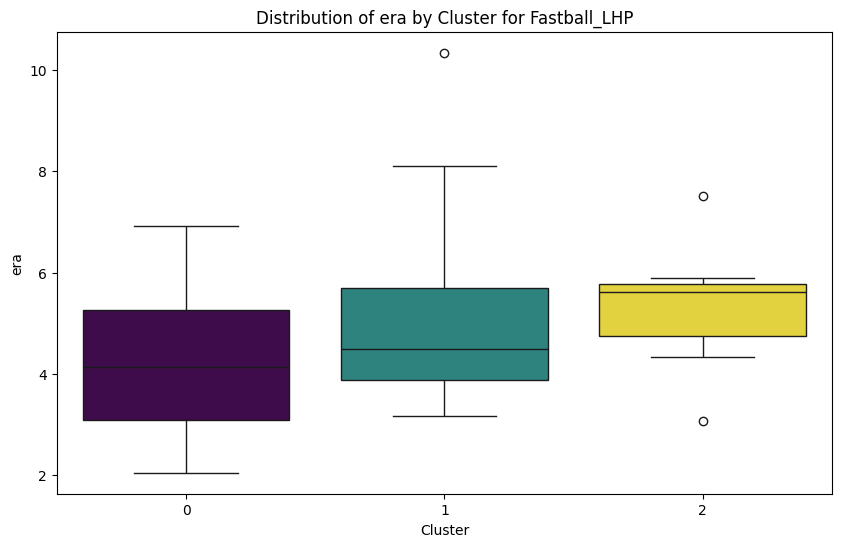

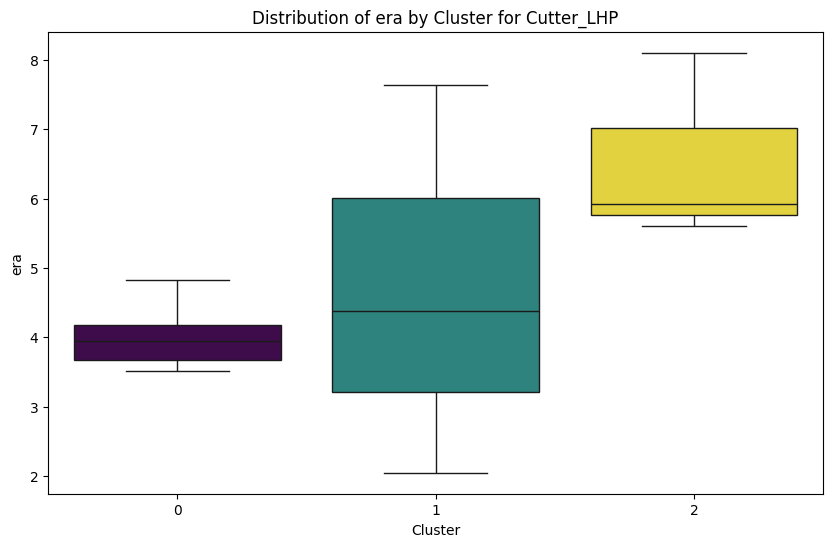

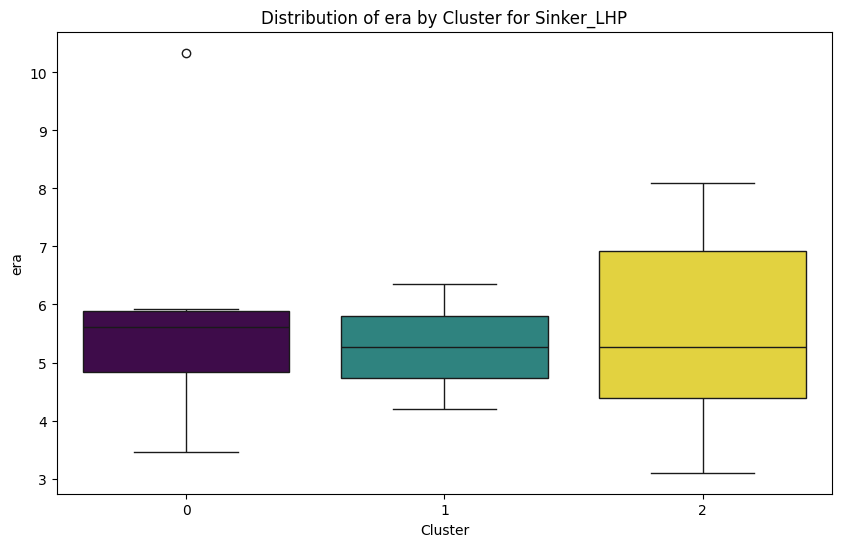

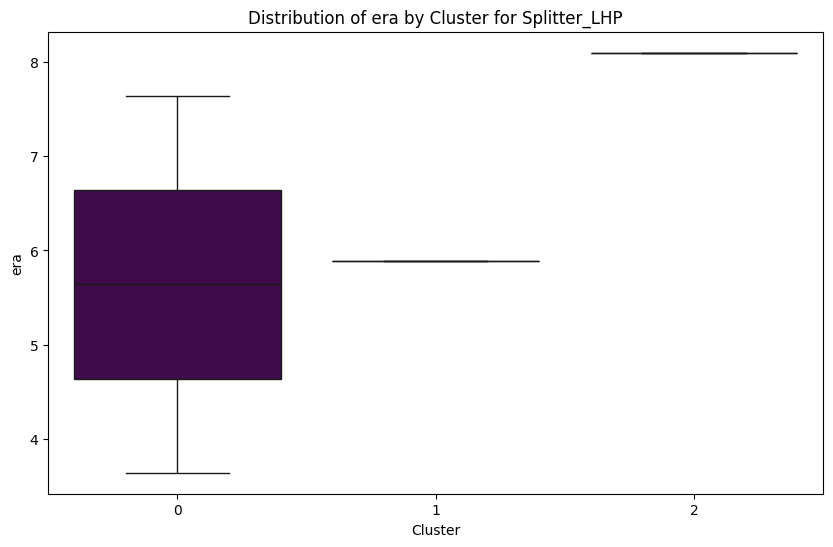

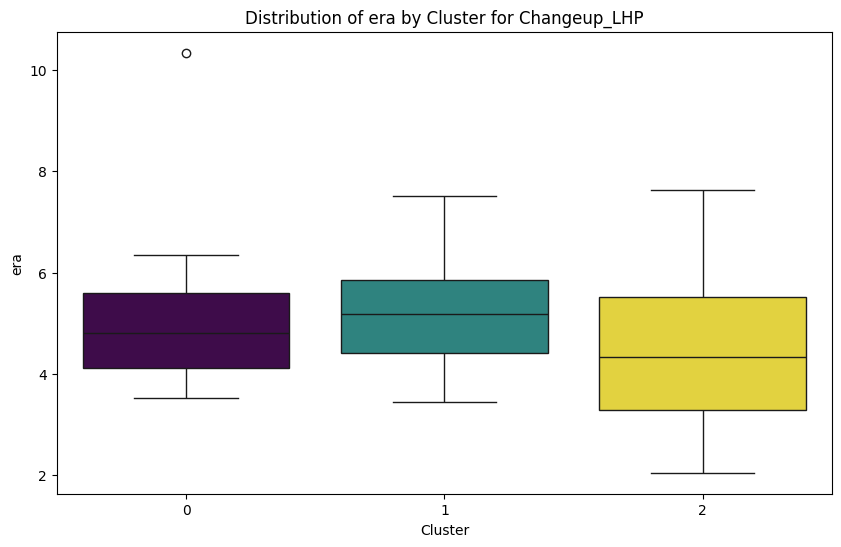

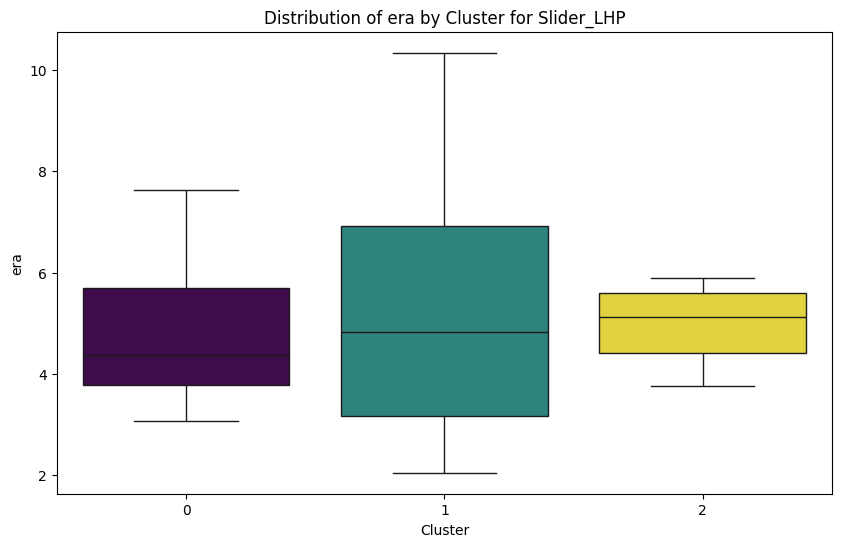

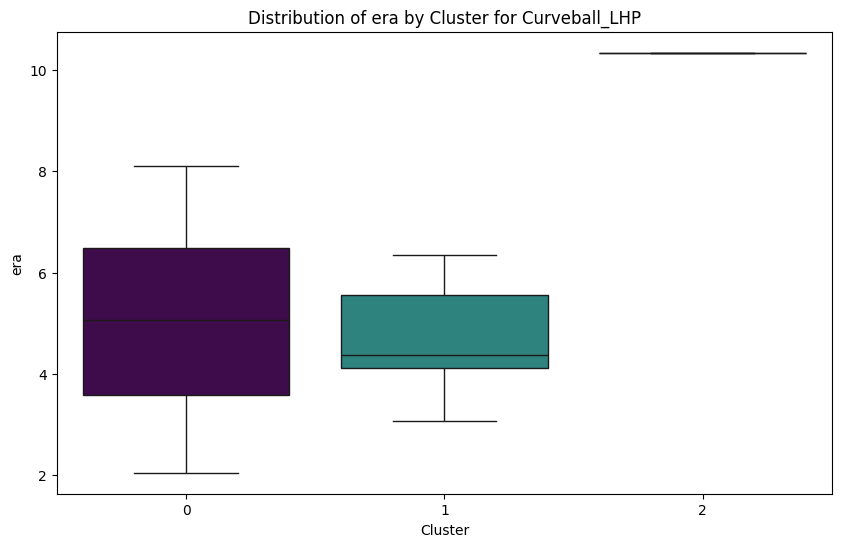

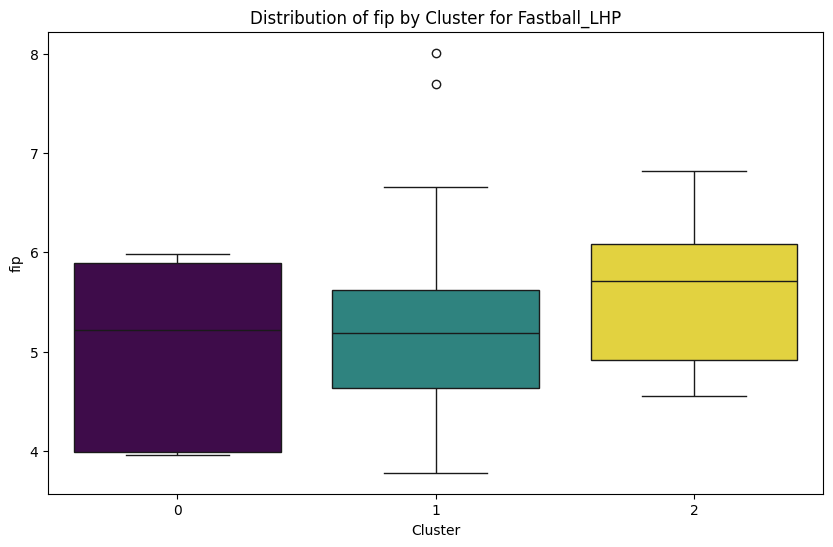

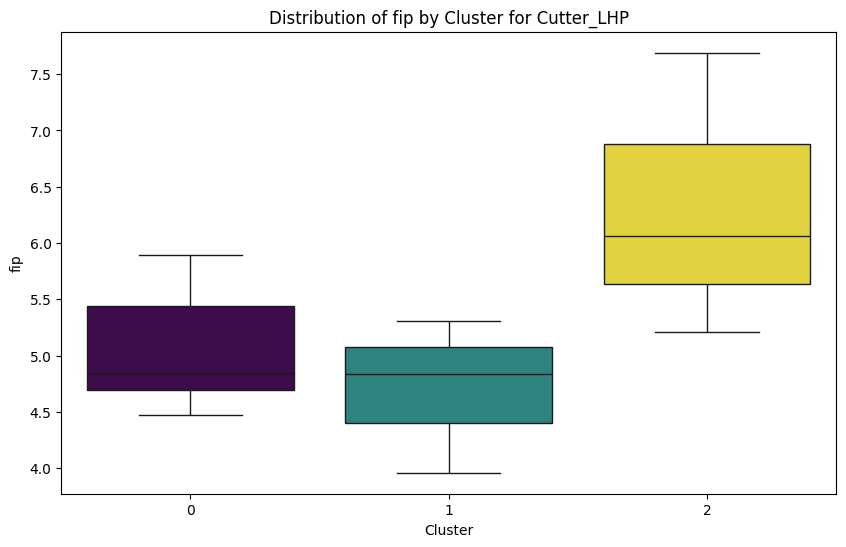

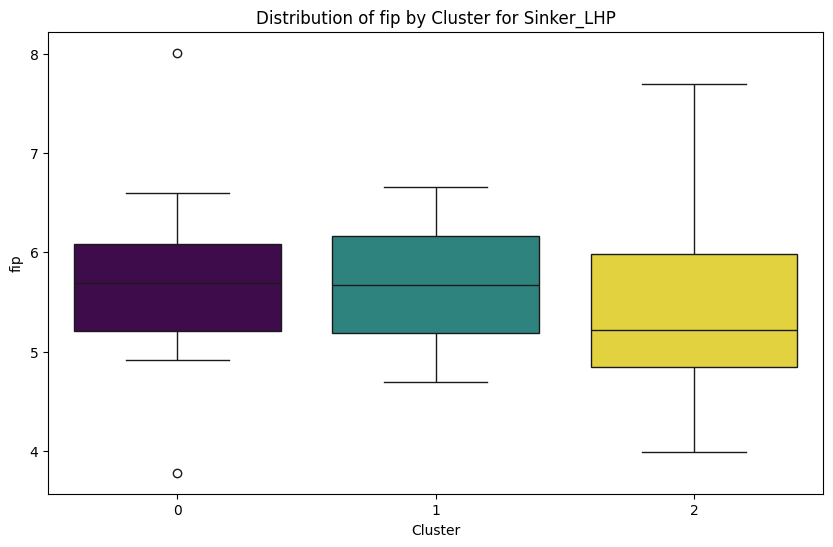

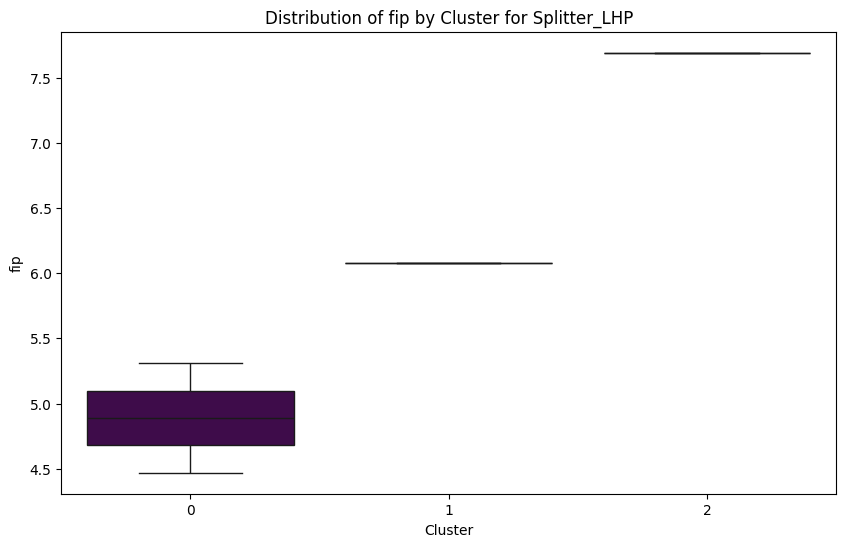

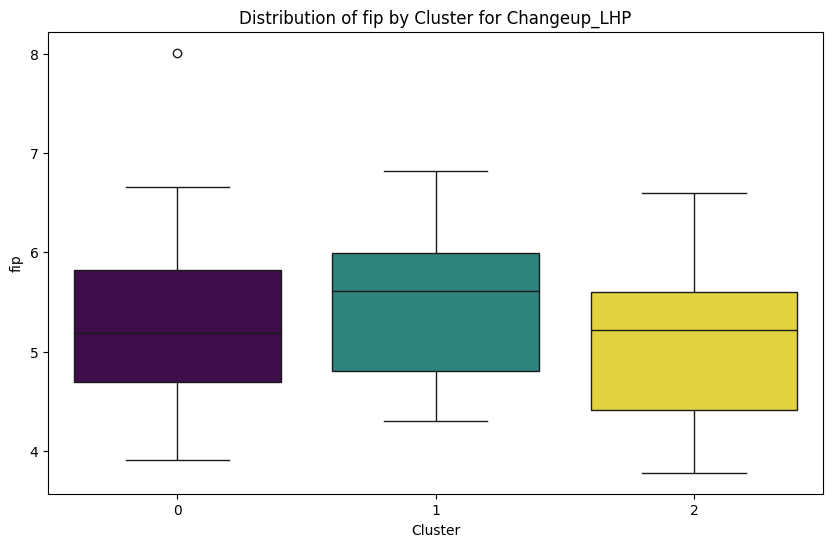

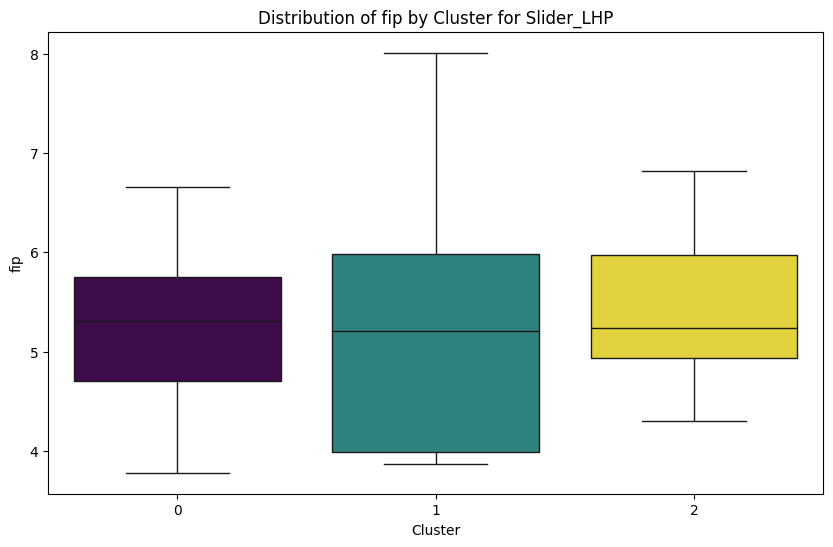

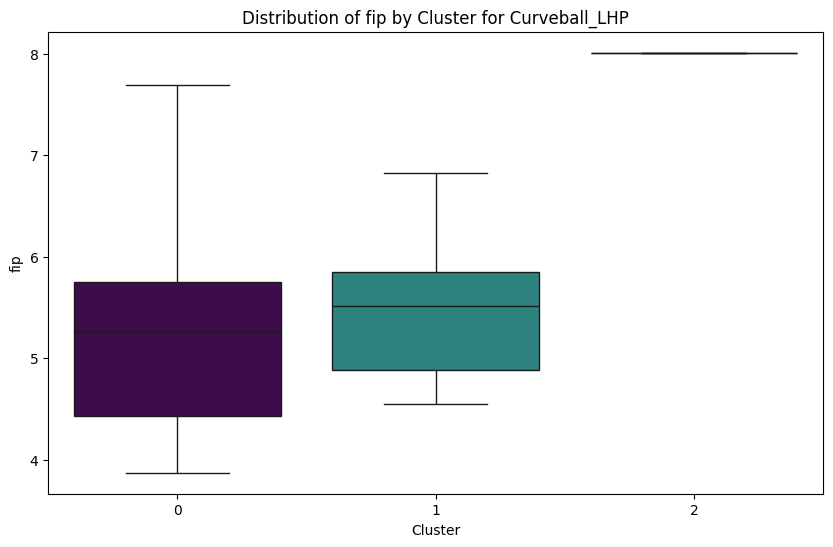

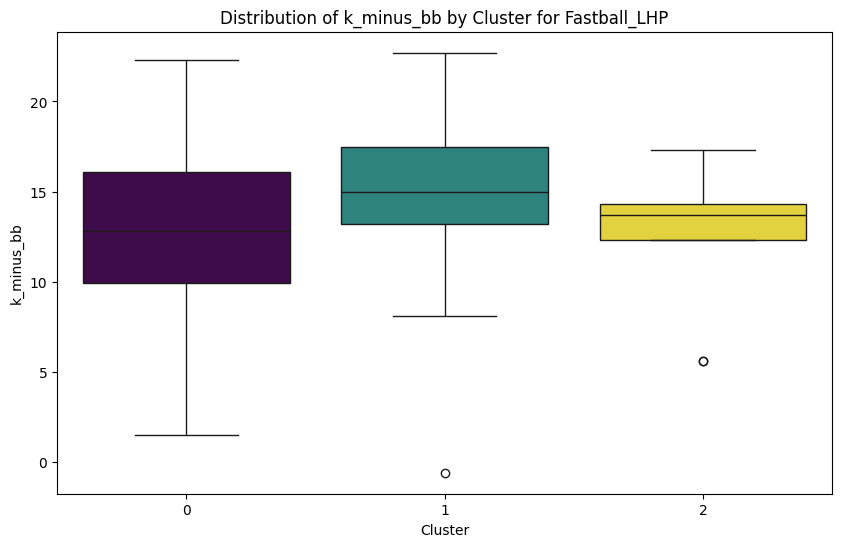

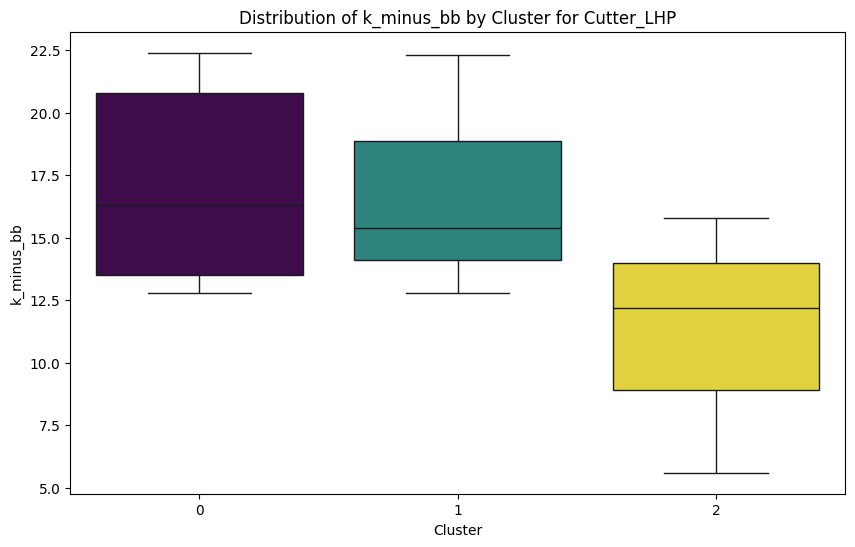

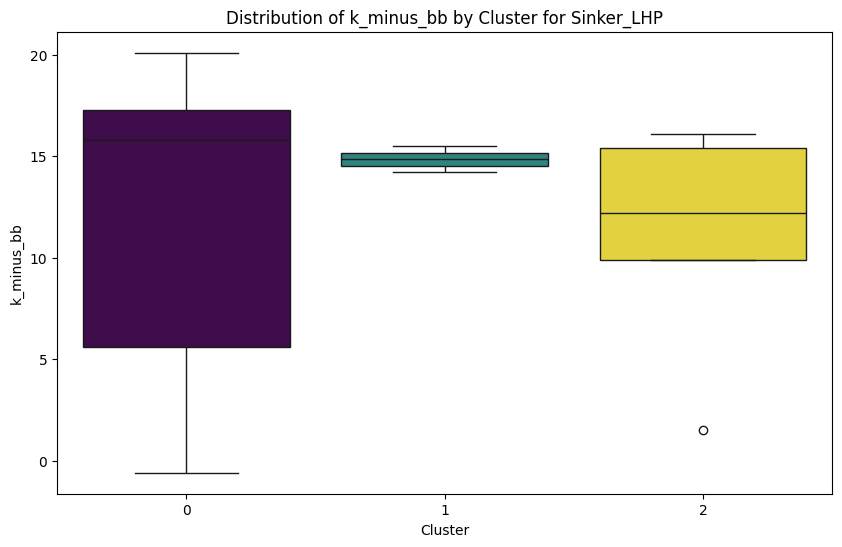

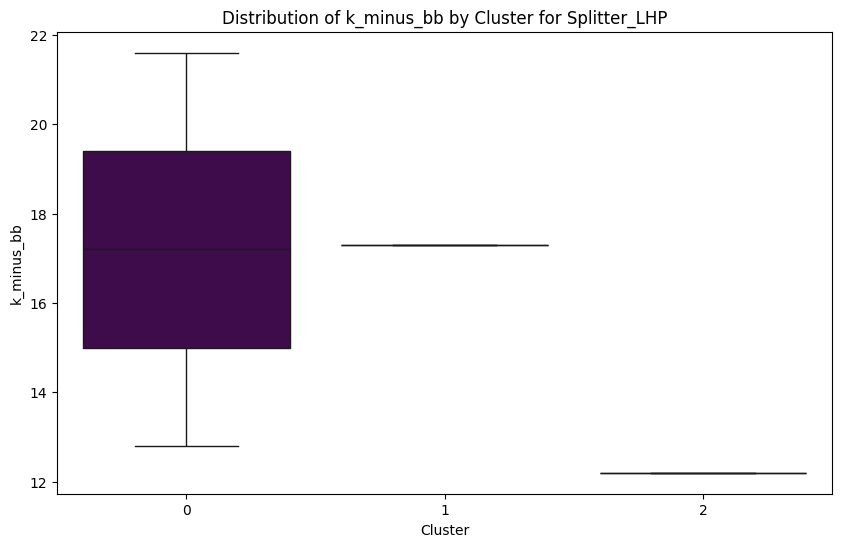

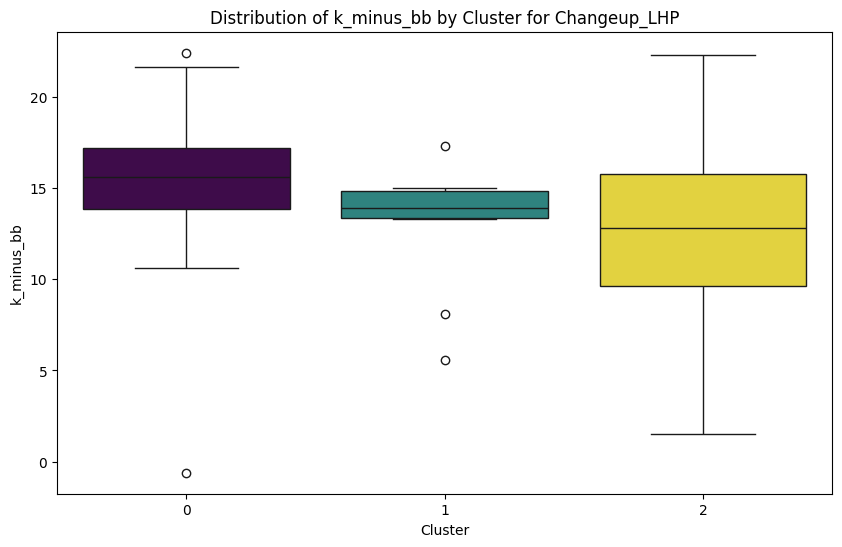

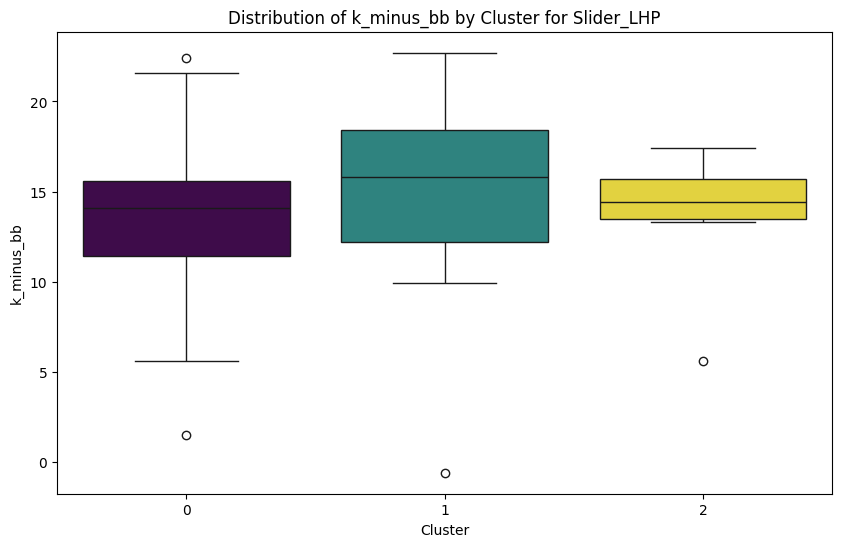

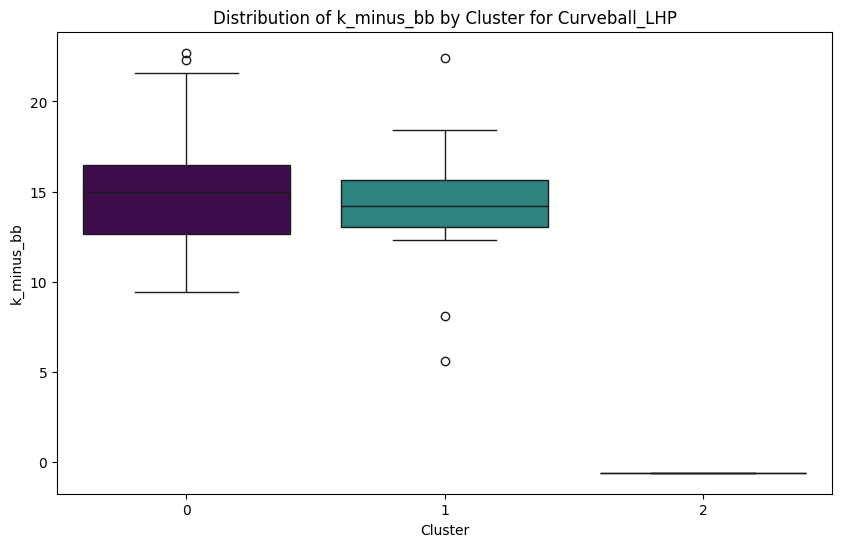

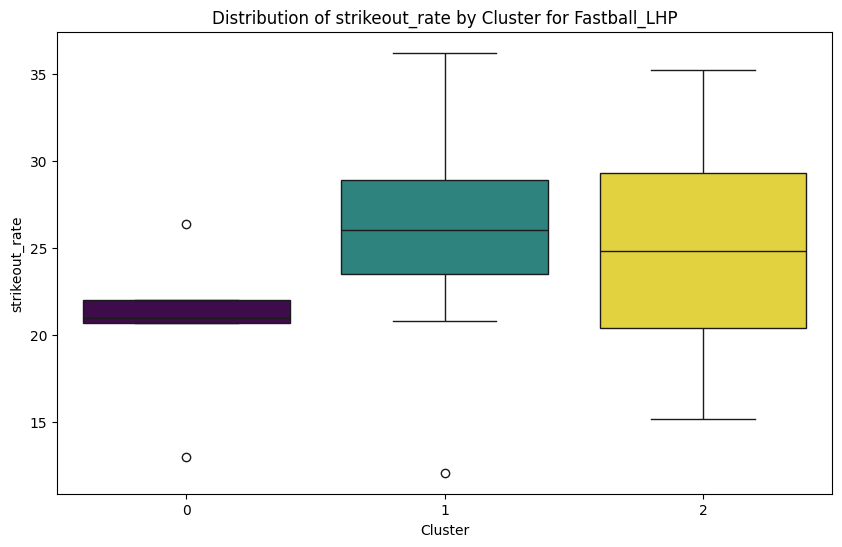

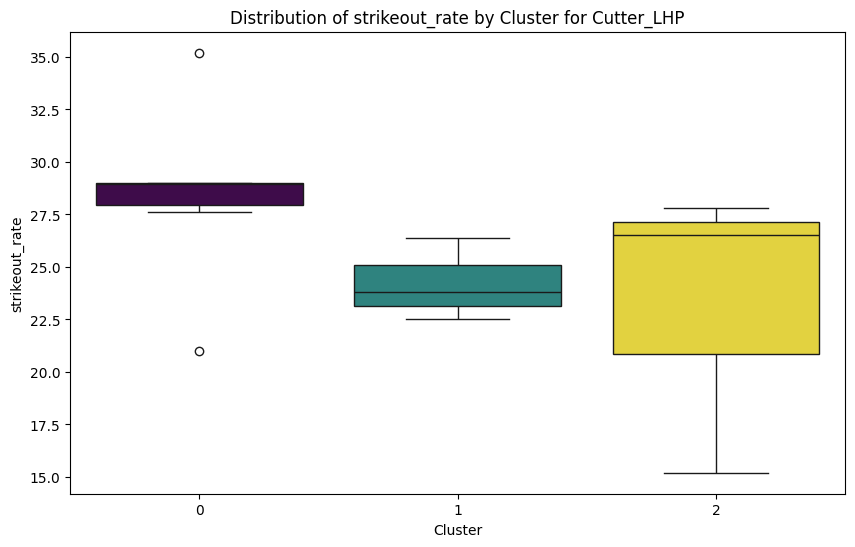

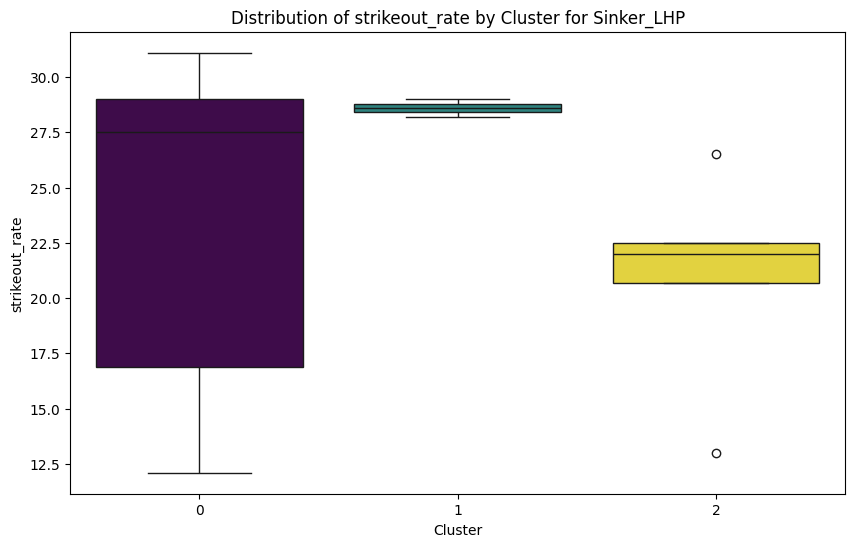

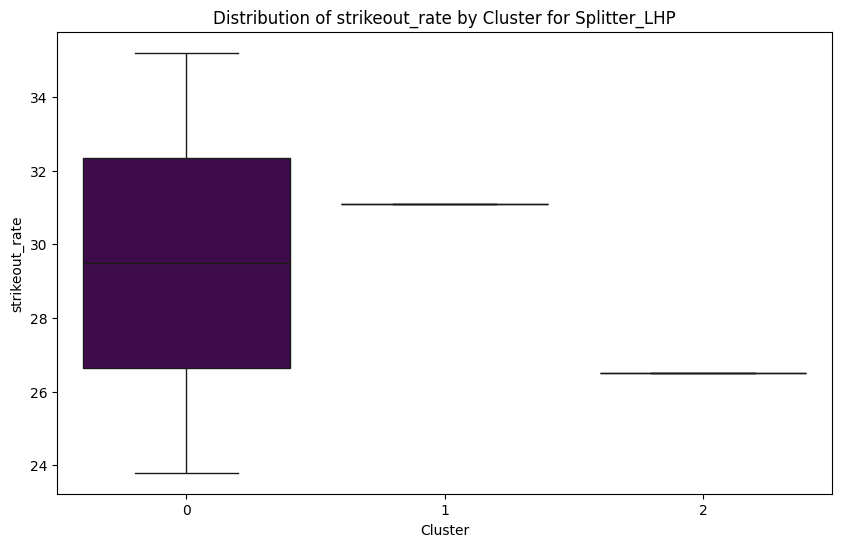

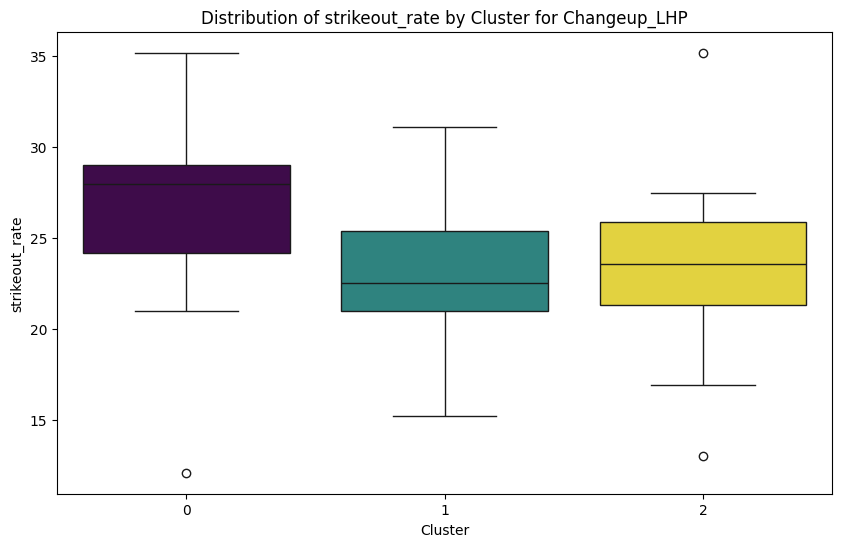

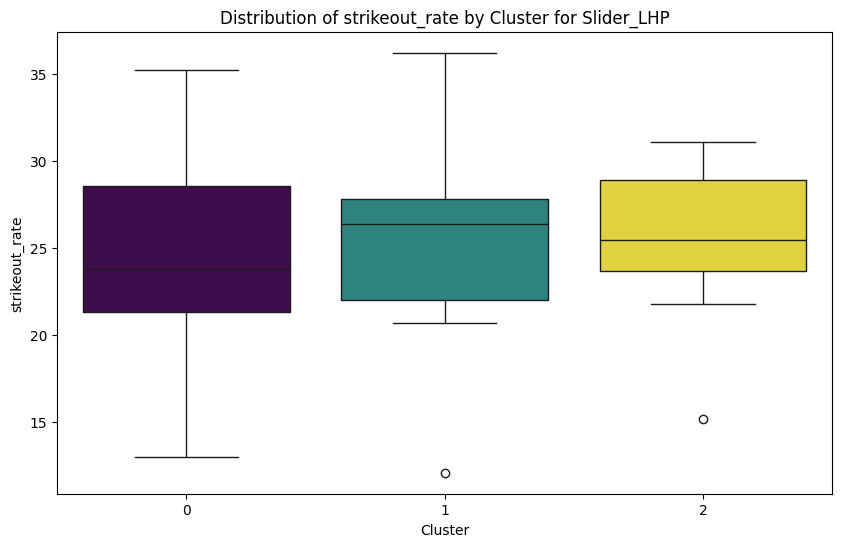

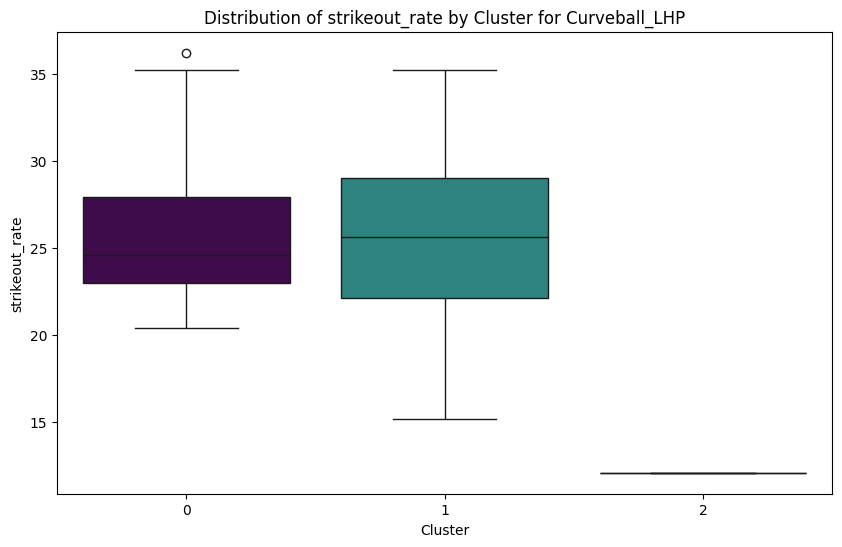

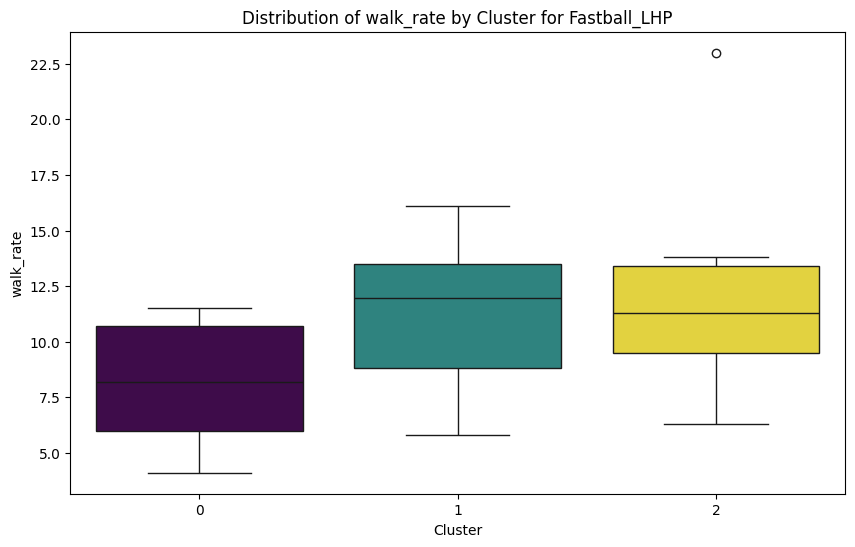

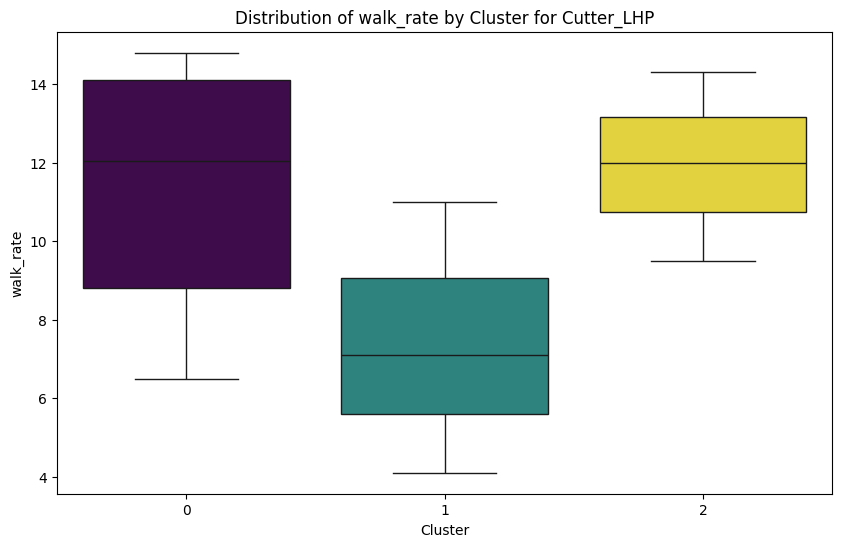

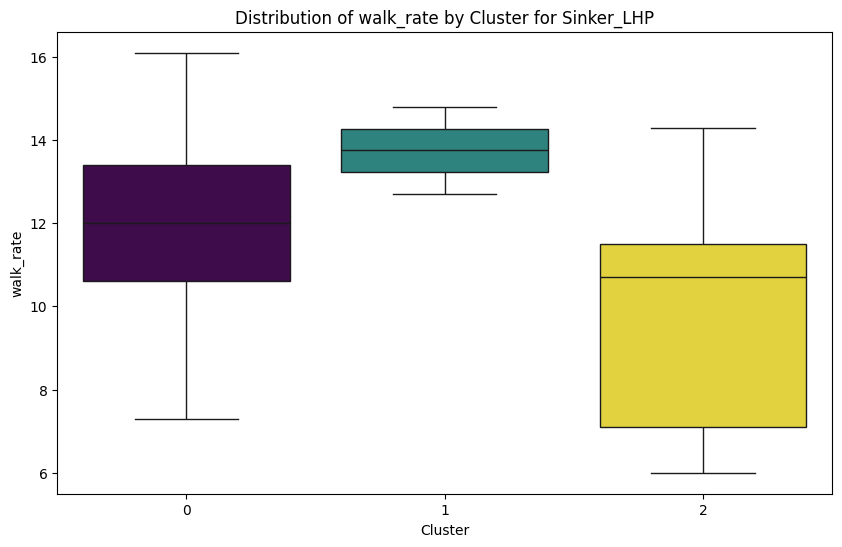

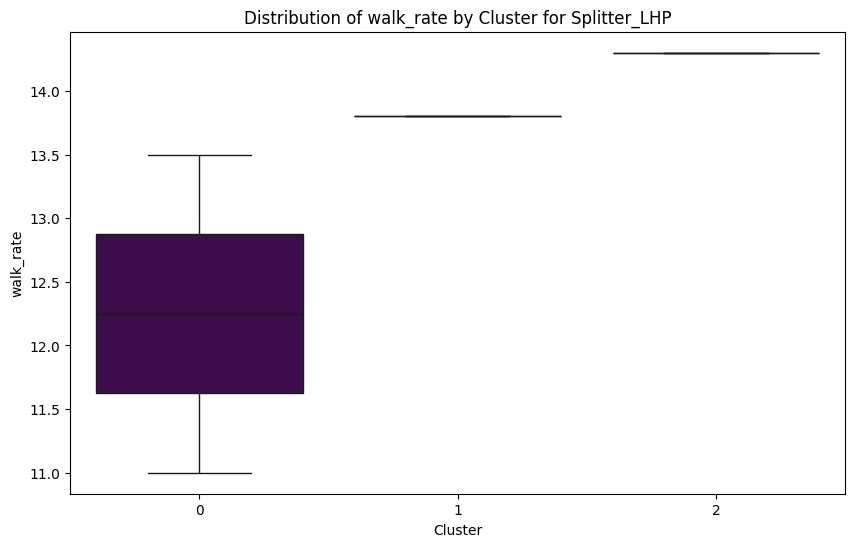

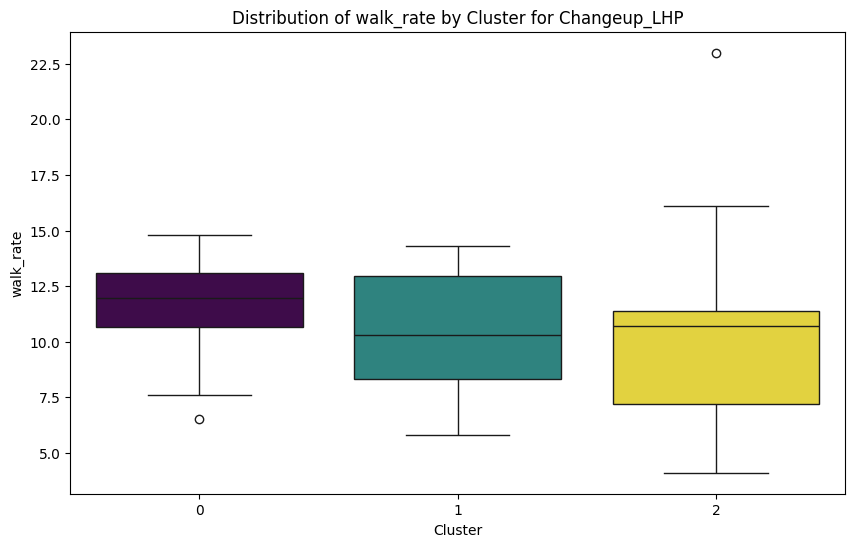

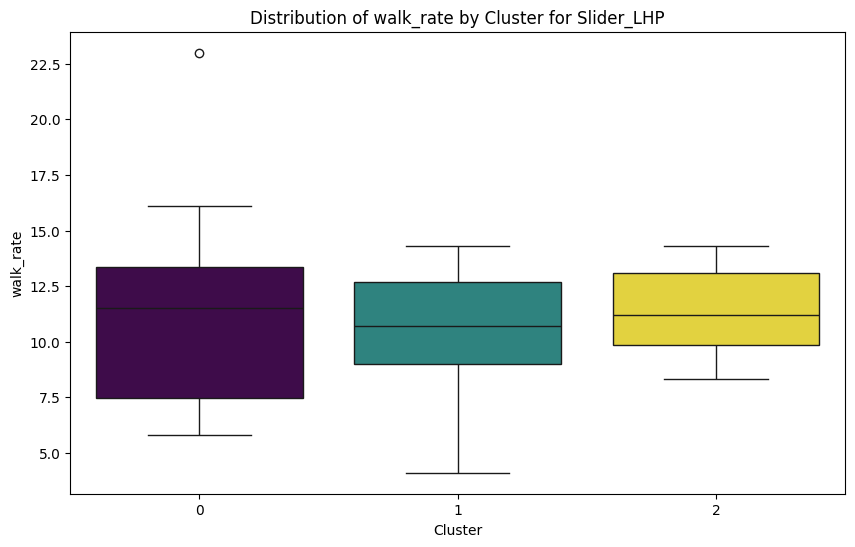

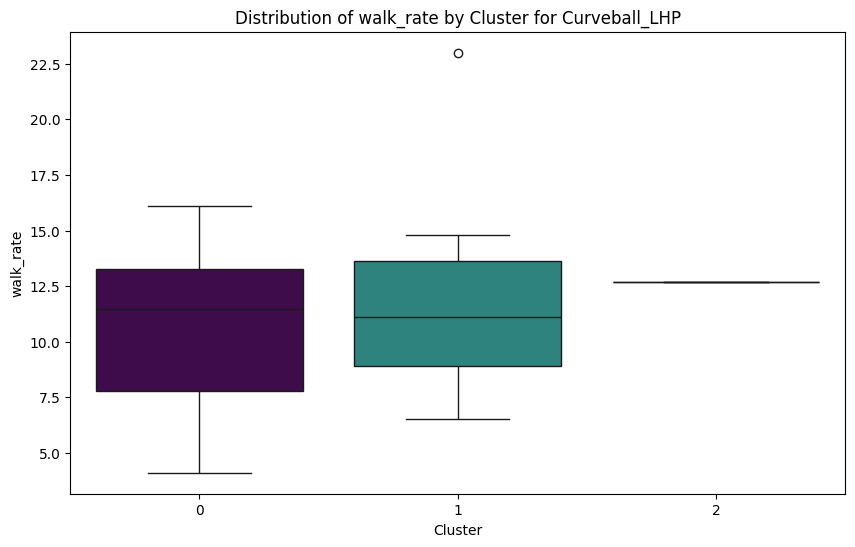

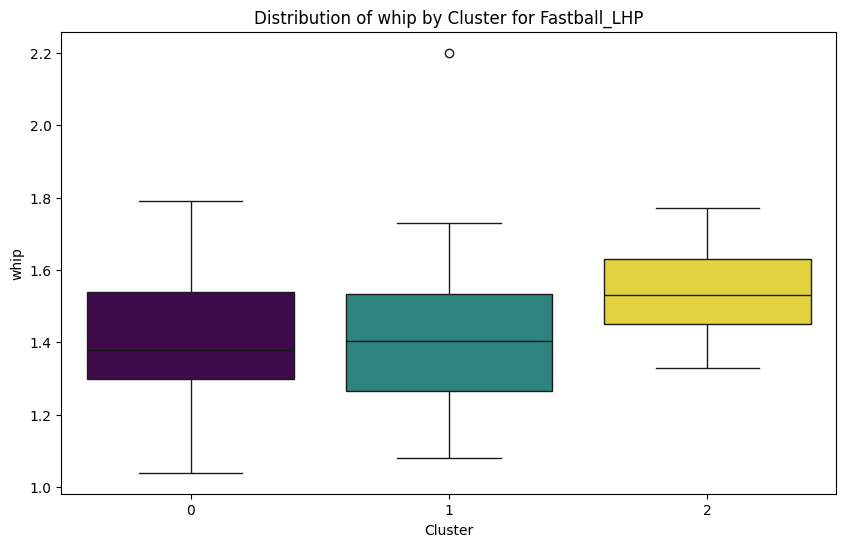

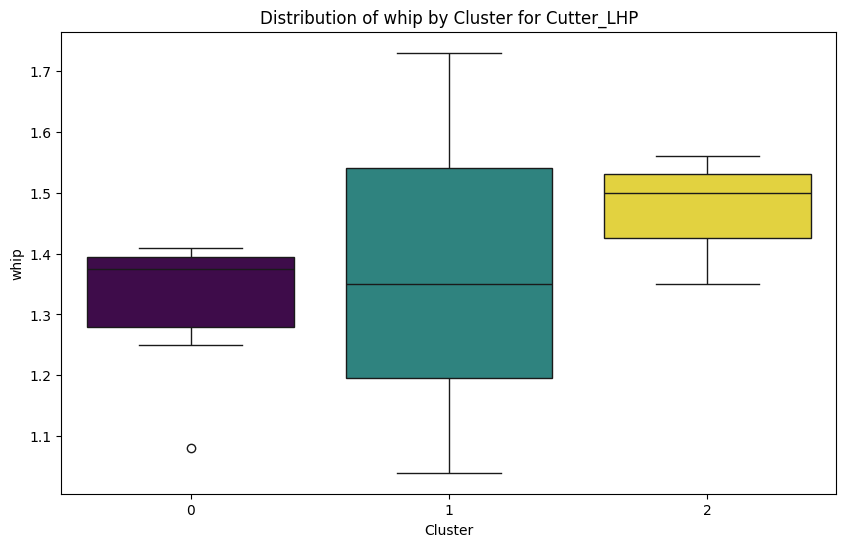

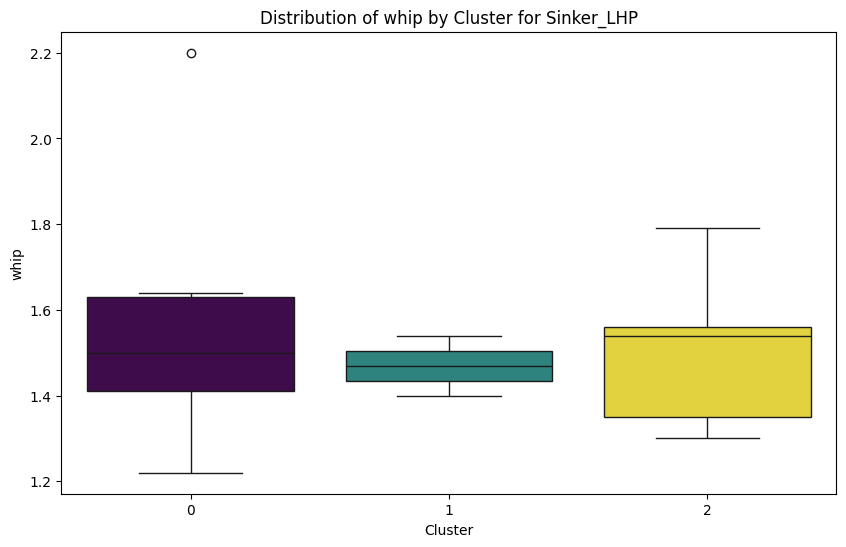

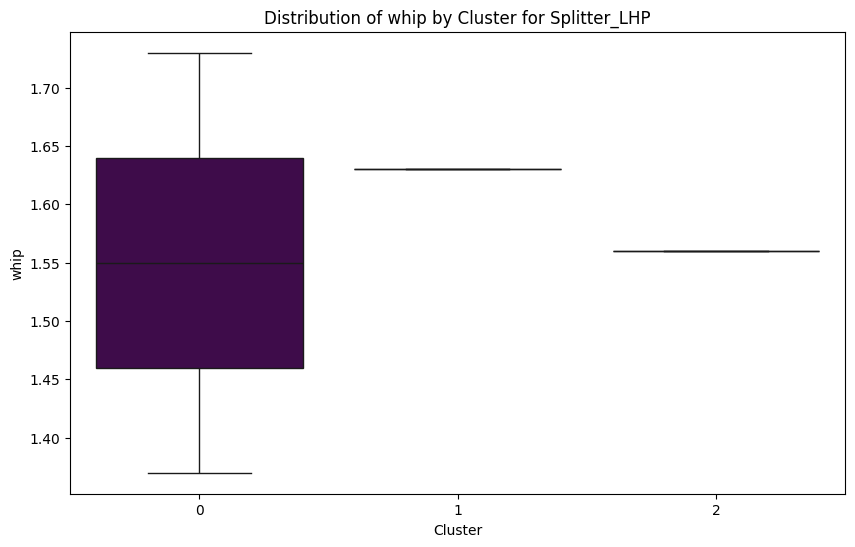

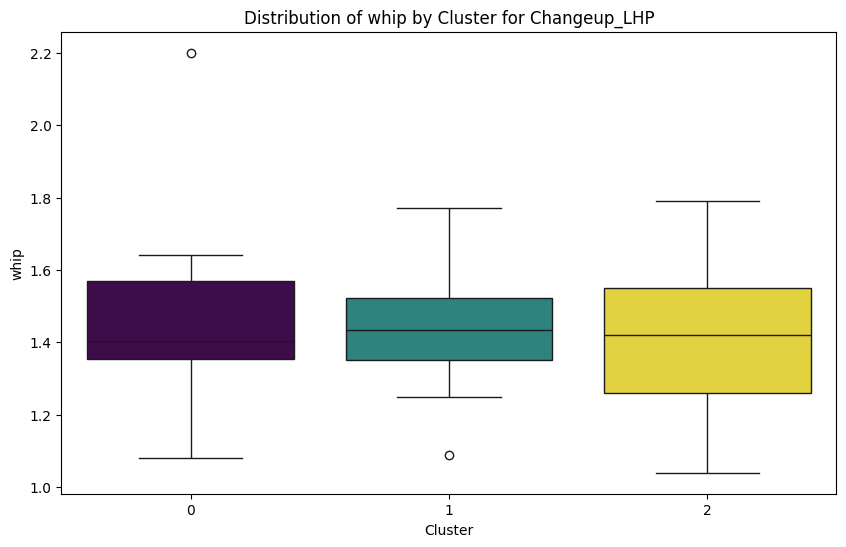

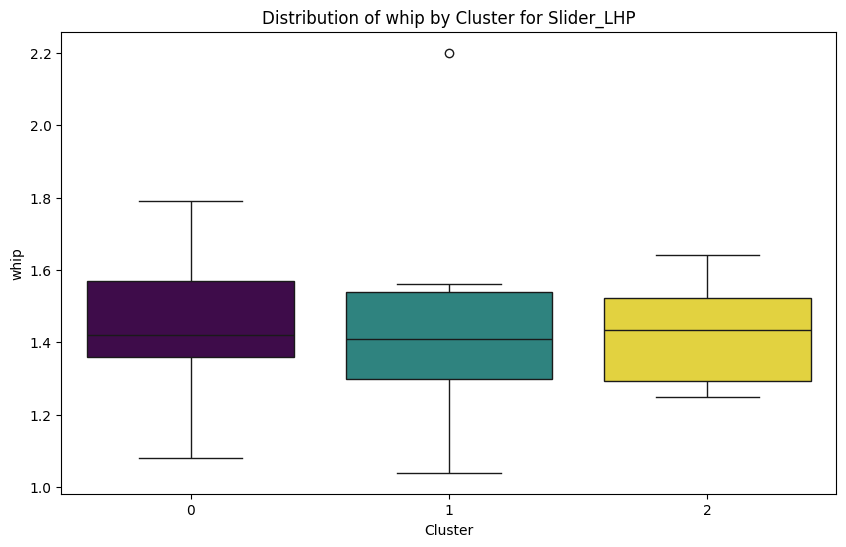

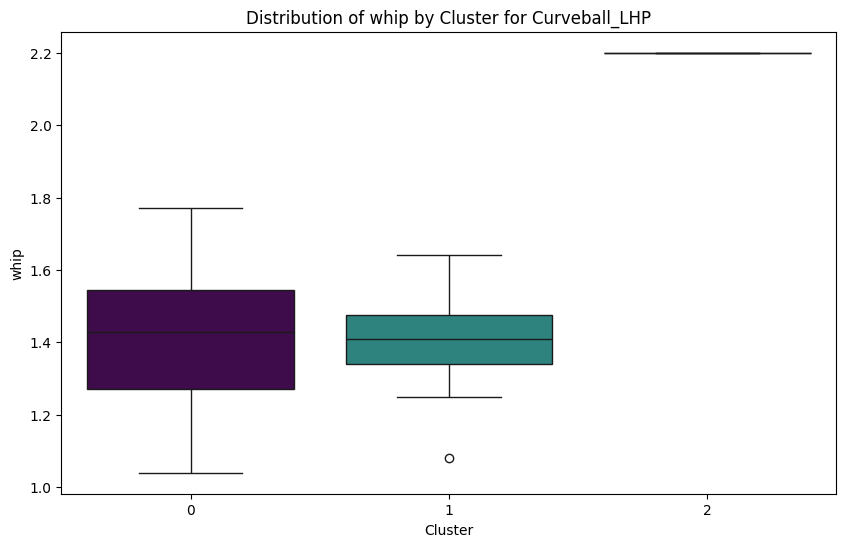

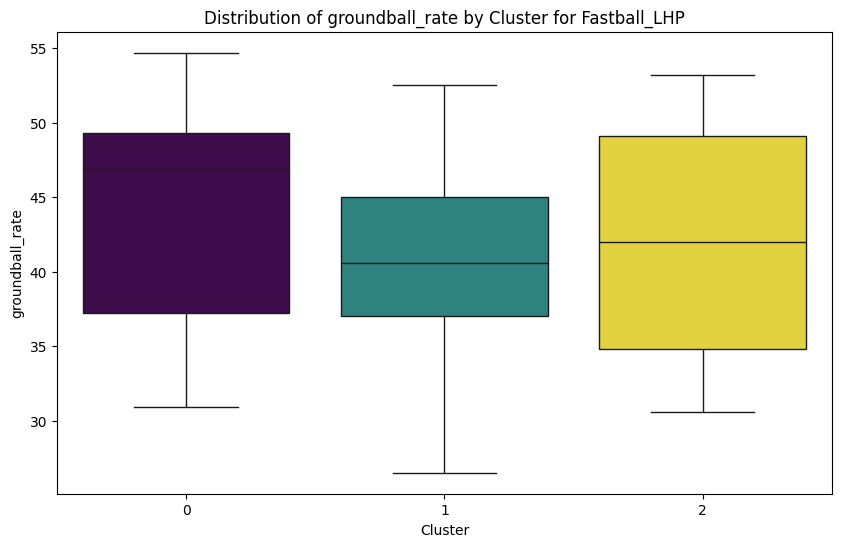

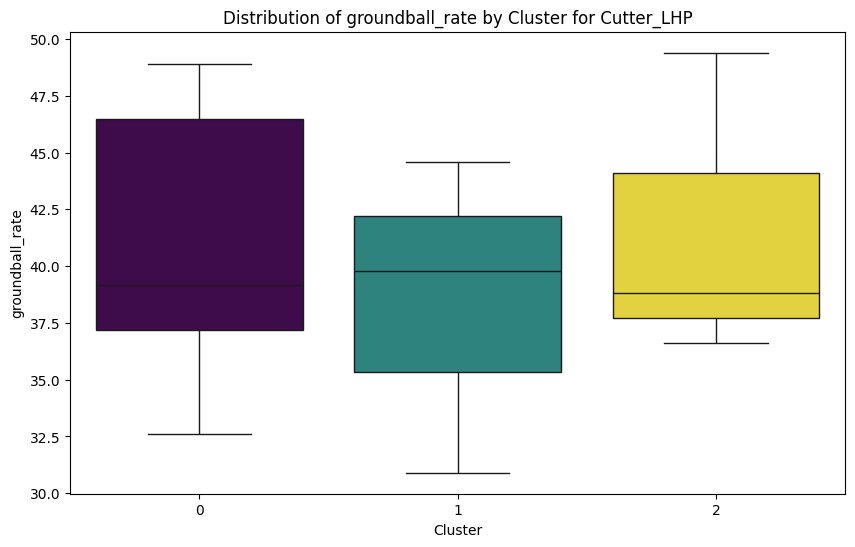

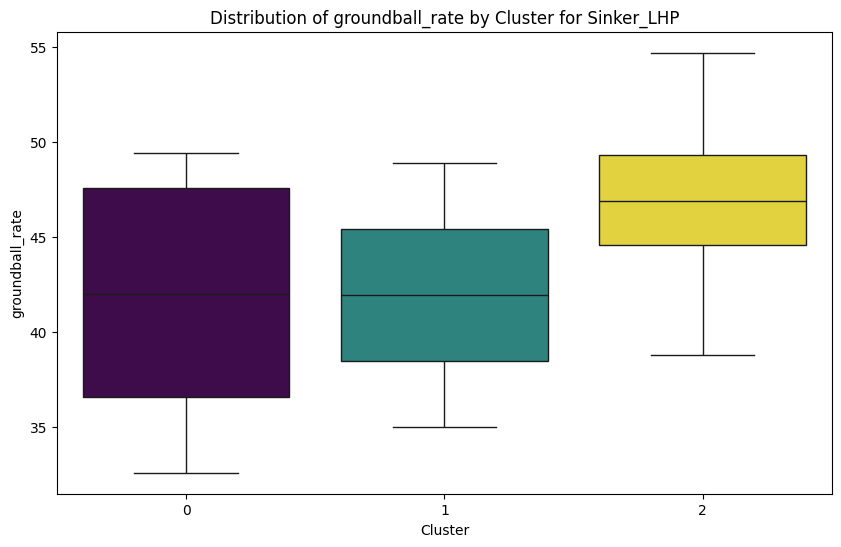

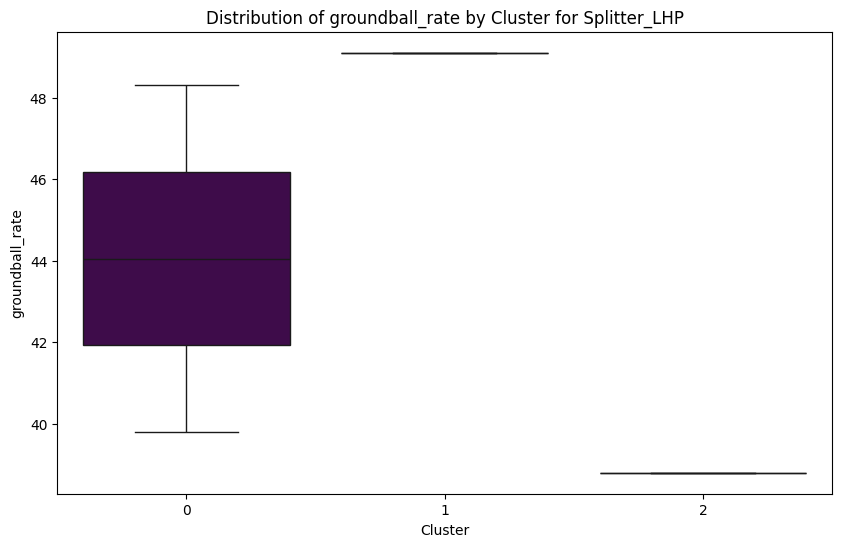

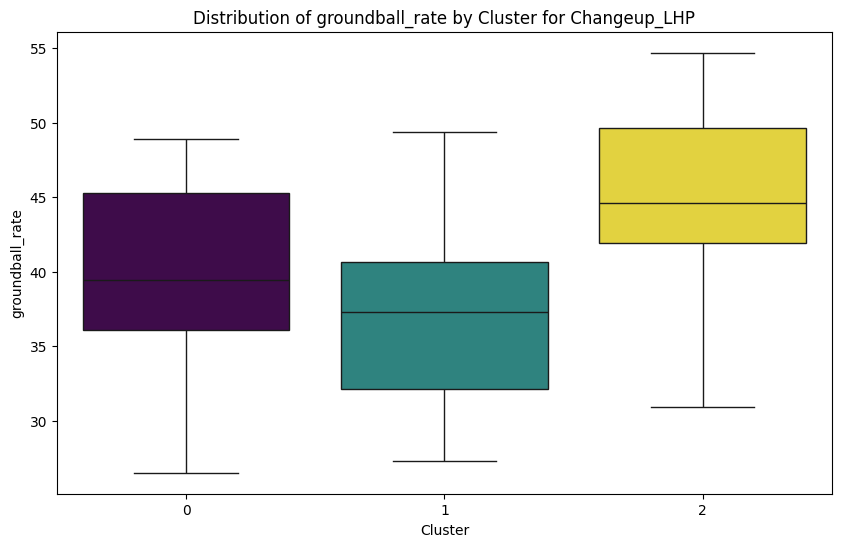

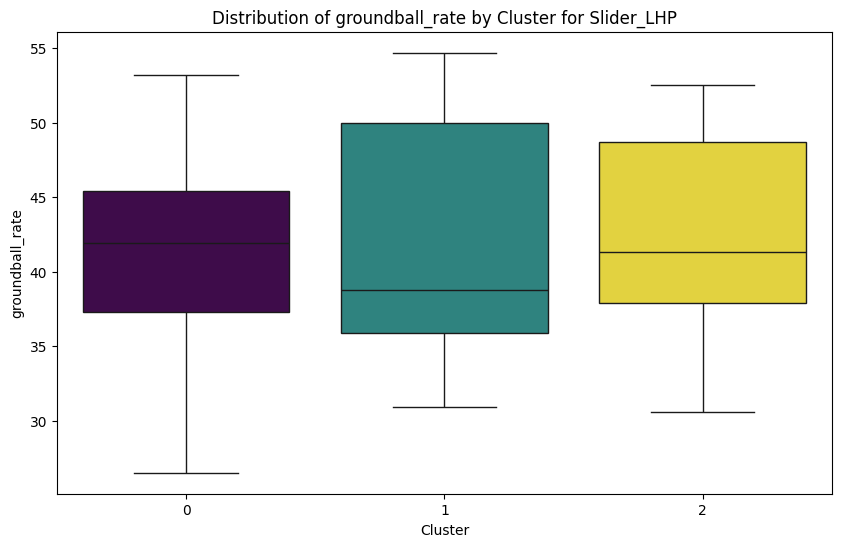

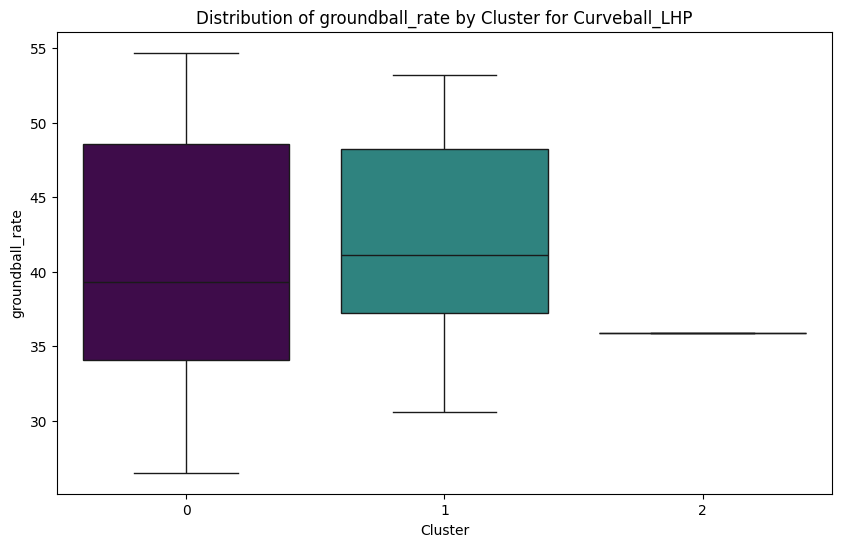

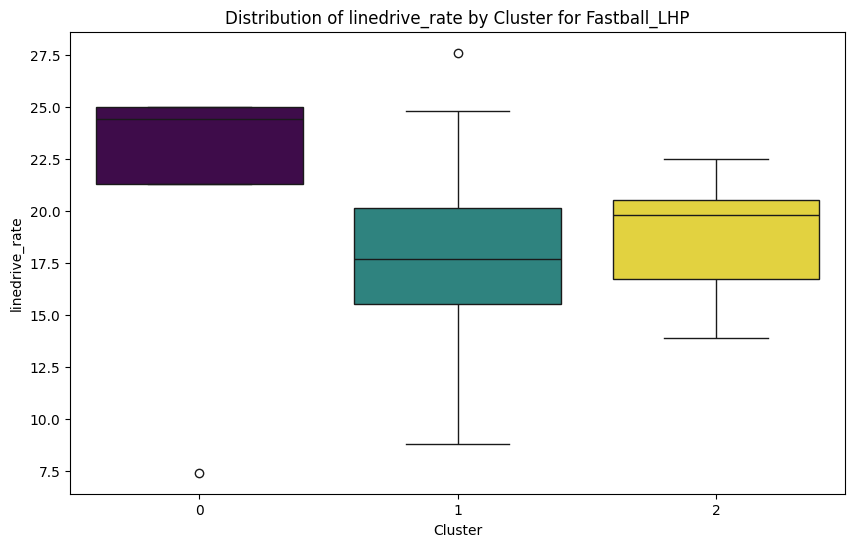

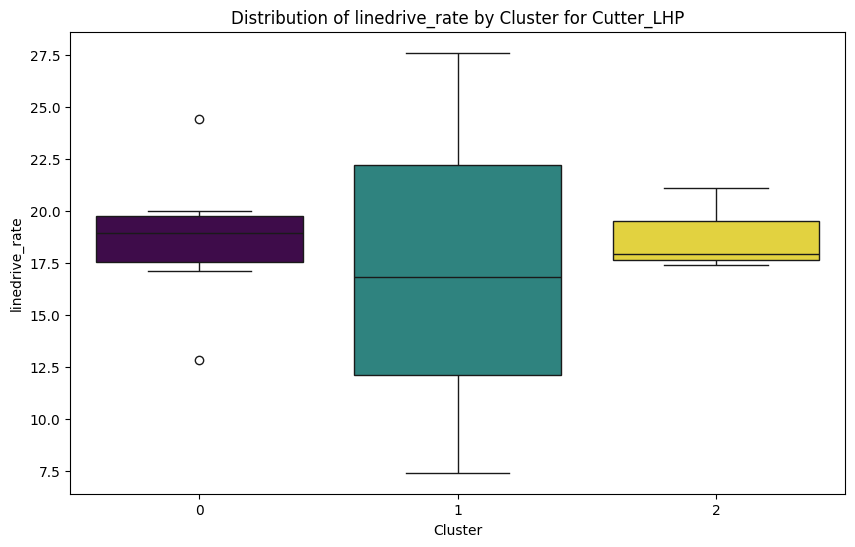

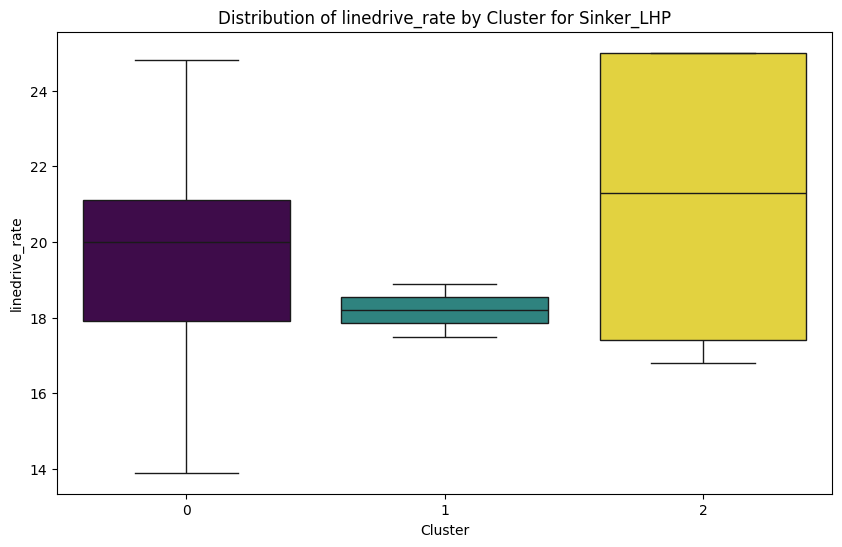

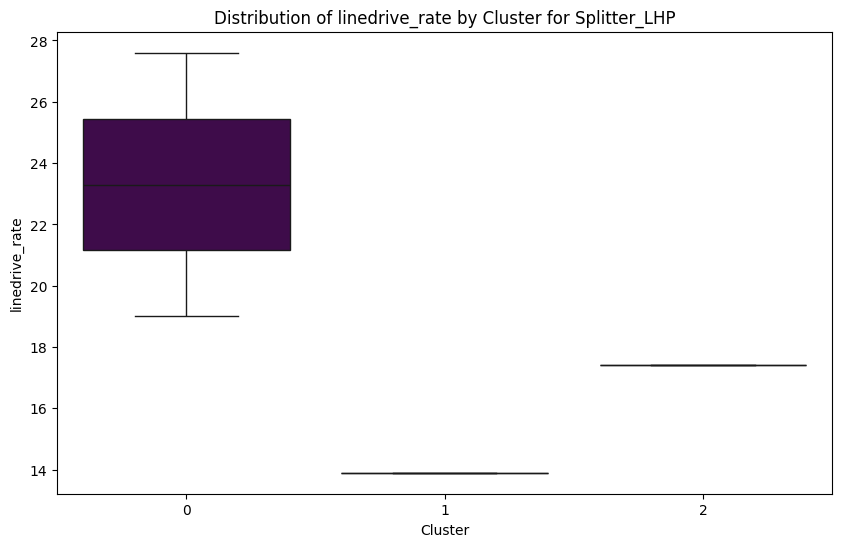

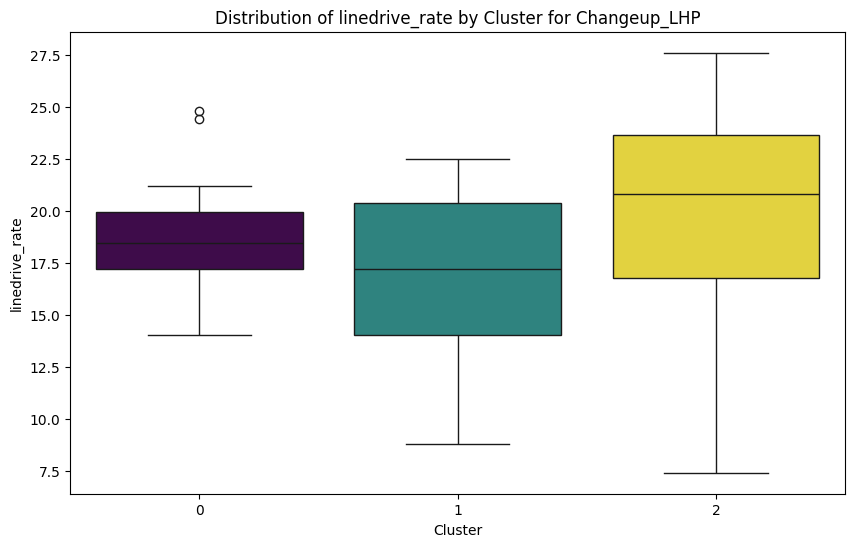

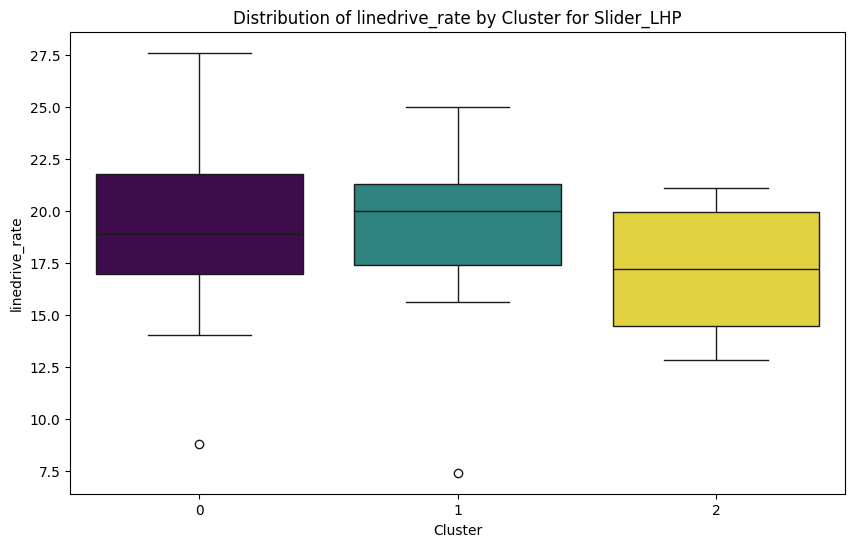

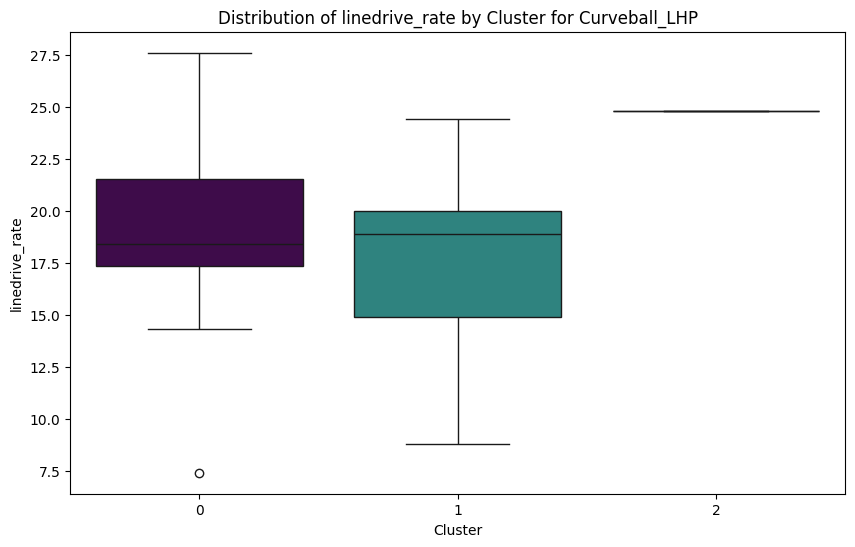

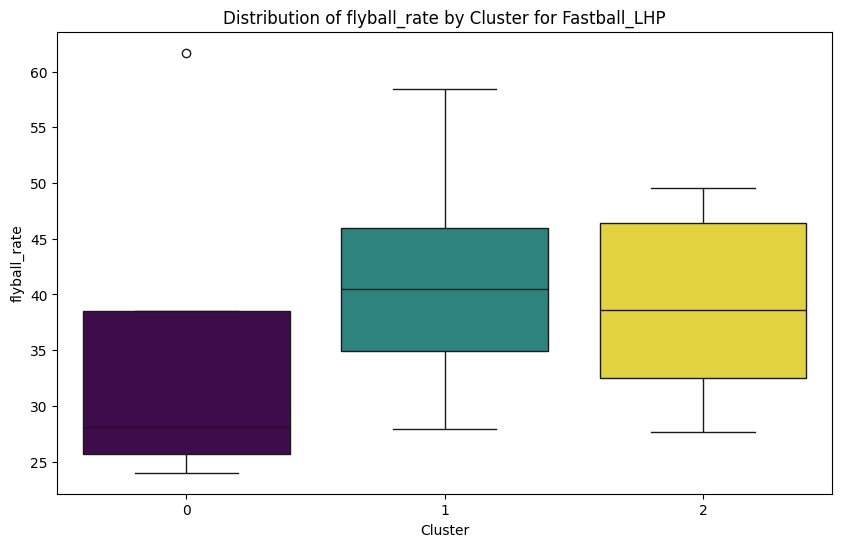

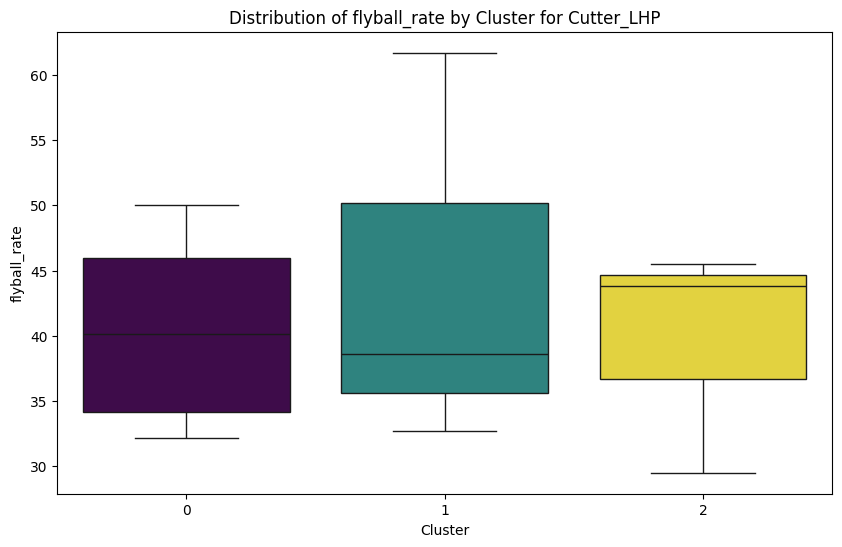

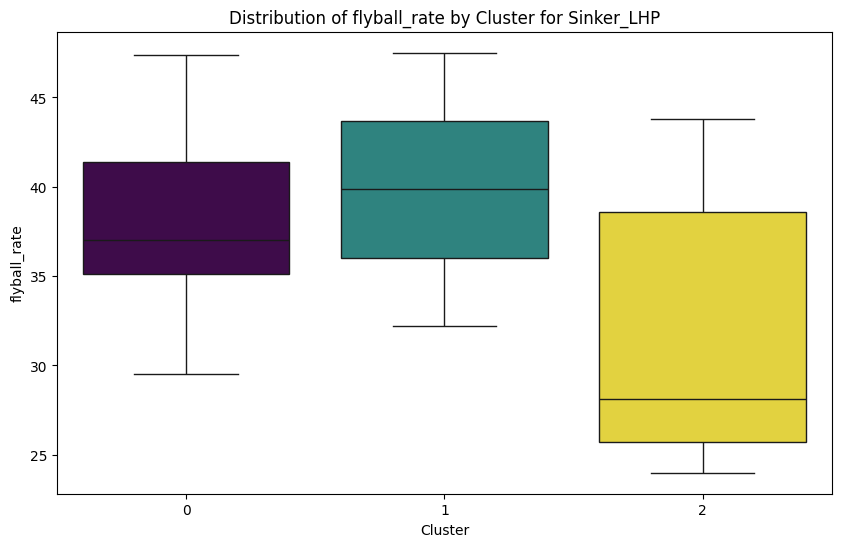

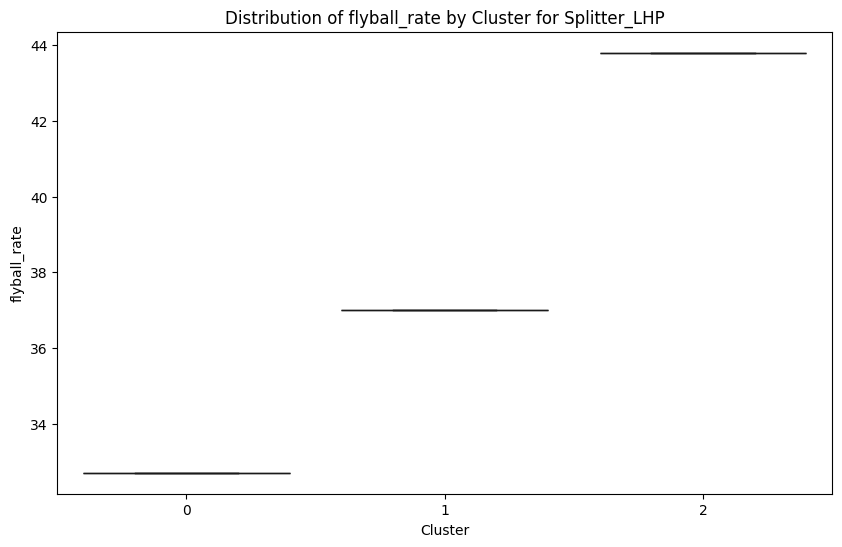

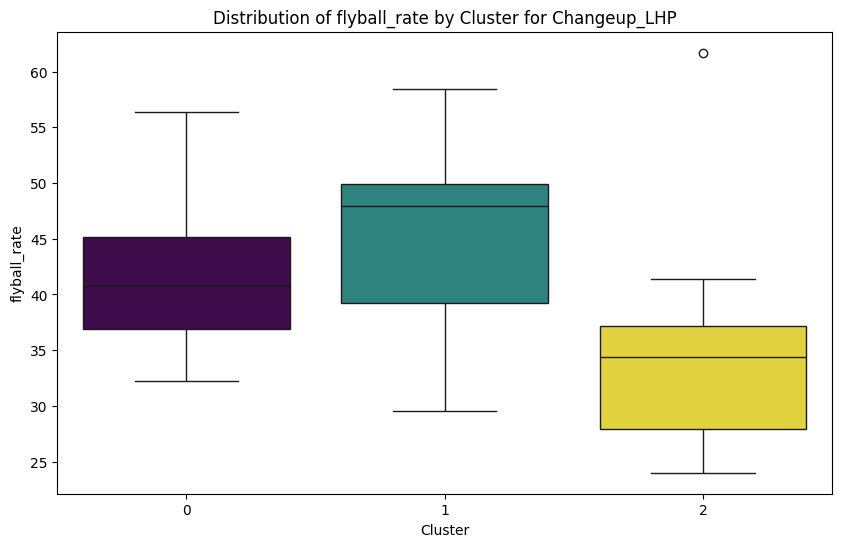

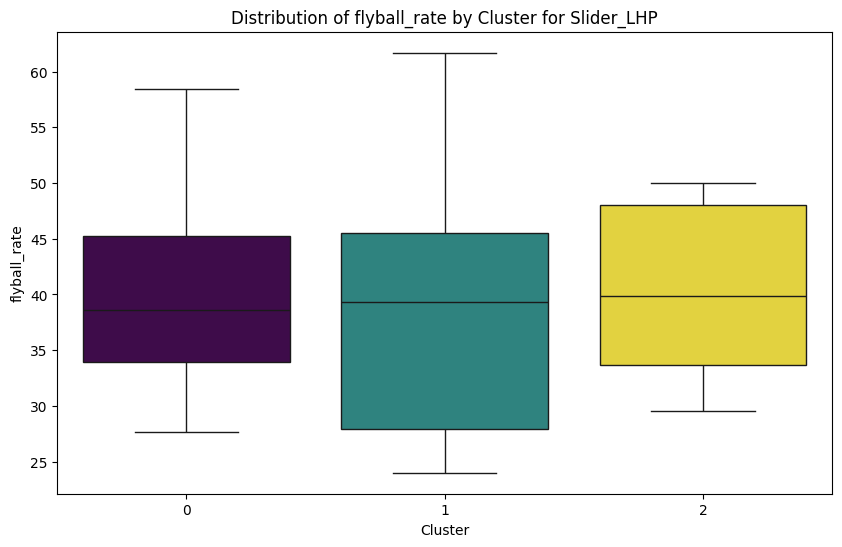

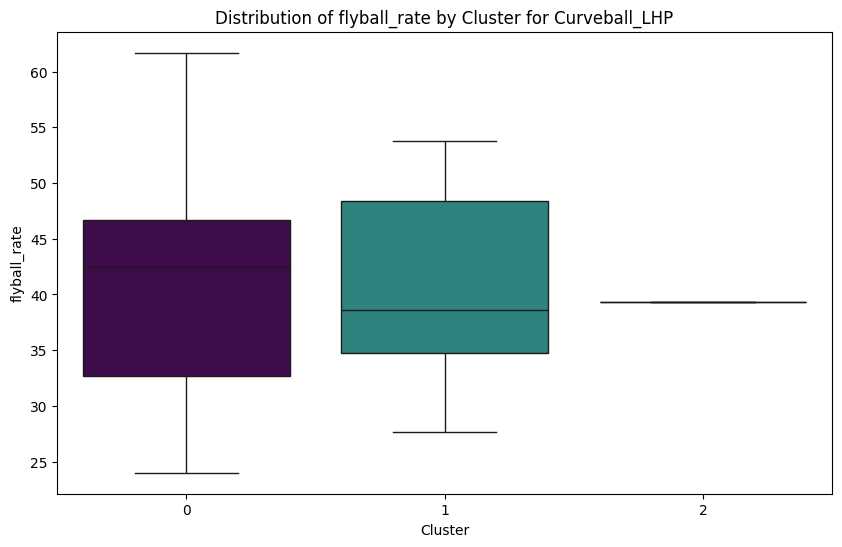

In [ ]:
for metric in performance_metrics:
    # Iterate over RHP clusters
    for pitch_type, features in selected_features_LHP.items():
        X = merged_LHP_stats[pitch_type][features]

        # Check if the dataframe size is greater than 0
        if X.shape[0] > 0:
            # Scale the features
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)

            # Perform K-means clustering
            kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
            cluster_labels = kmeans.fit_predict(X_scaled)

            # Visualize the distribution of the performance metric within each cluster
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=cluster_labels, y=merged_LHP_stats[pitch_type][metric], hue=cluster_labels, legend=False, palette='viridis')
            plt.title(f'Distribution of {metric} by Cluster for {pitch_type}')
            plt.xlabel('Cluster')
            plt.ylabel(metric)
            plt.show()

# Cluster Prediction Based on Input Features

In [ ]:
# Input features for Fastball_RHP
bryce_miller = [[95.0, 18.4, 6.1, 2438.0, 5.7, 1.3, 6.4, -4.2]]

# Use the previously trained scaler to scale the input features
scaled_input_features = scalers_RHP['Fastball_RHP'].transform(bryce_miller)

# Use the previously trained KMeans model to predict the cluster
predicted_cluster = kmeans_models_RHP['Fastball_RHP'].predict(scaled_input_features)

# Print the predicted cluster
print("Predicted cluster for Fastball_RHP:", predicted_cluster)

Predicted cluster for Fastball_RHP: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Input features for Fastball_RHP
kyle_hendricks = [[87.8, 15.3, 7.8, 2063.0, 5.9, 2.9, 5.6, -5.3]]

# Use the previously trained scaler to scale the input features
scaled_input_features = scalers_RHP['Fastball_RHP'].transform(kyle_hendricks)

# Use the previously trained KMeans model to predict the cluster
predicted_cluster = kmeans_models_RHP['Fastball_RHP'].predict(scaled_input_features)

# Print the predicted cluster
print("Predicted cluster for Fastball_RHP:", predicted_cluster)

Predicted cluster for Fastball_RHP: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
